In [1]:
library(lme4) # necessary for model fitting: glm
library(effects) # necessary for making effect plots
library(blmeco)

Loading required package: Matrix
Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.
Loading required package: MASS


# Statistics based on correspondent connection types (filtered)

The frequencies in the columns (e.g. "hit_freq") represent the number of divine appeals per 100,000 words of total words per correspondent connection type.

This notebook uses a dataset that filtered out letter writers who authored less than 5 letters in the Marescoe-David correspondence dataset.

In [2]:
marescoe_conn <- read.delim(file = "stats_marescoe-david_filtered.tsv", sep = "\t", header = T)

In [28]:
head(marescoe_conn)

str(marescoe_conn)

id       hit_freq conf_freq approve_freq fixed_freq object_freq grat_freq
1 455      0.00     0         0.00         0          0           0        
2 457      0.00     0         0.00         0          0           0        
3 SB_185   0.00     0         0.00         0          0           0        
4 SB_186   0.00     0         0.00         0          0           0        
5 SB_M_10  1.63     0         0.00         0          0           0        
6 SB_M_101 3.26     0         1.63         0          0           0        
  pray_freq preserve_freq presupp_freq ... sender_generation
1 0.00      0             0            ... 1640-1680        
2 0.00      0             0            ... 1600-1640        
3 0.00      0             0            ... UNK              
4 0.00      0             0            ... 1640-1680        
5 1.63      0             0            ... 1600-1640        
6 1.63      0             0            ... 1600-1640        
  addressee_generation sender_is_older sender_over_40 addressee_over_40
1 1640-1680            TRUE            TRUE           FALSE            
2 1640-1680            TRUE            TRUE           FALSE            
3 1600-1640            UNK             UNK            FALSE            
4 1600-1640            TRUE            TRUE           FALSE            
5 1600-1640            TRUE            MULT           FALSE            
6 1600-1640            MULT            MULT           FALSE            
  age_gap_over_20 age_gap gender_sender gender_addressee gender_pair
1 TRUE            35      MALE          MALE             MALE-MALE  
2 FALSE           11      MALE          MALE             MALE-MALE  
3 UNK             NA      MALE          MULT             MALE-MULT  
4 TRUE            NA      MALE          MULT             MALE-MULT  
5 FALSE           NA      MALE          MALE             MALE-MALE  
6 UNK             NA      MALE          MALE             MALE-MALE

'data.frame':	284 obs. of  35 variables:
 $ id                  : Factor w/ 284 levels "455","457","SB_185",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hit_freq            : num  0 0 0 0 1.63 3.26 0 0 0 2.34 ...
 $ conf_freq           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approve_freq        : num  0 0 0 0 0 1.63 0 0 0 0 ...
 $ fixed_freq          : num  0 0 0 0 0 0 0 0 0 2.34 ...
 $ object_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ grat_freq           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pray_freq           : num  0 0 0 0 1.63 1.63 0 0 0 0 ...
 $ preserve_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ presupp_freq        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ resign_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ travel_freq         : num  0 0 0 0 1.63 3.26 0 0 0 0 ...
 $ trade_freq          : num  0 0 0 0 0 0 0 0 0 2.34 ...
 $ health_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ politics_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ social_freq         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ connection          

In [4]:
marescoe_conn <- na.omit(marescoe_conn[!is.na(marescoe_conn$year), ])

In [4]:
marescoe_conn$year <- as.factor(marescoe_conn$year)
str(marescoe_conn$year)

marescoe_conn$addressee_over_40 <- as.factor(marescoe_conn$addressee_over_40)
str(marescoe_conn$addressee_over_40)

#marescoe_conn <- na.omit(marescoe_conn[!is.na(marescoe_conn$year), ])

 Factor w/ 12 levels "1668","1669",..: 11 11 5 5 1 2 2 2 2 2 ...
 Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
# test for data independence

length(marescoe_conn$id)
length(unique(marescoe_conn$id))

length(marescoe_conn$id) == length(unique(marescoe_conn$id))

[1] 284

[1] 284

[1] TRUE

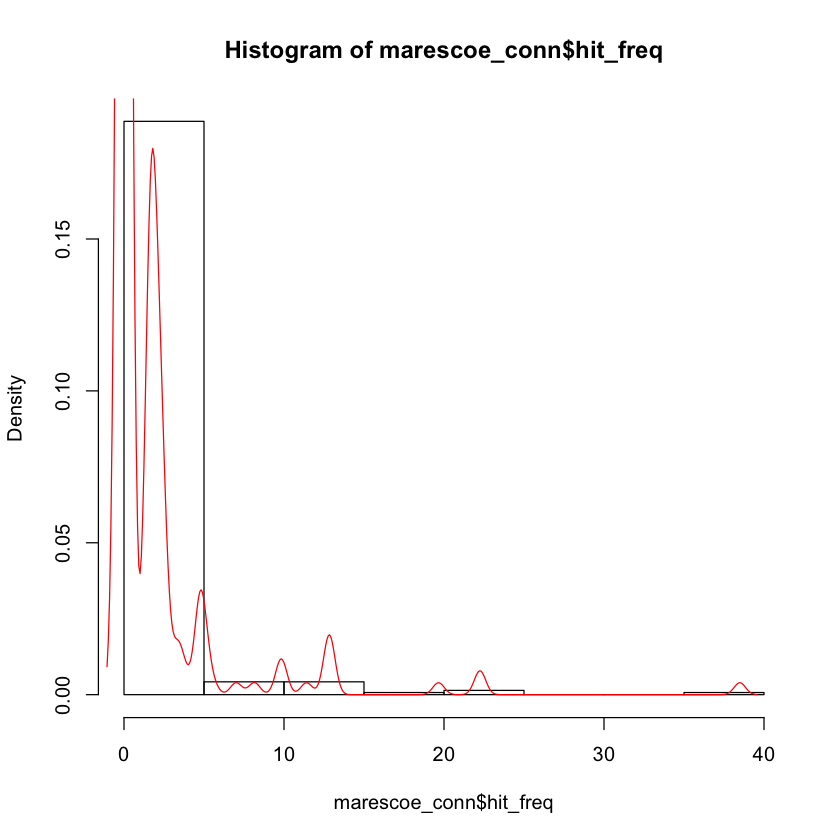

In [7]:
hist(marescoe_conn$hit_freq,
    freq=FALSE)
lines(density(marescoe_conn$hit_freq), col='red')

In [10]:
# test for normality

shapiro.test(marescoe_conn$hit_freq)


	Shapiro-Wilk normality test

data:  marescoe_conn$hit_freq
W = 0.40097, p-value < 2.2e-16


The data is not normally distributed. 

### 1 Generalised linear model using "connection" as a predictor and "hit_freq" as response variable

In [9]:
m_conn_model <- glm(hit_freq ~ connection,
                    data=marescoe_conn,
                    family=quasipoisson)

summary(m_conn_model)
summary(m_conn_model)$coef


Call:
glm(formula = hit_freq ~ connection, family = quasipoisson, data = marescoe_conn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.5308  -1.2130  -1.2130   0.8971   6.7303  

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -0.1872     0.2341  -0.800    0.424    
connectionBUSINESS; CLIENT         -0.1550     0.3609  -0.430    0.668    
connectionBUSINESS; CORRESPONDENT   1.9617     0.3401   5.768 2.14e-08 ***
connectionBUSINESS; PRINCIPAL      -0.1197     0.3130  -0.383    0.702    
connectionFAMILY                    2.3733     0.3681   6.448 5.00e-10 ***
connectionFRIEND                    2.5159     0.2996   8.397 2.38e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 3.59008)

    Null deviance: 1317.51  on 283  degrees of freedom
Residual deviance:  824.06  on 278  degrees of freedom
AIC: NA

Nu

Estimate   Std. Error t value    Pr(>|t|)    
(Intercept)                       -0.1872450 0.2340981  -0.7998571 4.244765e-01
connectionBUSINESS; CLIENT        -0.1550351 0.3609092  -0.4295680 6.678427e-01
connectionBUSINESS; CORRESPONDENT  1.9616888 0.3401201   5.7676349 2.137832e-08
connectionBUSINESS; PRINCIPAL     -0.1197371 0.3130304  -0.3825095 7.023757e-01
connectionFAMILY                   2.3732963 0.3680732   6.4478923 5.001789e-10
connectionFRIEND                   2.5158877 0.2996320   8.3965921 2.377789e-15

In [12]:
"------------------------------drop1------------------------------"
drop1(m_conn_model, test = "LR")

"------------------------------anova------------------------------"
simpler_m_conn <- glm(hit_freq ~ 1,
                      data=marescoe_conn,
                      family=quasipoisson)
anova(simpler_m_conn, m_conn_model, test = "LR")

[1] "------------------------------drop1------------------------------"

Df Deviance  scaled dev. Pr(>Chi)   
<none>     NA  824.0589       NA             NA
connection  5 1317.5143 137.4497    6.23252e-28

[1] "------------------------------anova------------------------------"

Resid. Df Resid. Dev Df Deviance Pr(>Chi)   
1 283       1317.5143  NA       NA          NA
2 278        824.0589   5 493.4553 6.23252e-28

In [13]:
effect("connection", m_conn_model)


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.8292405               0.7101493               5.8970000 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.7356637               8.9000000              10.2640000 

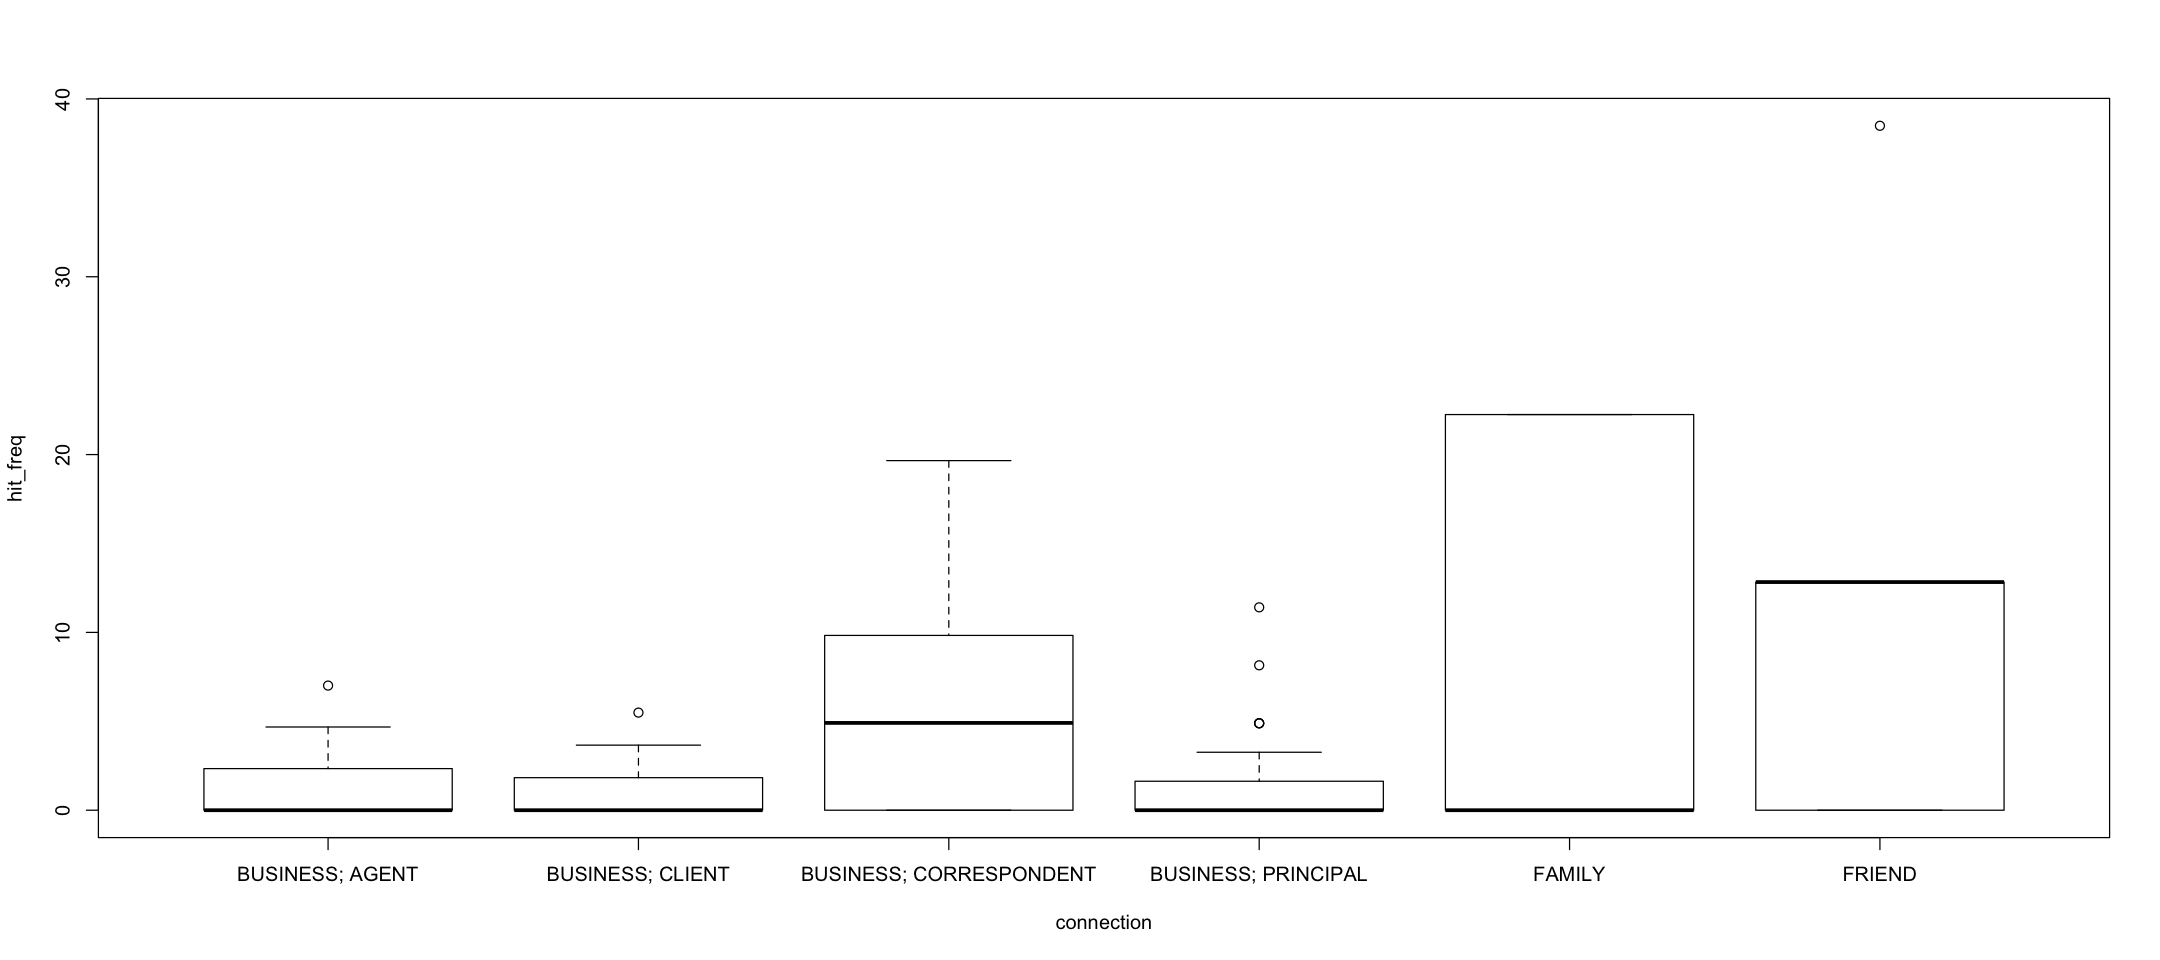

In [15]:
plot(hit_freq ~ connection, data=marescoe_conn)

par(cex.axis = 0.6)

options(repr.plot.width = 18, repr.plot.height = 8)

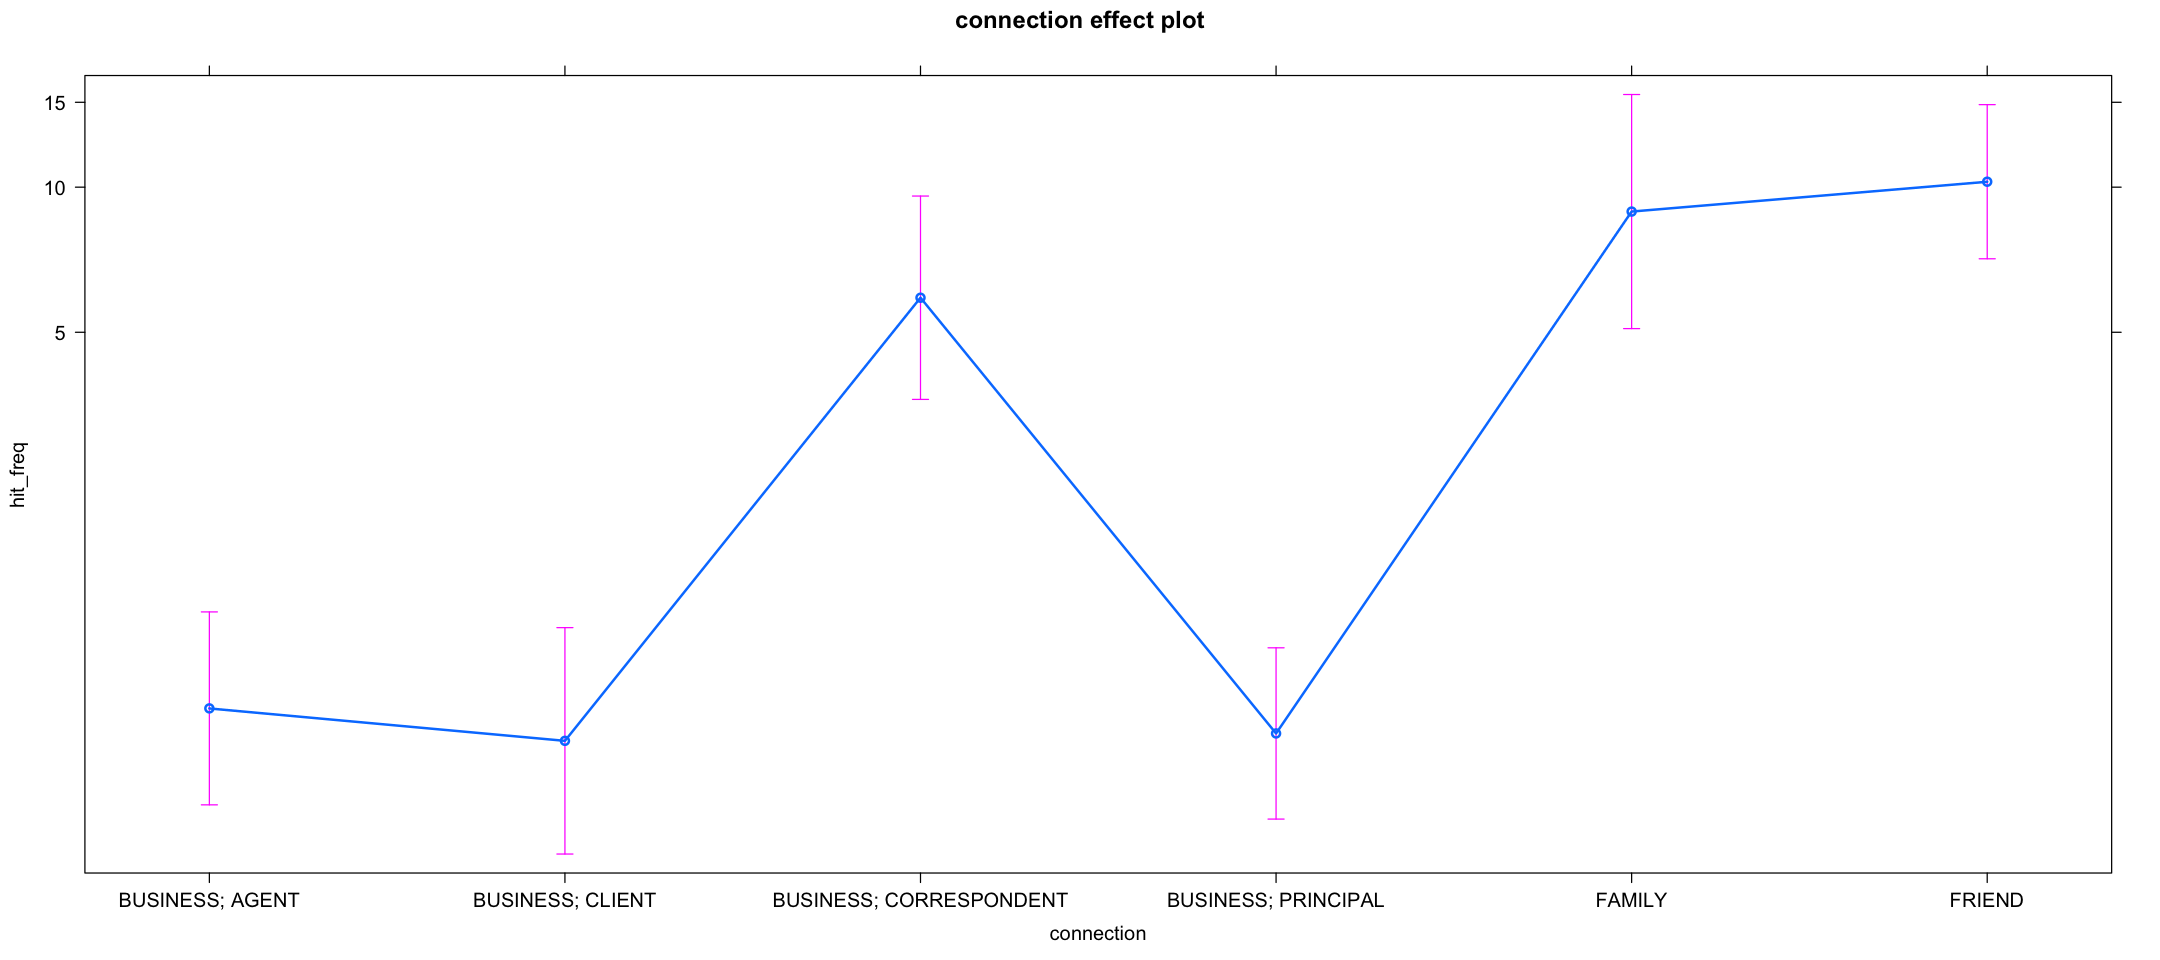

In [16]:
plot(effect("connection", m_conn_model))
 
par(cex.axis = 0.8)

# Increase the resolution of the plot (in inches)
options(repr.plot.width = 12, repr.plot.height = 6)

"BUSINESS;CORRESPONDENT", "FAMILY", and "FRIEND" are significant predictors for an increase of number of divine appeals used in correspondence. 

### 2 Generalised linear model using "connection" as a fixed effect and "sender" as a random effect, negative binomial

In [36]:
# negative binomial models are better at dealing with overdispersed count outcome variables

m_glmer1 <- glmer(hit_freq ~ connection + (1|sender),
                  data=marescoe_conn,
                  family=negative.binomial(theta=1),
                  nAGQ=0L)

summary(m_glmer1)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer1)
"------------------------------drop1------------------------------"
drop1(m_glmer1, test = "Chisq")

effect("connection", m_glmer1)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   761.8    791.0   -372.9    745.8      276 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5944 -0.4838  0.2386  3.8808 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.7005   0.8369  
Number of obs: 284, groups:  sender, 30

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.47299    0.33999  -1.391  0.16417   
connectionBUSINESS; CLIENT        -0.06931    0.49277  -0.141  0.88814   
connectionBUSINESS; CORRESPONDENT  1.95456    0.68403   2.857  0.00427 **
connectionBUSINESS; PRINCIPAL     -0.01737    0.46496  -0.037  0.97020   
connectionFAMILY                   2.65904    1.01908   2.609 

[1] "------------------------------dispersion------------------------------"

[1] 1.026595

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 761.7736       NA           NA
connection  5 775.8013 24.02768 0.0002144695


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6231381               0.5814088               4.3998714 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6124082               8.9000000              10.2640000 

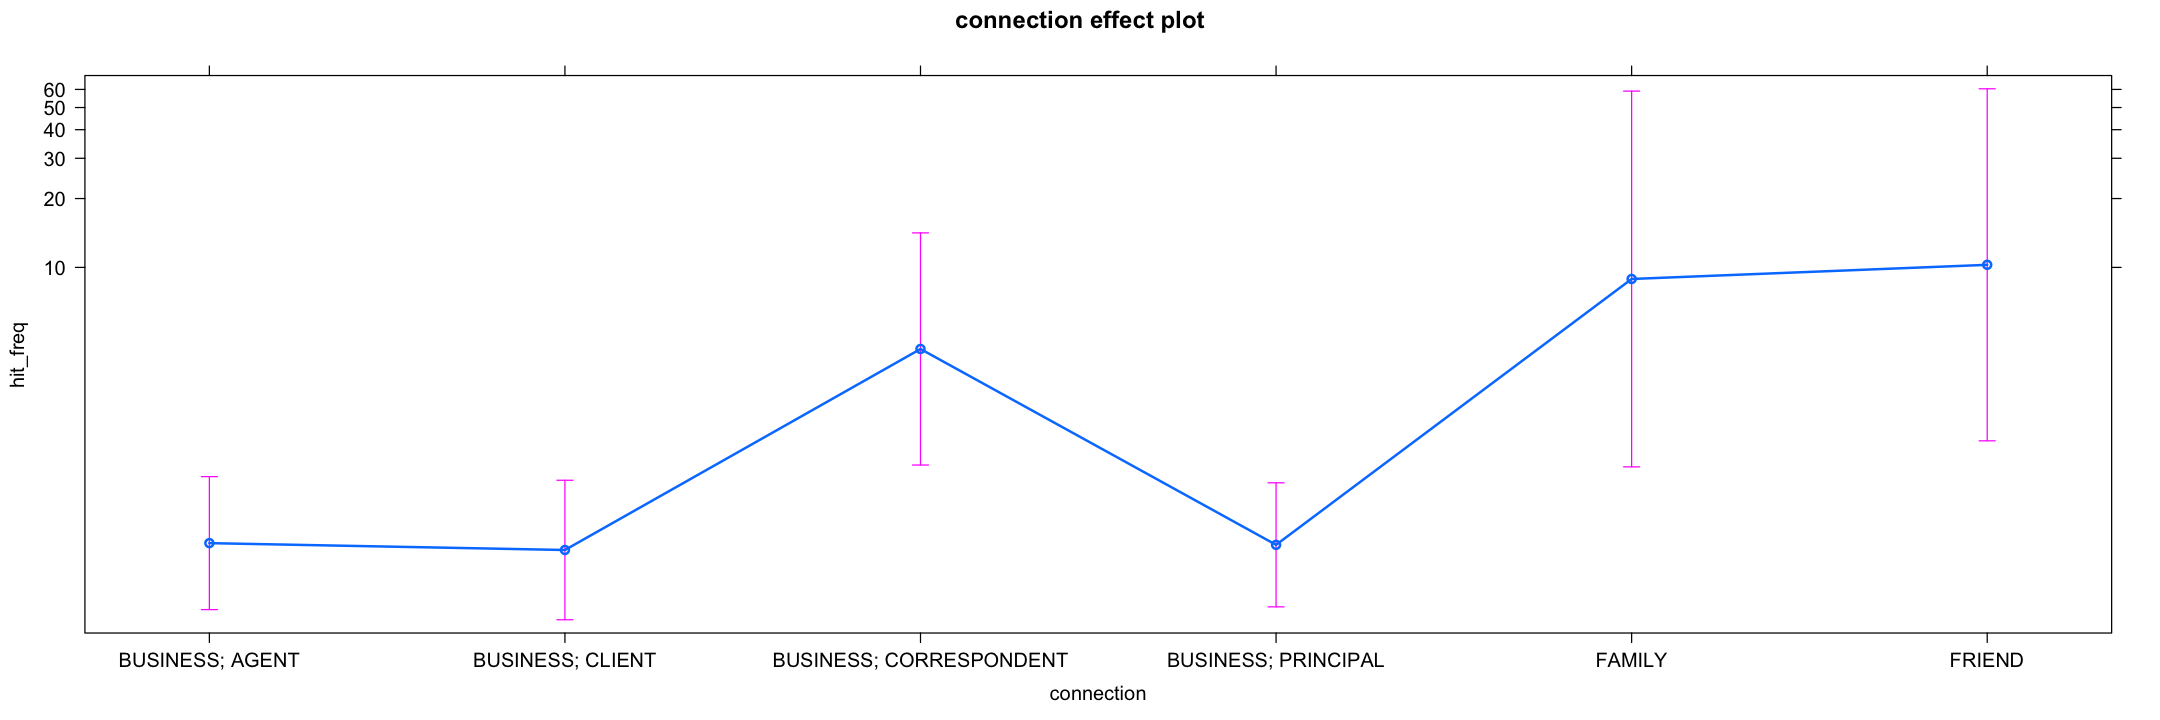

In [38]:
plot(effect("connection", m_glmer1))

par(cex.axis = 0.6)

options(repr.plot.width = 18, repr.plot.height = 6)

The significance of the correspondent variables drops when "sender" is used as random effect. However, FAMILY and FRIEND remain significant and have a high effect on the frequency of divine appeals.

### 3 Generalised linear mixed-effects model using "connection" as a fixed effect and "sender" and "year" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender) + (1 | year)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   760.5    793.3   -371.3    742.5      272 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5944 -0.4863  0.2386  3.8713 

Random effects:
 Groups Name        Variance  Std.Dev. 
 sender (Intercept) 6.931e-01 8.325e-01
 year   (Intercept) 1.077e-16 1.038e-08
Number of obs: 281, groups:  sender, 30; year, 12

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.44406    0.33923  -1.309  0.19053   
connectionBUSINESS; CLIENT        -0.09748    0.49134  -0.198  0.84273   
connectionBUSINESS; CORRESPONDENT  1.92684    0.68245   2.823  0.00475 **
connectionBUSINESS; PRINCIPAL     -0.03478    0.46376  -0.075  0.9402

[1] "------------------------------dispersion------------------------------"

[1] 1.026998

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 760.5375       NA           NA
connection  5 773.5853 23.04783 0.0003305322


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6414300               0.5818531               4.4052153 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6195018               8.9000000              10.2640000 

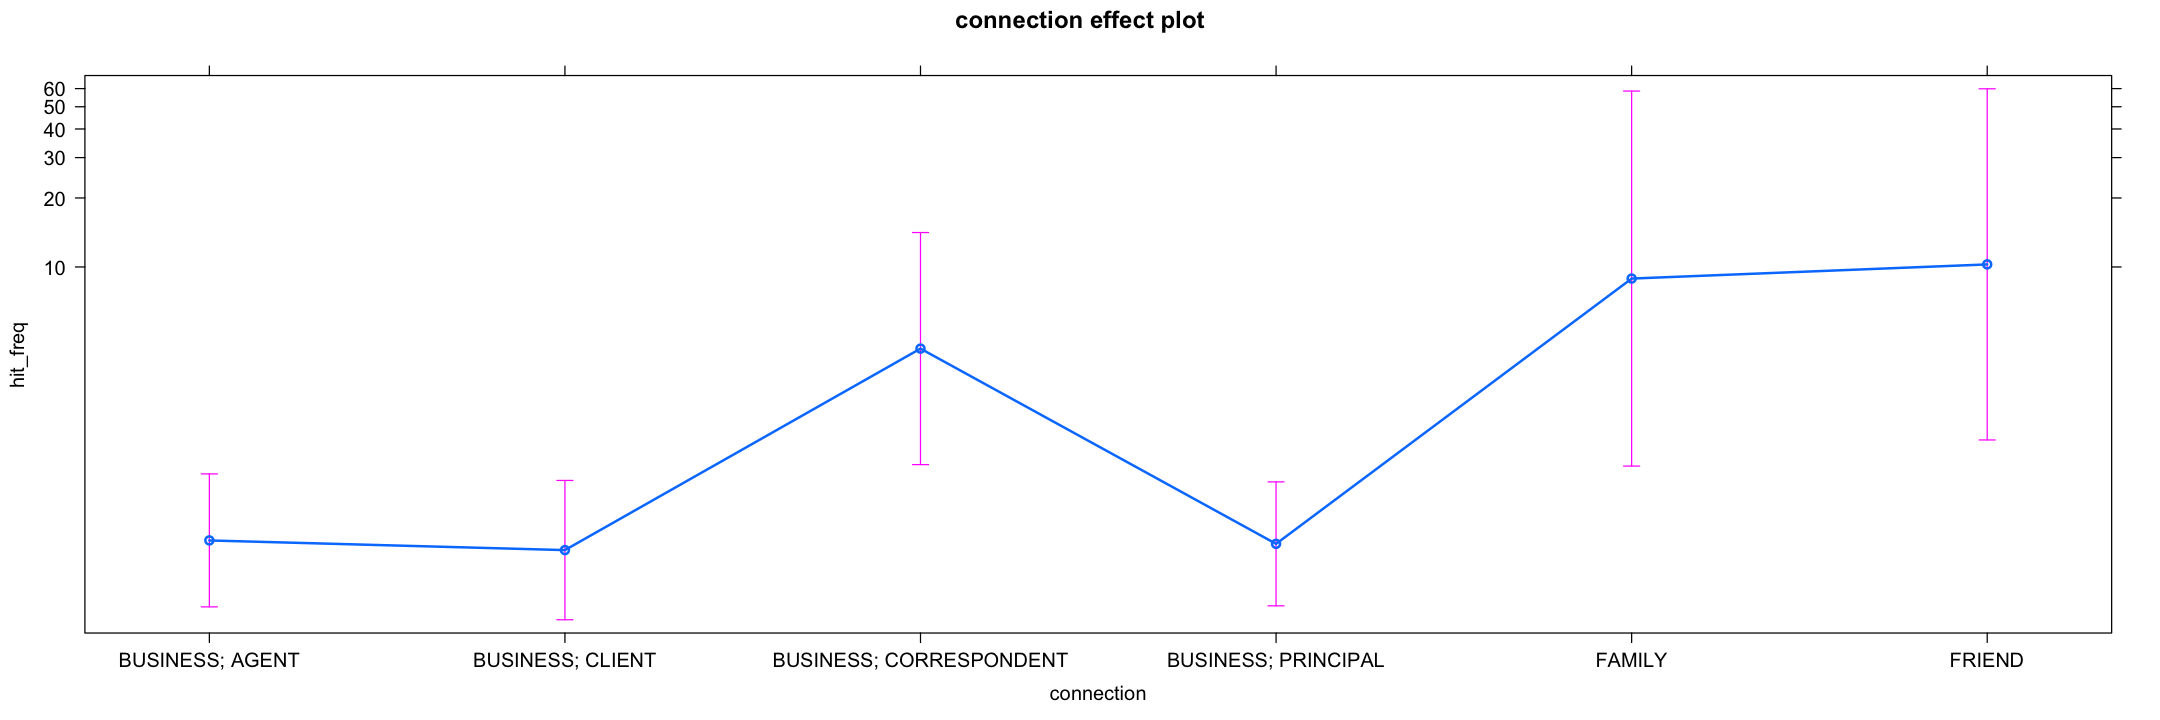

In [19]:
m_glmer2 <- glmer(hit_freq ~ connection + (1|sender) + (1|year),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2)

"------------------------------drop1------------------------------"
drop1(m_glmer2, test = "Chisq")

effect("connection", m_glmer2)

plot(effect("connection", m_glmer2))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The variance of both "sender" and "year" is near zero. Possibly this model is too complex to fit the data.

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | sender) + (1 | quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   763.8    796.6   -372.9    745.8      275 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5944 -0.4838  0.2386  3.8808 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 sender       (Intercept) 7.005e-01 8.369e-01
 quinquennial (Intercept) 3.648e-16 1.910e-08
Number of obs: 284, groups:  sender, 30; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.47297    0.33999  -1.391  0.16418   
connectionBUSINESS; CLIENT        -0.06932    0.49277  -0.141  0.88813   
connectionBUSINESS; CORRESPONDENT  1.95455    0.68403   2.857  0.00427 **
connectionBUSINESS; PRINCIPAL     -0

[1] "------------------------------dispersion------------------------------"

[1] 1.026595

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 763.7733       NA           NA
connection  5 777.8010 24.02773 0.0002144655


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6231483               0.5814162               4.3998797 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6124072               8.9000000              10.2640000 

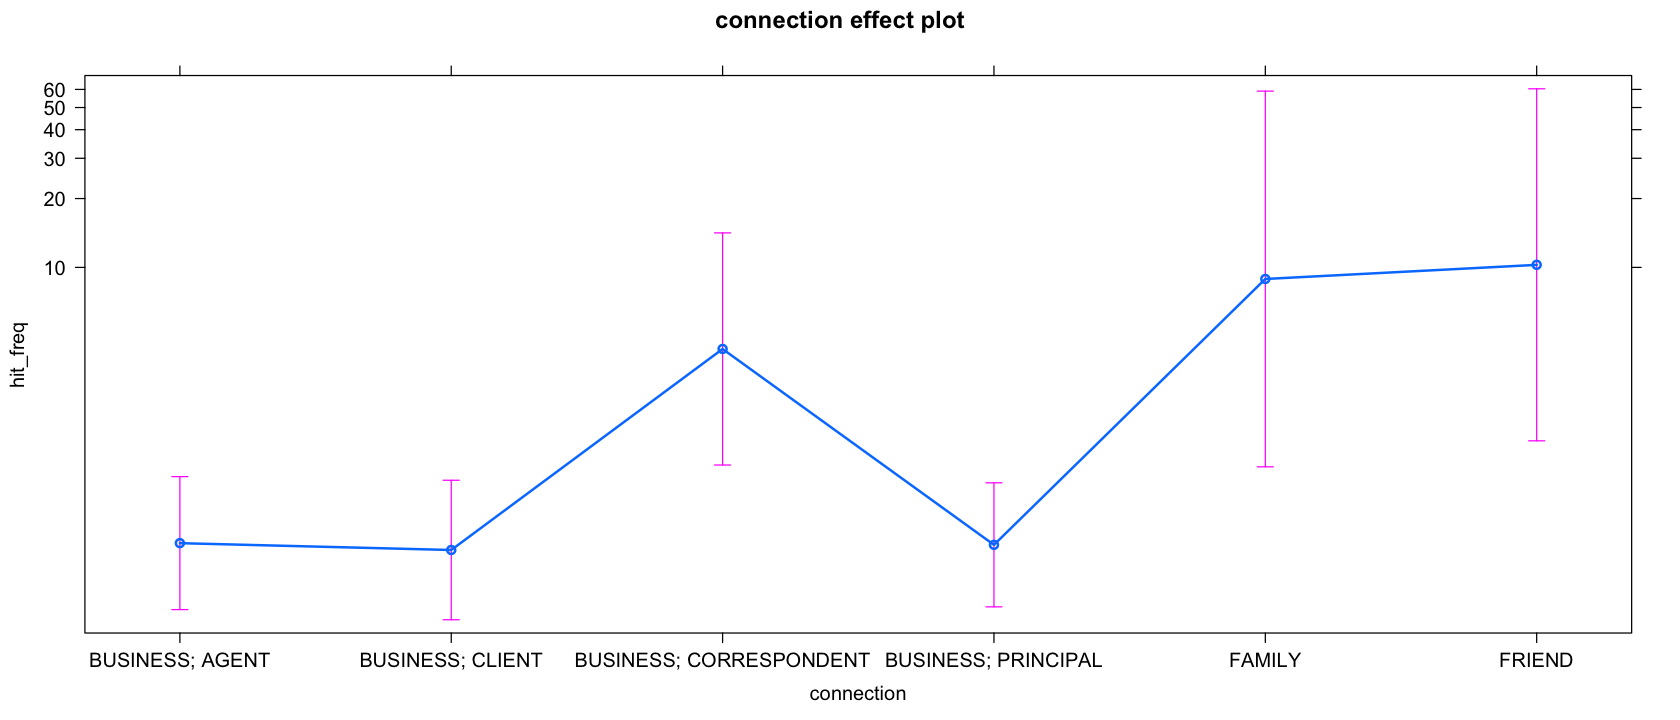

In [20]:
m_glmer2b <- glmer(hit_freq ~ connection + (1|sender) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2b)

"------------------------------drop1------------------------------"
drop1(m_glmer2b, test = "Chisq")

effect("connection", m_glmer2b)

plot(effect("connection", m_glmer2b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | pair) + (1 | quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   770.5    803.4   -376.3    752.5      275 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5615 -0.4768  0.2495  3.6941 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 0.7936   0.8908  
 quinquennial (Intercept) 0.0000   0.0000  
Number of obs: 284, groups:  pair, 69; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.5455     0.2988  -1.826  0.06788 . 
connectionBUSINESS; CLIENT         -0.1261     0.4317  -0.292  0.77017   
connectionBUSINESS; CORRESPONDENT   2.3738     0.7862   3.019  0.00253 **
connectionBUSINESS; PRINCIPAL      -0.1366    

[1] "------------------------------dispersion------------------------------"

[1] 1.014642

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 770.5136       NA           NA
connection  5 783.4369 22.92335 0.0003491473


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5795777               0.5108977               6.2233789 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5055614               6.6951803              10.2640000 

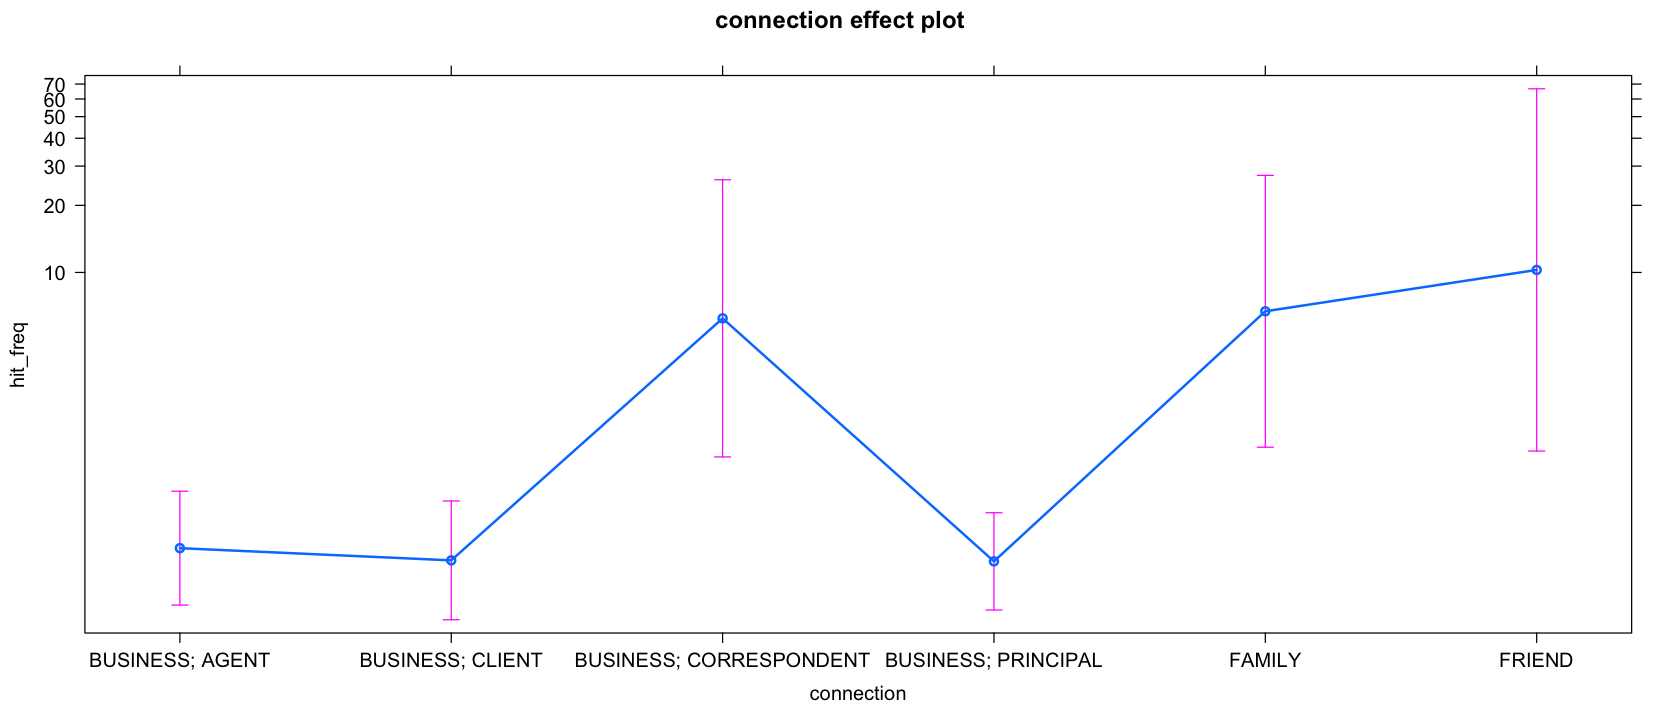

In [21]:
m_glmer2c <- glmer(hit_freq ~ connection + (1|pair) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2c)

"------------------------------drop1------------------------------"
drop1(m_glmer2c, test = "Chisq")

effect("connection", m_glmer2c)

plot(effect("connection", m_glmer2c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | pair) + (1 | year)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   768.7    801.5   -375.4    750.7      272 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5662 -0.4815  0.2561  3.7259 

Random effects:
 Groups Name        Variance  Std.Dev.
 pair   (Intercept) 0.7589756 0.87119 
 year   (Intercept) 0.0004909 0.02216 
Number of obs: 281, groups:  pair, 68; year, 12

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.4993     0.2976  -1.678  0.09338 . 
connectionBUSINESS; CLIENT         -0.1654     0.4281  -0.386  0.69917   
connectionBUSINESS; CORRESPONDENT   2.3259     0.7746   3.003  0.00268 **
connectionBUSINESS; PRINCIPAL      -0.1685     0.3898  -0.432  0.66548   
co

[1] "------------------------------dispersion------------------------------"

[1] 1.019465

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 768.7163       NA           NA
connection  5 781.4277 22.71148 0.0003832406


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6069365               0.5143968               6.2127769 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5128052               6.7643481              10.2602946 

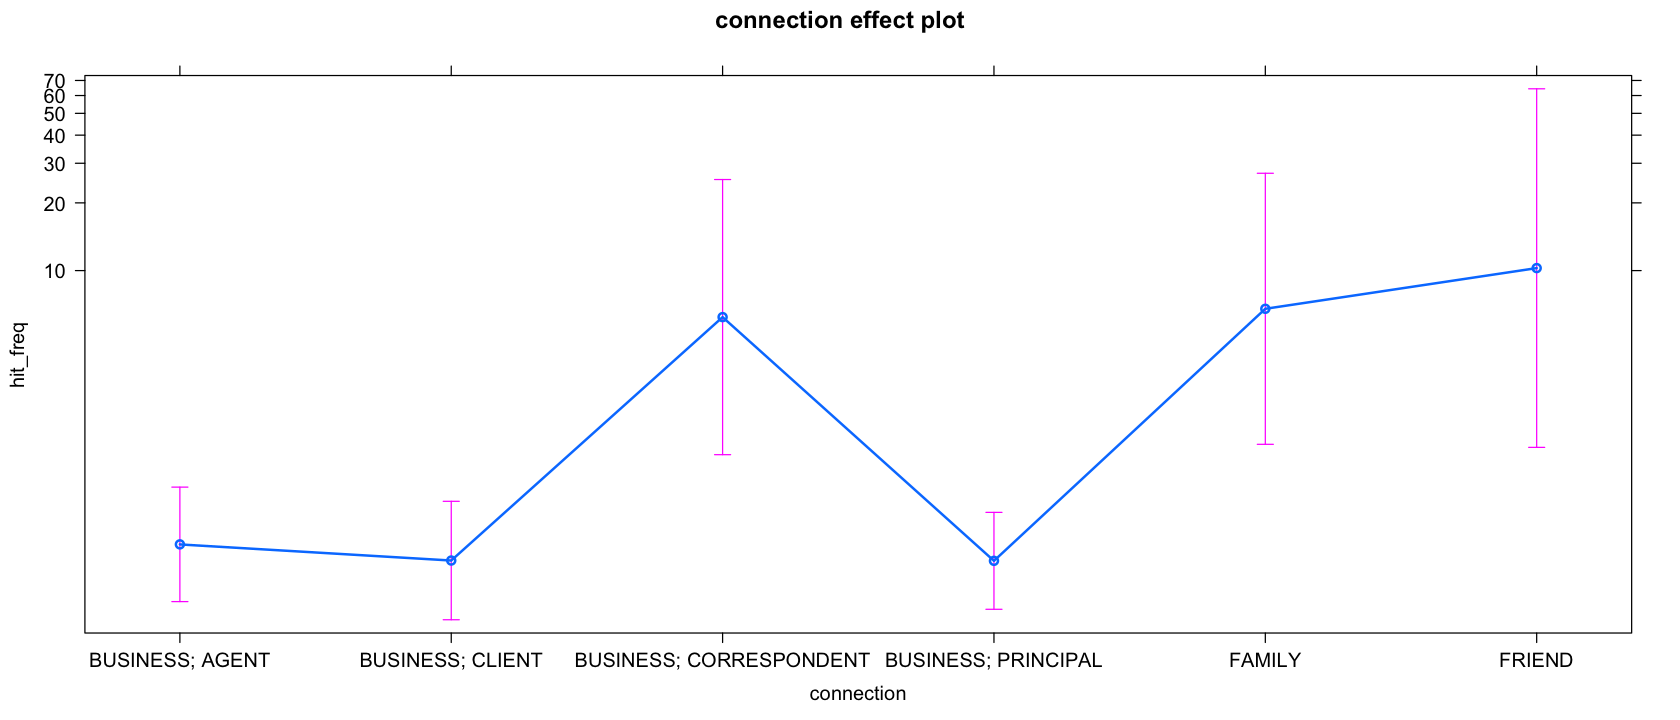

In [22]:
m_glmer2d <- glmer(hit_freq ~ connection + (1|pair) + (1|year),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer2d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer2d)

"------------------------------drop1------------------------------"
drop1(m_glmer2d, test = "Chisq")

effect("connection", m_glmer2d)

plot(effect("connection", m_glmer2d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Variations of the same model with different random effects (sender-addressee pairs instead of individual senders, added random temporal effect) do not yield more reliable models or models that better fit the first variation with "connection" as fixed effect and "sender" as random effect.

In [10]:
# remove "MULT" and "UNK" values from sender_is_older column
m_conn_old <- marescoe_conn[!(marescoe_conn$sender_is_older %in% c("MULT", "UNK")),  ]
m_conn_old$sender_is_older <- droplevels(m_conn_old$sender_is_older)

# remove "MULT" and "UNK" values from sender_over_40 column
m_conn_se40 <- marescoe_conn[!(marescoe_conn$sender_over_40 %in% c("MULT", "UNK")),  ]
m_conn_se40$sender_over_40 <- droplevels(m_conn_se40$sender_over_40)

# remove "UNK" values from age_gap_over_20 column
m_conn_gap <- marescoe_conn[marescoe_conn$age_gap_over_20 != "UNK", ]
m_conn_gap$age_gap_over_20 <- droplevels(m_conn_gap$age_gap_over_20)

# remove "FEMALE-MULT" and "MALE-MULT" values from gender_pair column
m_conn_gender <- marescoe_conn[!(marescoe_conn$gender_pair %in% c("FEMALE-MULT", "MALE-MULT")),  ]
m_conn_gender$gender_pair <- droplevels(m_conn_gender$gender_pair)

In [11]:
levels(m_conn_old$sender_is_older)
levels(m_conn_se40$sender_over_40)
levels(m_conn_gap$age_gap_over_20)
levels(m_conn_gender$gender_pair)

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

[1] "FEMALE-FEMALE" "FEMALE-MALE"   "MALE-FEMALE"   "MALE-MALE"

### 4.1 Generalised linear mixed-effects model using "connection" and "age_gap_over_20" as fixed effects and "sender" as a random effect, negative binomial (BEST FIT)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + age_gap_over_20 + (1 | sender)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   289.1    306.3   -138.5    277.1      125 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5684 -0.4482 -0.1717  4.5897 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.666    0.8161  
Number of obs: 131, groups:  sender, 12

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.3226     0.6487  -0.497    0.619
connectionBUSINESS; CORRESPONDENT   1.7604     1.1241   1.566    0.117
connectionBUSINESS; PRINCIPAL      -0.1651     0.6920  -0.239    0.811
age_gap_over_20TRUE                -0.6852     0.6332  -1.082    0.279

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSI

[1] "------------------------------dispersion------------------------------"

[1] 0.966053

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)  
<none>          NA 289.0935       NA        NA
connection       2 288.3890 3.295576 0.1924752
age_gap_over_20  1 288.2149 1.121450 0.2896064


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.5432143               3.1585810               0.4605608 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.7041768 0.3548980 

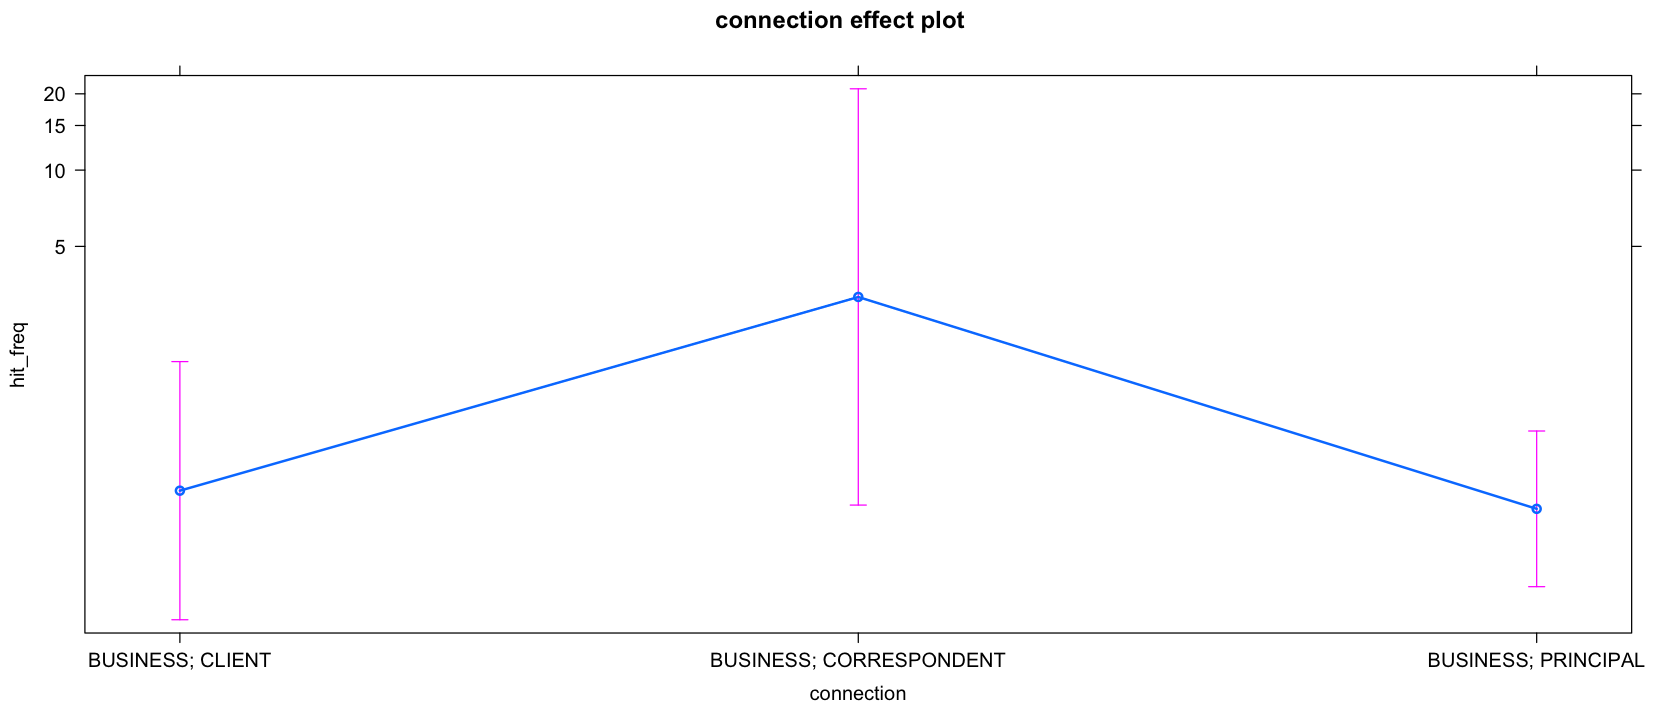

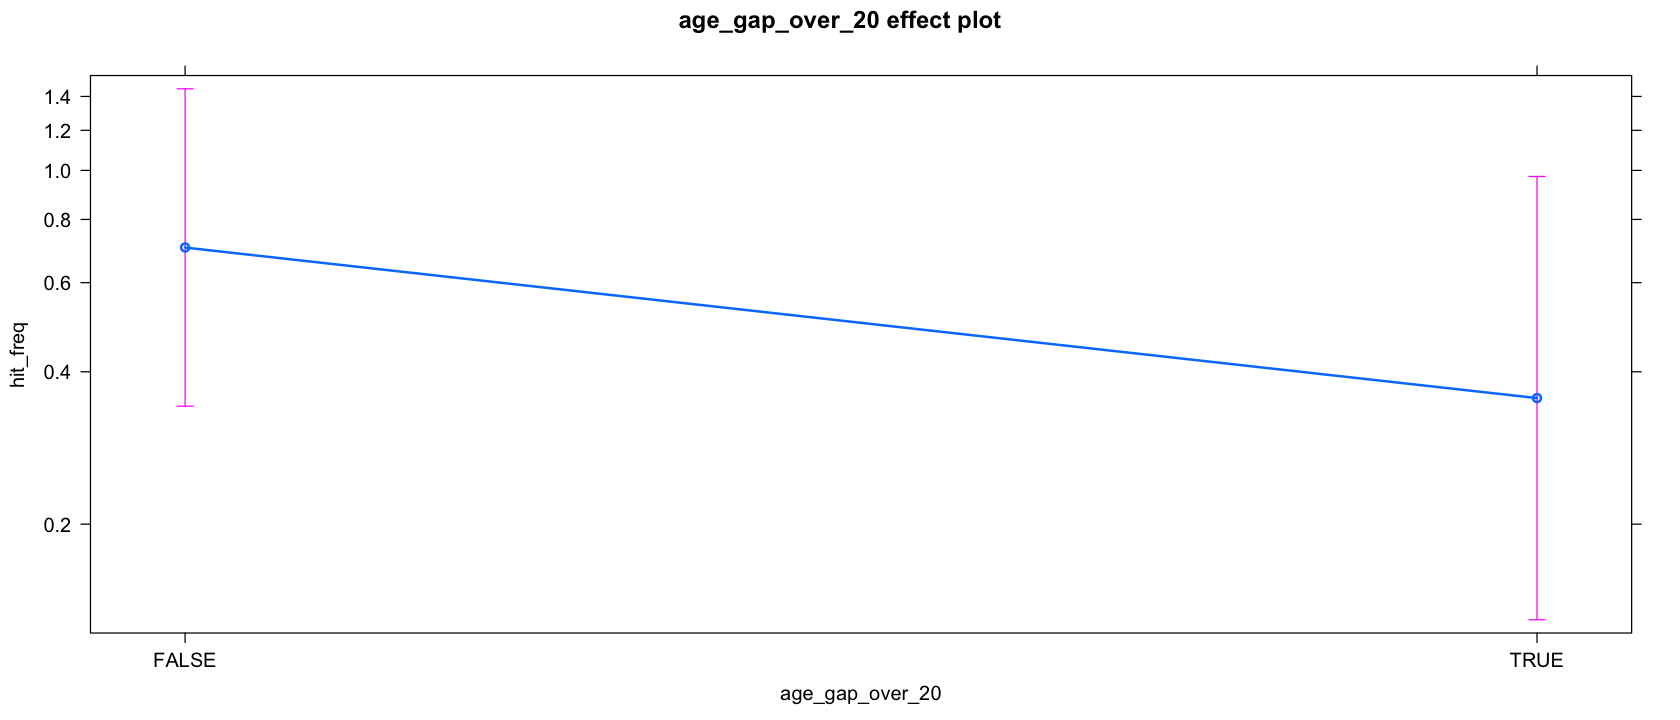

In [33]:
m_glmer3 <- glmer(hit_freq ~ connection + age_gap_over_20 + (1|sender),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3)

"------------------------------drop1------------------------------"
drop1(m_glmer3, test = "Chisq")

effect("connection", m_glmer3)
effect("age_gap_over_20", m_glmer3)

plot(effect("connection", m_glmer3))
plot(effect("age_gap_over_20", m_glmer3))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 4.2 Generalised linear mixed-effects model using "connection" and "age_gap_over_20" as fixed effects and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + age_gap_over_20 + (1 | sender) + (1 |  
    quinquennial)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   291.0    311.2   -138.5    277.0      124 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9012 -0.5605 -0.4561 -0.1742  4.5327 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 0.66409  0.8149  
 quinquennial (Intercept) 0.02493  0.1579  
Number of obs: 131, groups:  sender, 12; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.2986     0.6546  -0.456    0.648
connectionBUSINESS; CORRESPONDENT   1.7121     1.1287   1.517    0.129
connectionBUSINESS; PRINCIPAL      -0.1925     0.6928  -0.278    0.781
age_gap_over_20TRUE              

[1] "------------------------------dispersion------------------------------"

[1] 0.9637592

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)  
<none>          NA 291.0454       NA        NA
connection       2 290.2657 3.220219 0.1998657
age_gap_over_20  1 290.2034 1.157907 0.2818999


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.5533584               3.0660422               0.4564622 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.7049155 0.3506942 

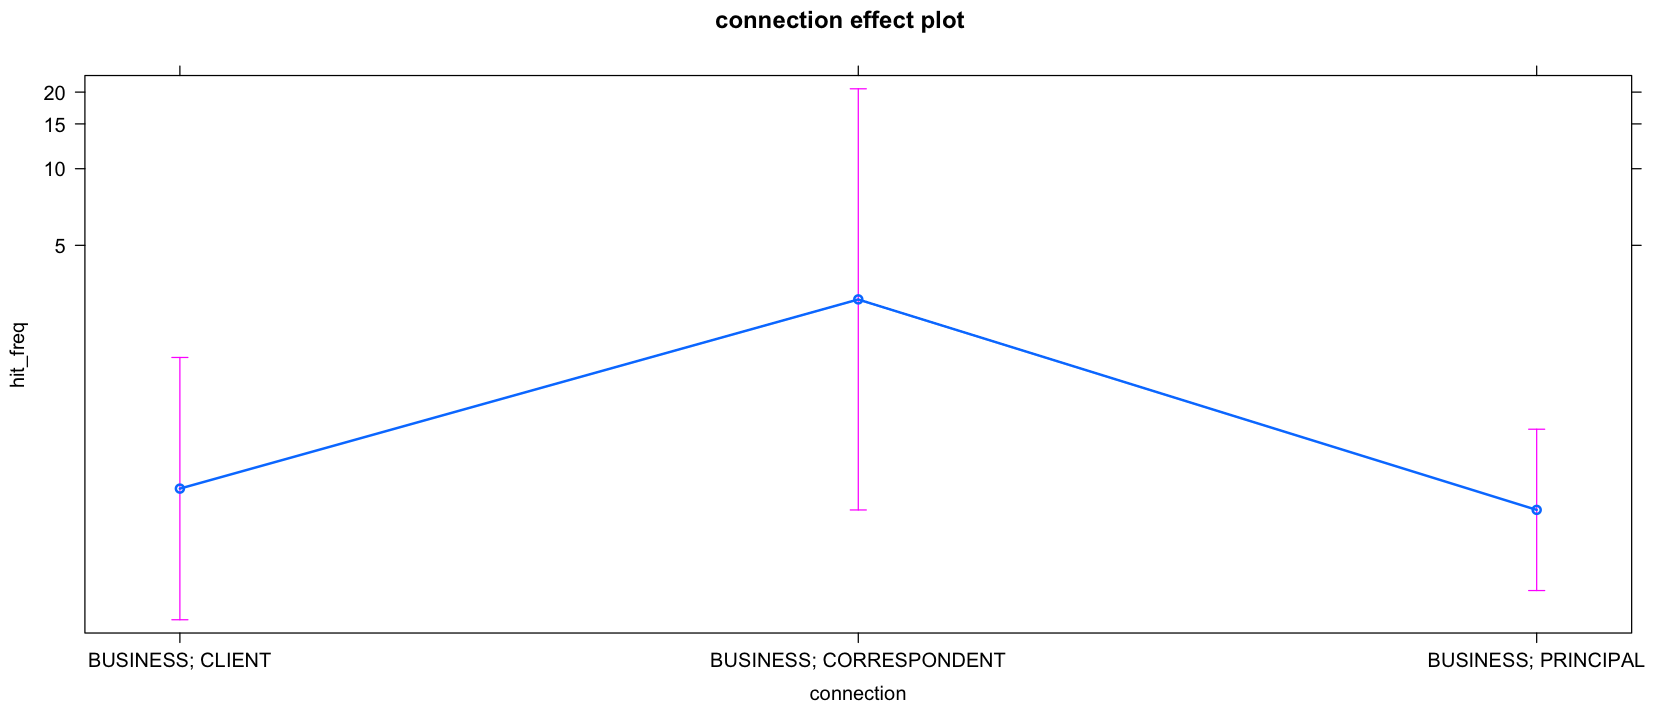

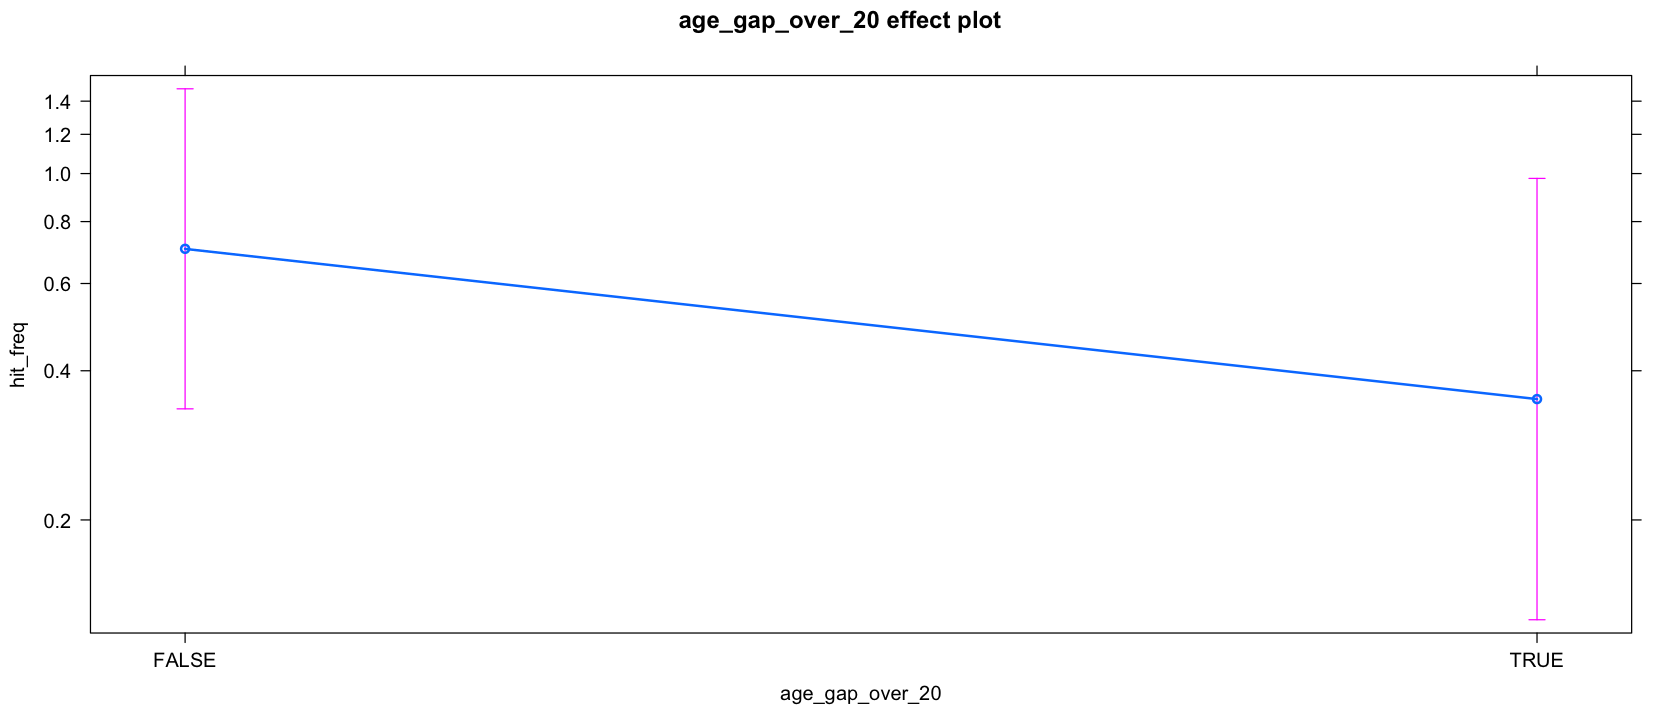

In [26]:
m_glmer3b <- glmer(hit_freq ~ connection + age_gap_over_20 + (1|sender) + (1|quinquennial),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3b)

"------------------------------drop1------------------------------"
drop1(m_glmer3b, test = "Chisq")

effect("connection", m_glmer3b)
effect("age_gap_over_20", m_glmer3b)

plot(effect("connection", m_glmer3b))
plot(effect("age_gap_over_20", m_glmer3b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + age_gap_over_20 + (1 | pair)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   291.7    308.9   -139.8    279.7      125 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5617 -0.4542 -0.1500  3.8478 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.6442   0.8026  
Number of obs: 131, groups:  pair, 29

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.1067     0.5605  -0.190    0.849
connectionBUSINESS; CORRESPONDENT   1.5445     1.0654   1.450    0.147
connectionBUSINESS; PRINCIPAL      -0.4799     0.5607  -0.856    0.392
age_gap_over_20TRUE                -0.7567     0.4891  -1.547    0.122

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSIP
cB

[1] "------------------------------dispersion------------------------------"

[1] 0.9611693

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)   
<none>          NA 291.6533       NA         NA
connection       2 292.5702 4.916959 0.08556495
age_gap_over_20  1 292.3884 2.735089 0.09816601


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
               0.654171                3.065197                0.404842 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.6842095 0.3210460 

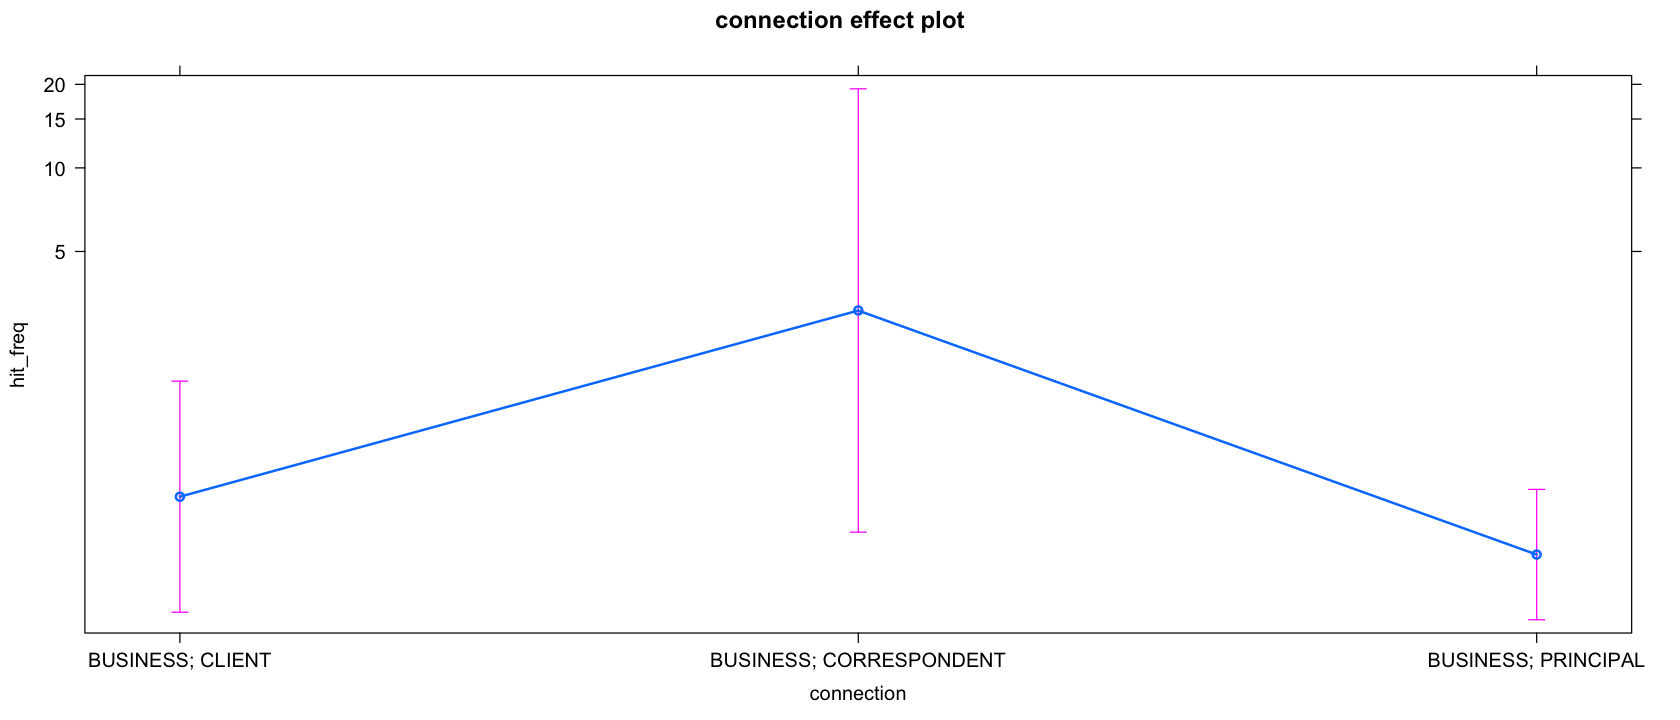

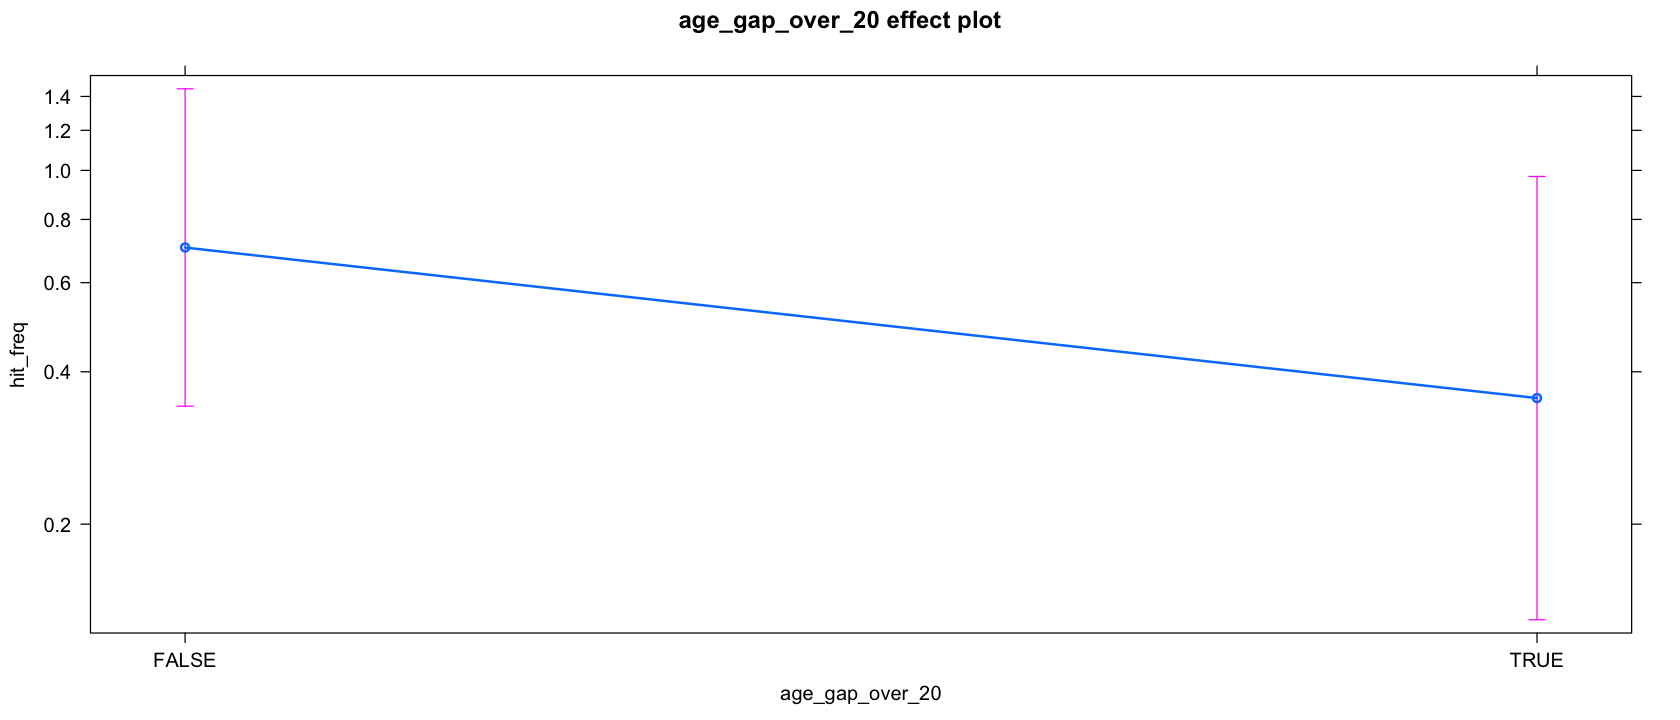

In [27]:
m_glmer3c <- glmer(hit_freq ~ connection + age_gap_over_20 + (1|pair),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3c)

"------------------------------drop1------------------------------"
drop1(m_glmer3c, test = "Chisq")

effect("connection", m_glmer3c)
effect("age_gap_over_20", m_glmer3c)

plot(effect("connection", m_glmer3c))
plot(effect("age_gap_over_20", m_glmer3))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: 
hit_freq ~ connection + age_gap_over_20 + (1 | pair) + (1 | quinquennial)
   Data: m_conn_gap

     AIC      BIC   logLik deviance df.resid 
   293.3    313.4   -139.6    279.3      124 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8992 -0.5603 -0.4246 -0.1688  3.7386 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 0.6165   0.7852  
 quinquennial (Intercept) 0.1133   0.3366  
Number of obs: 131, groups:  pair, 29; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                       -0.01374    0.58893  -0.023    0.981
connectionBUSINESS; CORRESPONDENT  1.28993    1.06907   1.207    0.228
connectionBUSINESS; PRINCIPAL     -0.56568    0.55926  -1.011    0.312
age_gap_over_20TRUE               -0.76749

[1] "------------------------------dispersion------------------------------"

[1] 0.9553685

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)   
<none>          NA 293.2979       NA         NA
connection       2 293.8858 4.587899 0.10086730
age_gap_over_20  1 294.1329 2.834924 0.09223516


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.7146447               2.5959769               0.4058990 


 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
0.6951157 0.3226569 

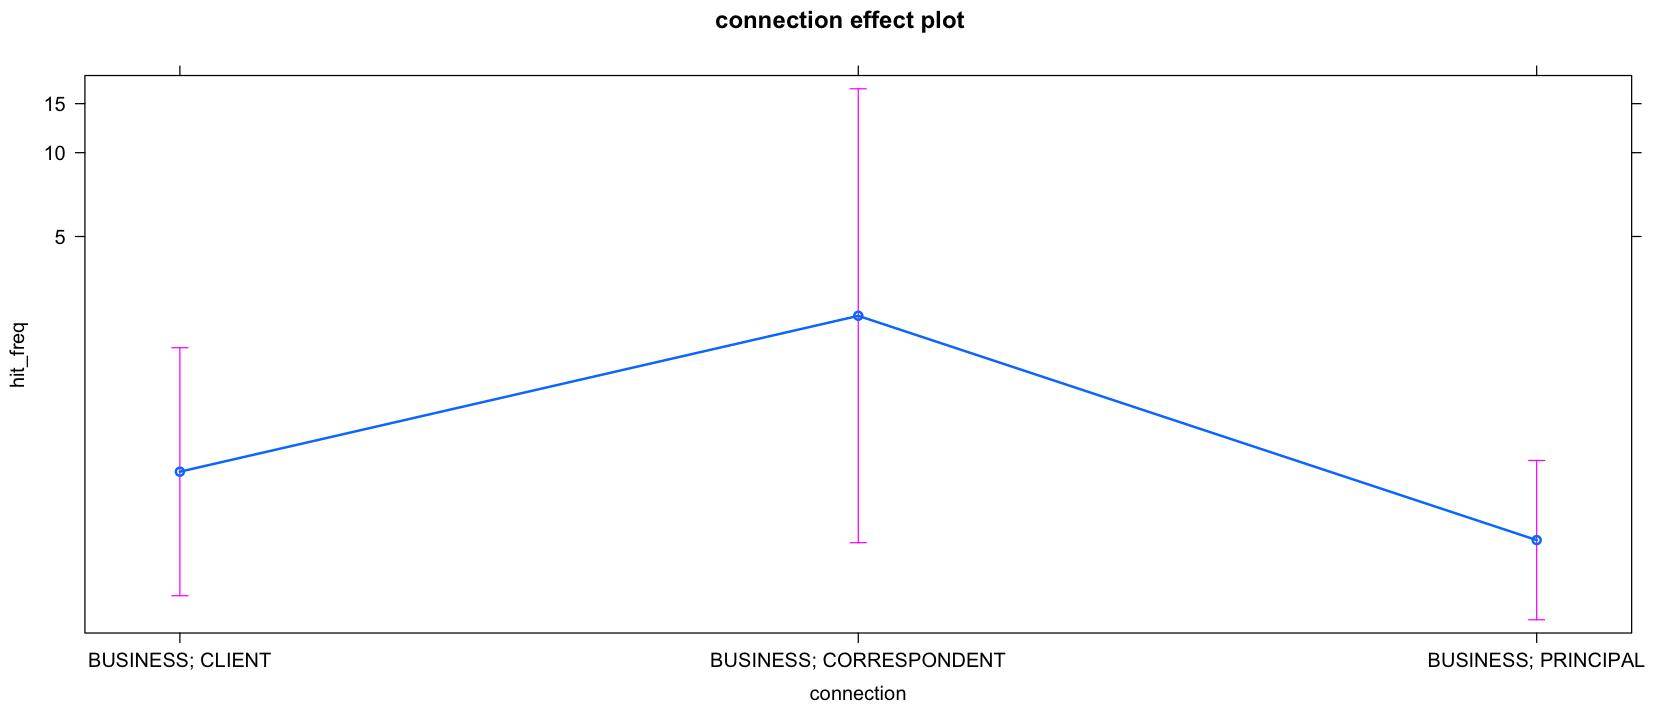

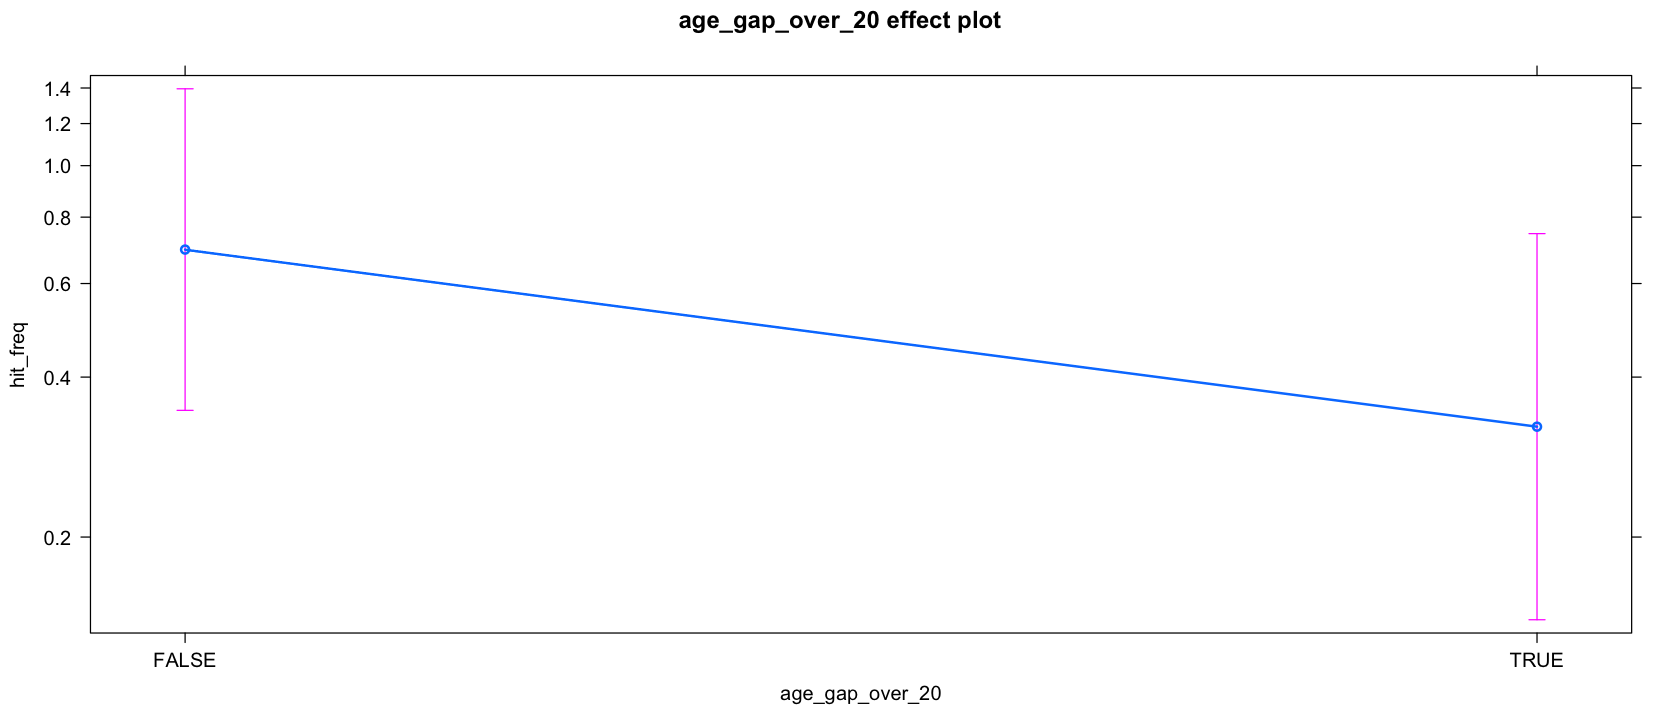

In [28]:
m_glmer3d <- glmer(hit_freq ~ connection + age_gap_over_20 + (1|pair) + (1|quinquennial),
                  data=m_conn_gap,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer3d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer3d)

"------------------------------drop1------------------------------"
drop1(m_glmer3d, test = "Chisq")

effect("connection", m_glmer3d)
effect("age_gap_over_20", m_glmer3d)

plot(effect("connection", m_glmer3d))
plot(effect("age_gap_over_20", m_glmer3d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"age_gap_over_20" is not a signficant predictor. The best fit for the model uses only "sender" as a random effect. Using pairs instead of individual senders results in slightly higher AIC scores.

### 5.1 Generalised linear mixed-effects model using "connection" and "sender is older" as fixed effects, and "sender" as a random effect, negative binomial (BEST FIT)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_is_older + (1 | sender)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   303.7    321.1   -145.9    291.7      128 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5450 -0.4585 -0.2036  4.0540 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.9883   0.9941  
Number of obs: 134, groups:  sender, 15

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.2033     0.7989  -0.255    0.799
connectionBUSINESS; CORRESPONDENT   1.6411     1.3429   1.222    0.222
connectionBUSINESS; PRINCIPAL      -0.4722     0.8019  -0.589    0.556
sender_is_olderTRUE                -0.1026     1.0328  -0.099    0.921

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSI

[1] "------------------------------dispersion------------------------------"

[1] 0.9569748

[1] "------------------------------drop1------------------------------"

Df AIC      LRT         Pr(Chi)  
<none>          NA 303.7282          NA        NA
connection       2 301.7037 1.975530900 0.3724079
sender_is_older  1 301.7349 0.006689867 0.9348124


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.7449500               3.8446844               0.4645685 


 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.6316503 0.5700596 

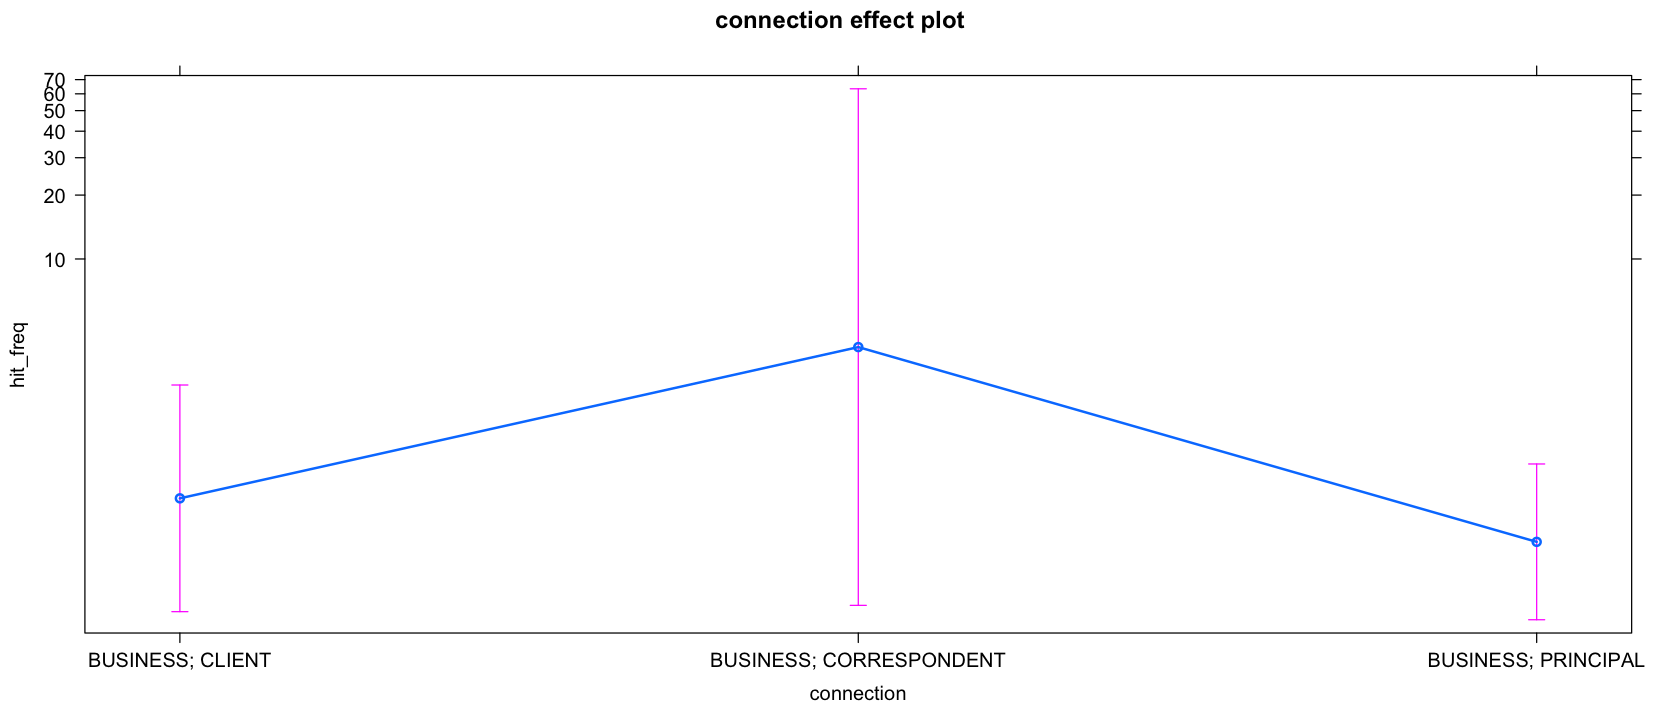

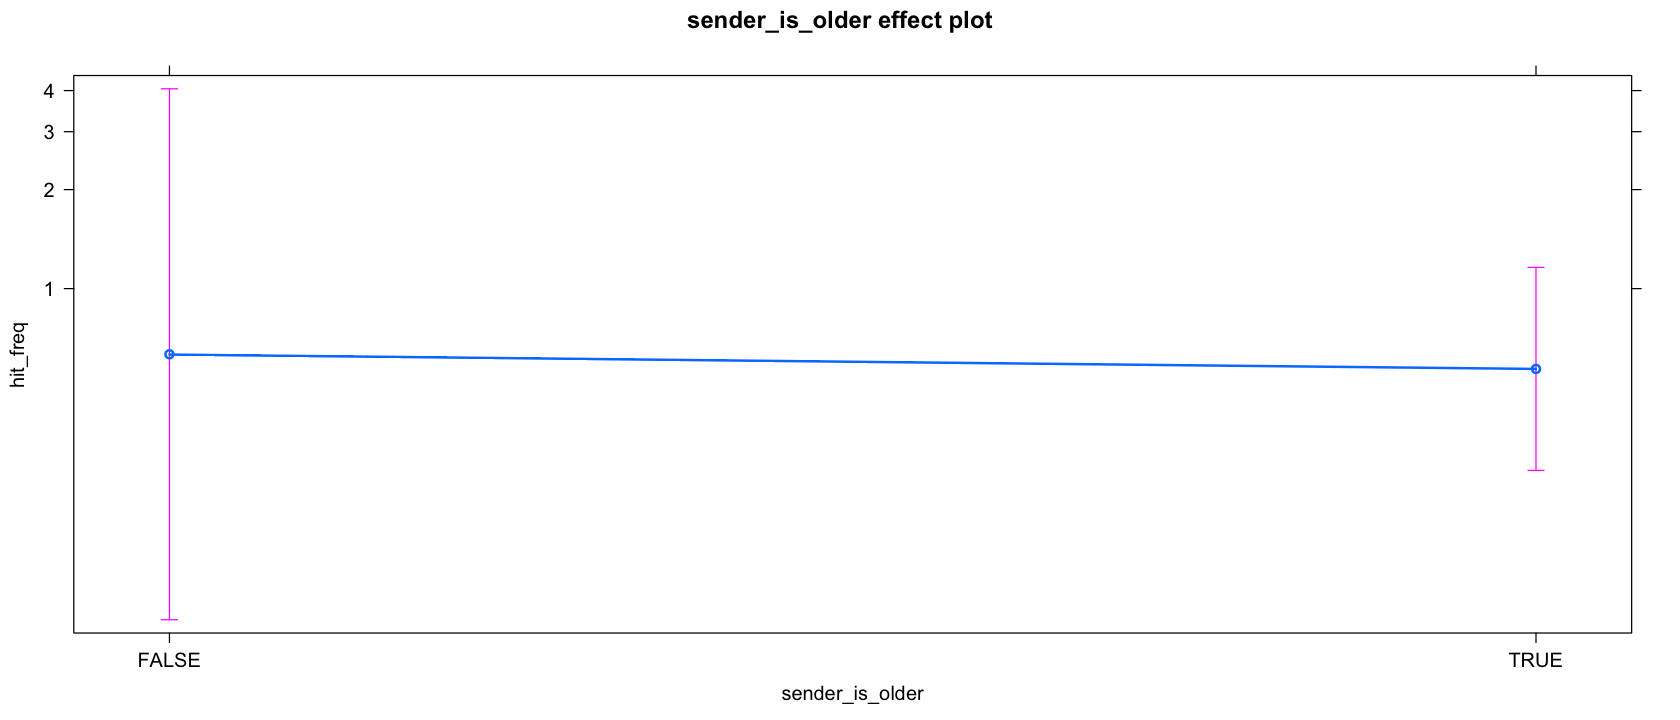

In [32]:
m_glmer4 <- glmer(hit_freq ~ connection + sender_is_older + (1|sender),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4)

"------------------------------drop1------------------------------"
drop1(m_glmer4, test = "Chisq")

effect("connection", m_glmer4)
effect("sender_is_older", m_glmer4)

plot(effect("connection", m_glmer4))
plot(effect("sender_is_older", m_glmer4))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 5.2 Generalised linear mixed-effects model using "connection" and "sender is older" as fixed effects, and "pair" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_is_older + (1 | pair)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   308.3    325.7   -148.2    296.3      128 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5615 -0.4423 -0.1580  3.8013 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.8434   0.9183  
Number of obs: 134, groups:  pair, 31

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.1941     0.7642  -0.254    0.800
connectionBUSINESS; CORRESPONDENT   1.6319     1.2665   1.288    0.198
connectionBUSINESS; PRINCIPAL      -0.5019     0.6141  -0.817    0.414
sender_is_olderTRUE                -0.2227     0.9237  -0.241    0.809

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSIP
cB

[1] "------------------------------dispersion------------------------------"

[1] 0.9599776

[1] "------------------------------drop1------------------------------"

Df AIC      LRT        Pr(Chi)  
<none>          NA 308.3001         NA        NA
connection       2 306.8972 2.59711087 0.2729258
sender_is_older  1 306.3552 0.05502689 0.8145362


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.6757943               3.4555763               0.4091057 


 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.6236697 0.4991336 

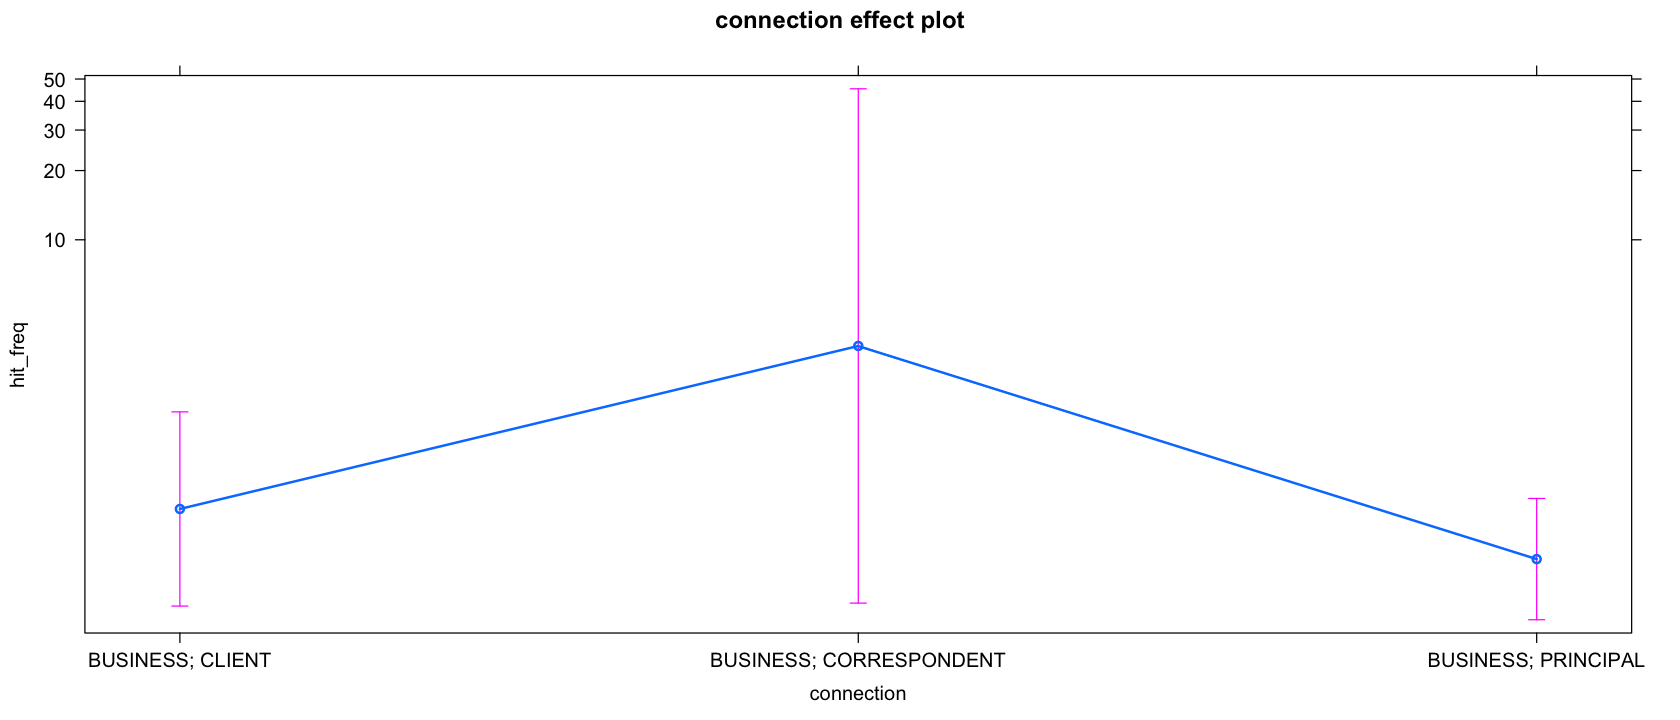

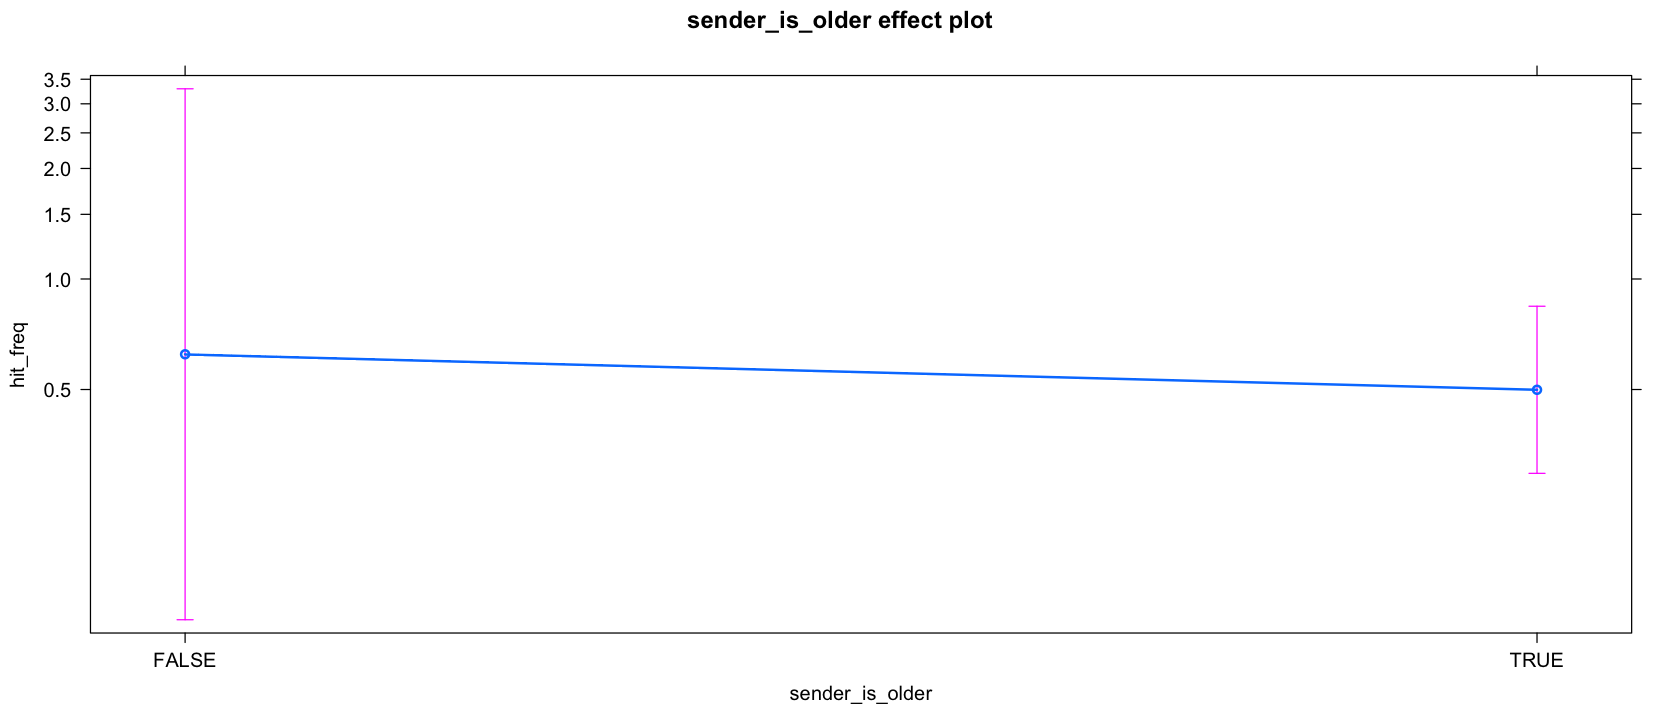

In [30]:
m_glmer4b <- glmer(hit_freq ~ connection + sender_is_older + (1|pair),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4b)

"------------------------------drop1------------------------------"
drop1(m_glmer4b, test = "Chisq")

effect("connection", m_glmer4b)
effect("sender_is_older", m_glmer4b)

plot(effect("connection", m_glmer4b))
plot(effect("sender_is_older", m_glmer4b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 5.3 Generalised linear mixed-effects model using "connection" and "sender is older" as fixed effects, and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_is_older + (1 | sender) + (1 |  
    quinquennial)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   305.7    326.0   -145.9    291.7      127 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5452 -0.4589 -0.2009  4.0569 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 0.9714   0.9856  
 quinquennial (Intercept) 0.0000   0.0000  
Number of obs: 134, groups:  sender, 15; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.2020     0.7949  -0.254    0.799
connectionBUSINESS; CORRESPONDENT   1.6398     1.3342   1.229    0.219
connectionBUSINESS; PRINCIPAL      -0.4687     0.7970  -0.588    0.557
sender_is_olderTRUE              

[1] "------------------------------dispersion------------------------------"

[1] 0.9576018

[1] "------------------------------drop1------------------------------"

Df AIC      LRT         Pr(Chi)  
<none>          NA 305.7303          NA        NA
connection       2 303.5931 1.862860661 0.3939898
sender_is_older  1 303.7337 0.003436348 0.9532545


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.7442503               3.8360870               0.4657822 


 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.6340552 0.5707893 

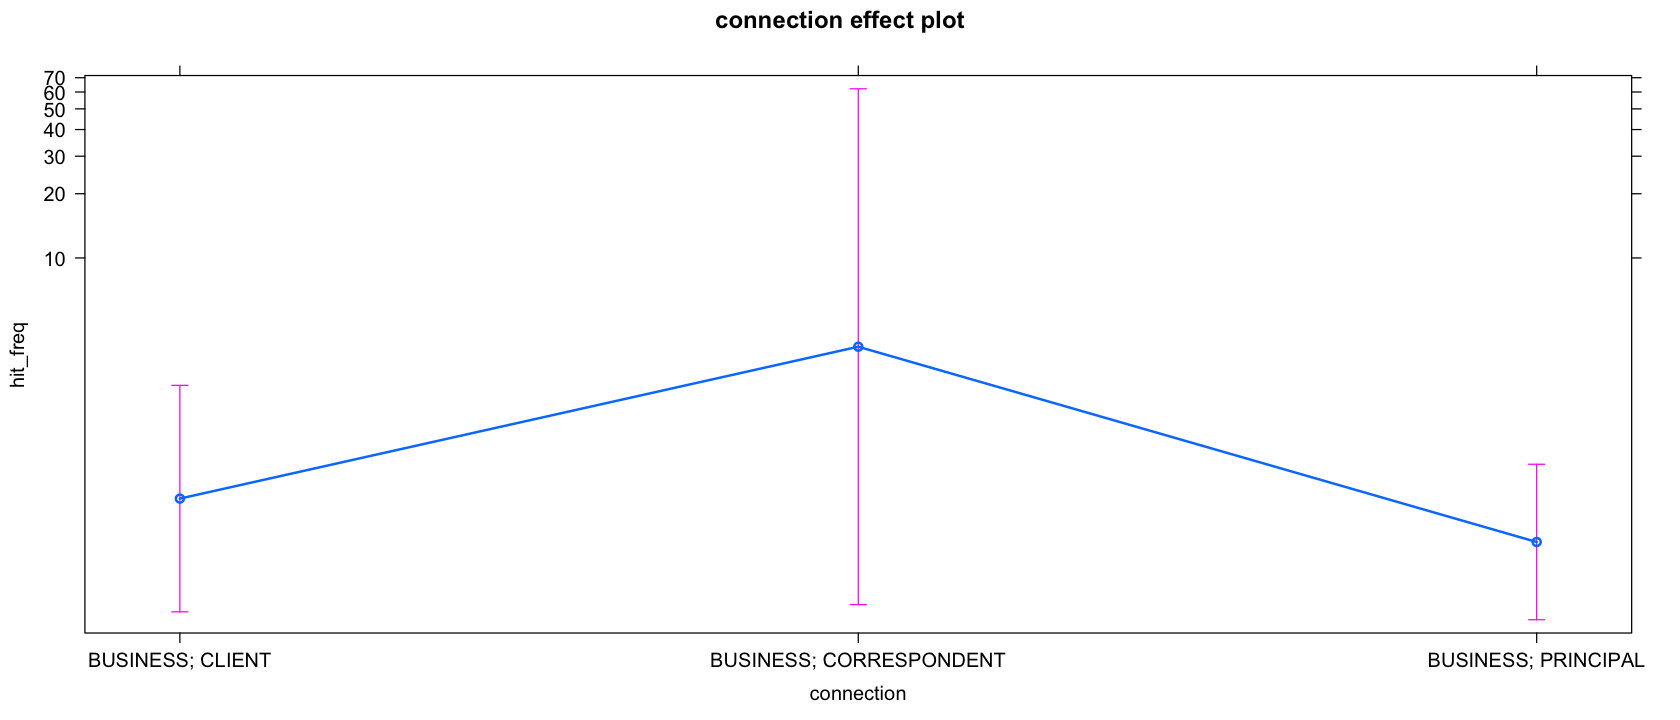

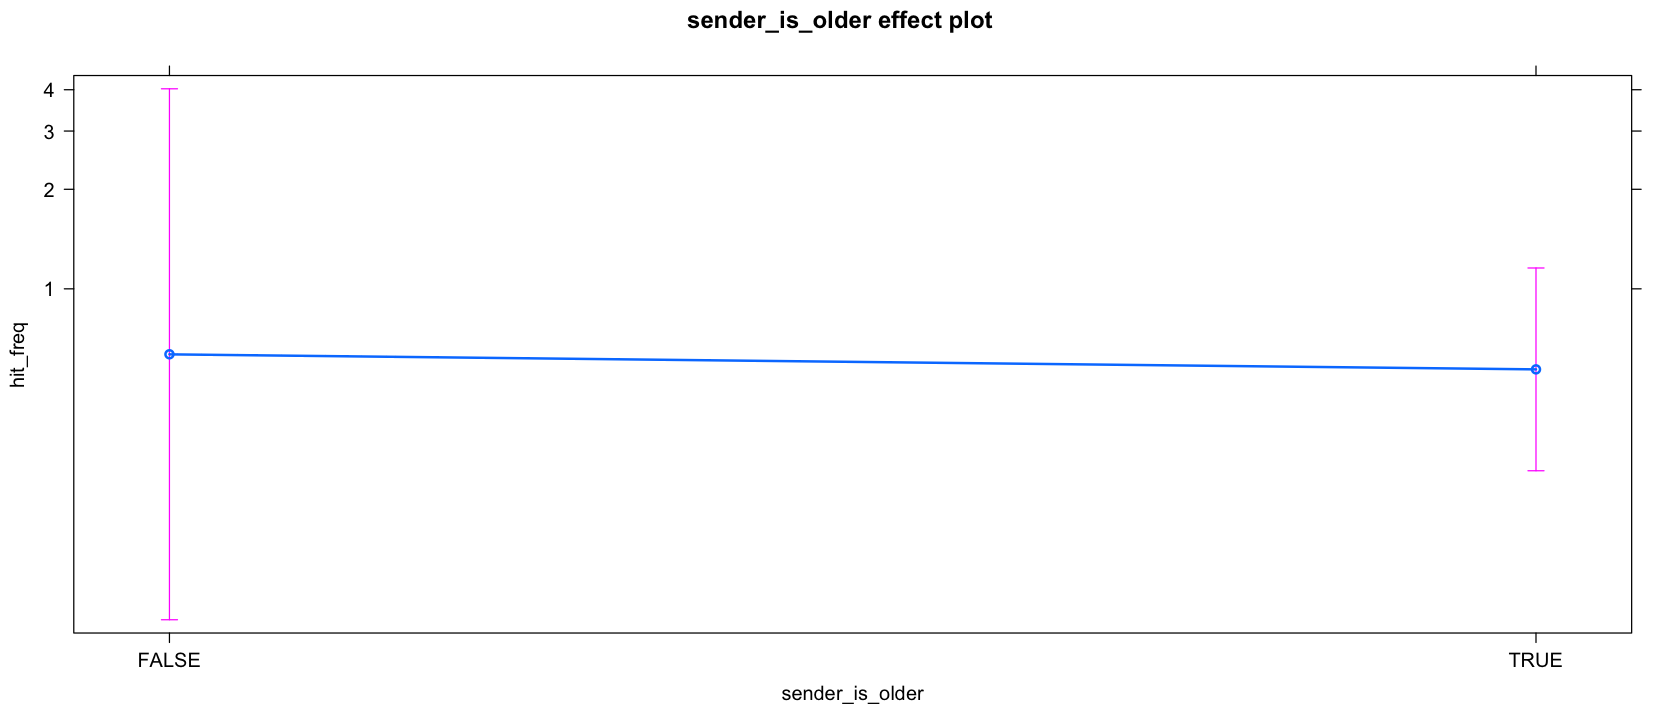

In [31]:
m_glmer4c <- glmer(hit_freq ~ connection + sender_is_older + (1|sender) + (1|quinquennial),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4c)

"------------------------------drop1------------------------------"
drop1(m_glmer4c, test = "Chisq")

effect("connection", m_glmer4c)
effect("sender_is_older", m_glmer4c)

plot(effect("connection", m_glmer4c))
plot(effect("sender_is_older", m_glmer4c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 5.4 Generalised linear mixed-effects model using "connection" and "sender is older" as fixed effects, and "pair" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: 
hit_freq ~ connection + sender_is_older + (1 | pair) + (1 | quinquennial)
   Data: m_conn_old

     AIC      BIC   logLik deviance df.resid 
   310.3    330.6   -148.1    296.3      127 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5542 -0.4434 -0.1633  3.7703 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 0.84111  0.9171  
 quinquennial (Intercept) 0.02269  0.1506  
Number of obs: 134, groups:  pair, 31; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.1230     0.7766  -0.158    0.874
connectionBUSINESS; CORRESPONDENT   1.5173     1.2788   1.186    0.235
connectionBUSINESS; PRINCIPAL      -0.5174     0.6147  -0.842    0.400
sender_is_olderTRUE                -0.2761

[1] "------------------------------dispersion------------------------------"

[1] 0.9586256

[1] "------------------------------drop1------------------------------"

Df AIC      LRT        Pr(Chi)  
<none>          NA 310.2889         NA        NA
connection       2 308.3568 2.06786947 0.3556050
sender_is_older  1 308.3564 0.06750164 0.7950097


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.6920025               3.1555709               0.4124790 


 sender_is_older effect
sender_is_older
    FALSE      TRUE 
0.6582117 0.4993990 

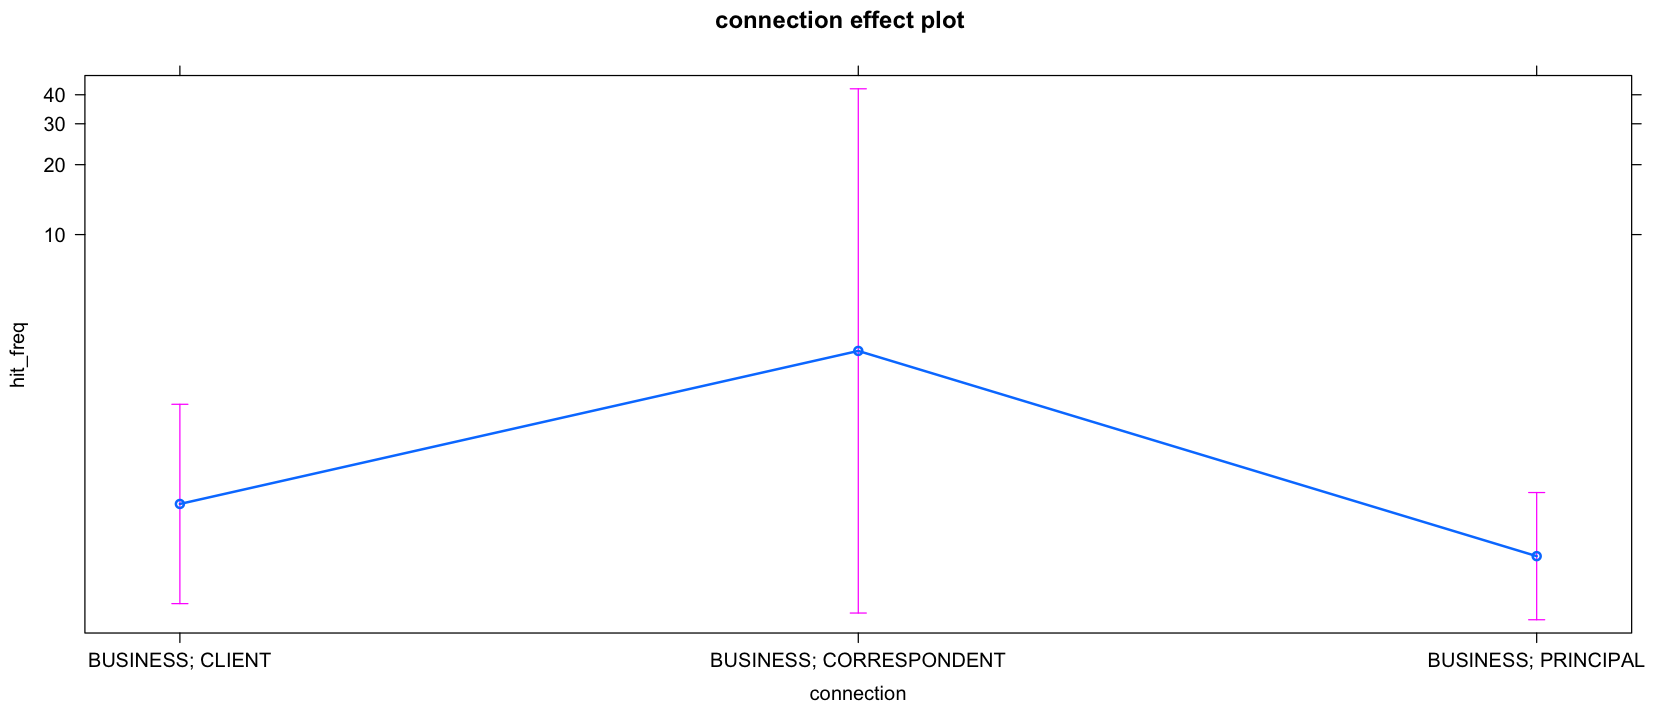

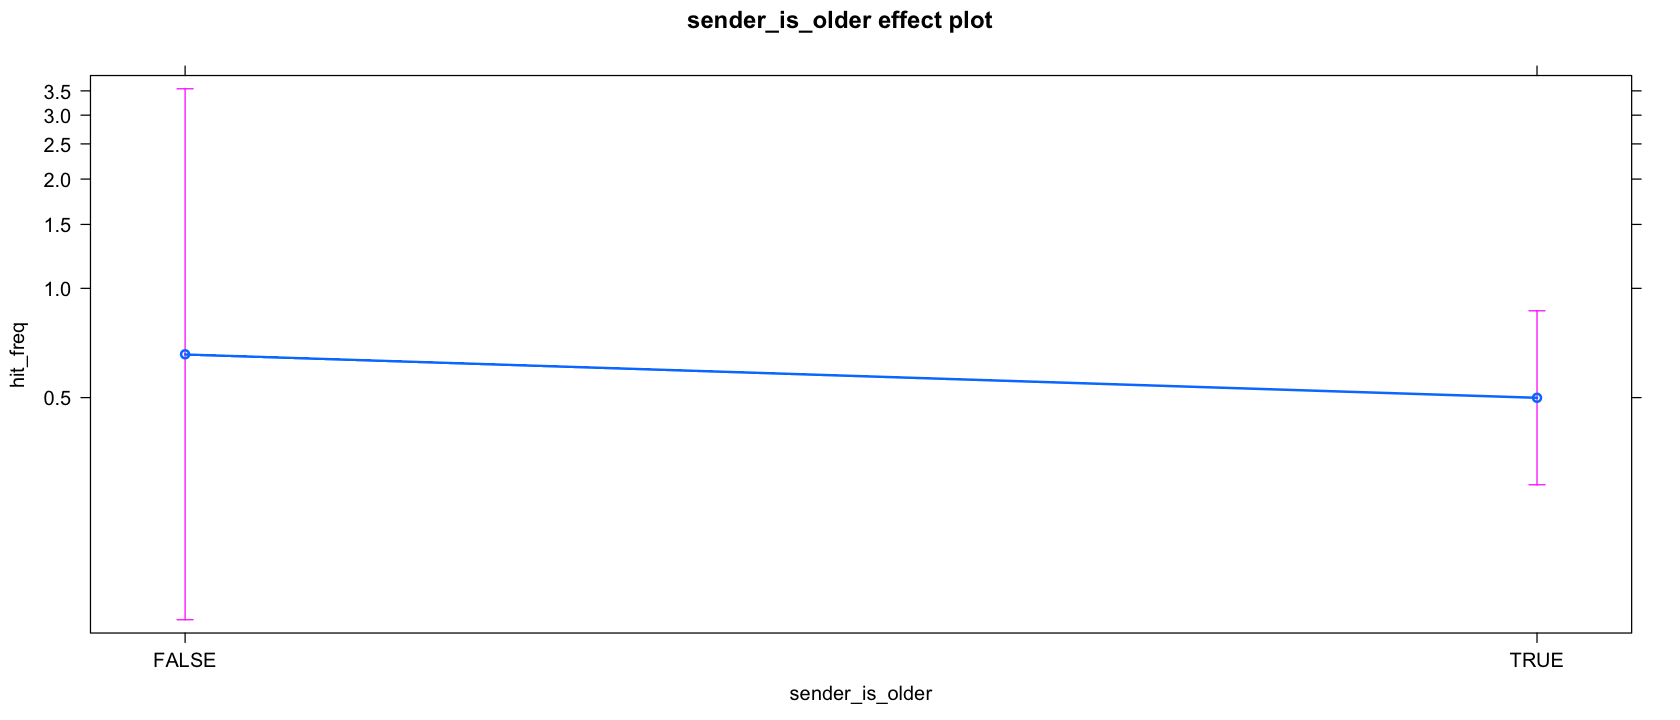

In [32]:
m_glmer4d <- glmer(hit_freq ~ connection + sender_is_older + (1|pair) + (1|quinquennial),
                  data=m_conn_old,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer4d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer4d)

"------------------------------drop1------------------------------"
drop1(m_glmer4d, test = "Chisq")

effect("connection", m_glmer4d)
effect("sender_is_older", m_glmer4d)

plot(effect("connection", m_glmer4d))
plot(effect("sender_is_older", m_glmer4d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"sender_is_older" is not a significant predictor. Models 5.3 and 5.4 are unreliable due to zero variance/standard deviation on the quinquennial random effect.

This model is a slightly worse fit and the variance and standard deviation of the quinquennial mixed effect is zero.

### 6.1 Generalised linear mixed-effects model using "connection" and "sender_over_40" as fixed effects, and "sender" as a random effect, negative binomial (BEST FIT)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_over_40 + (1 | sender)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   268.3    285.3   -128.2    256.3      119 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5468 -0.4631 -0.3878  4.1021 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.8028   0.896   
Number of obs: 125, groups:  sender, 12

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                       -0.42133    0.83677  -0.504    0.615
connectionBUSINESS; CORRESPONDENT  1.85913    1.29607   1.434    0.151
connectionBUSINESS; PRINCIPAL     -0.06769    0.77178  -0.088    0.930
sender_over_40TRUE                -0.27686    0.77287  -0.358    0.720

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSI

[1] "------------------------------dispersion------------------------------"

[1] 0.9678728

[1] "------------------------------drop1------------------------------"

Df AIC      LRT       Pr(Chi)  
<none>         NA 268.3167        NA        NA
connection      2 266.6497 2.3330417 0.3114486
sender_over_40  1 266.4416 0.1248915 0.7237887


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.5154340               3.3081332               0.4817002 


 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.6931608 0.5255297 

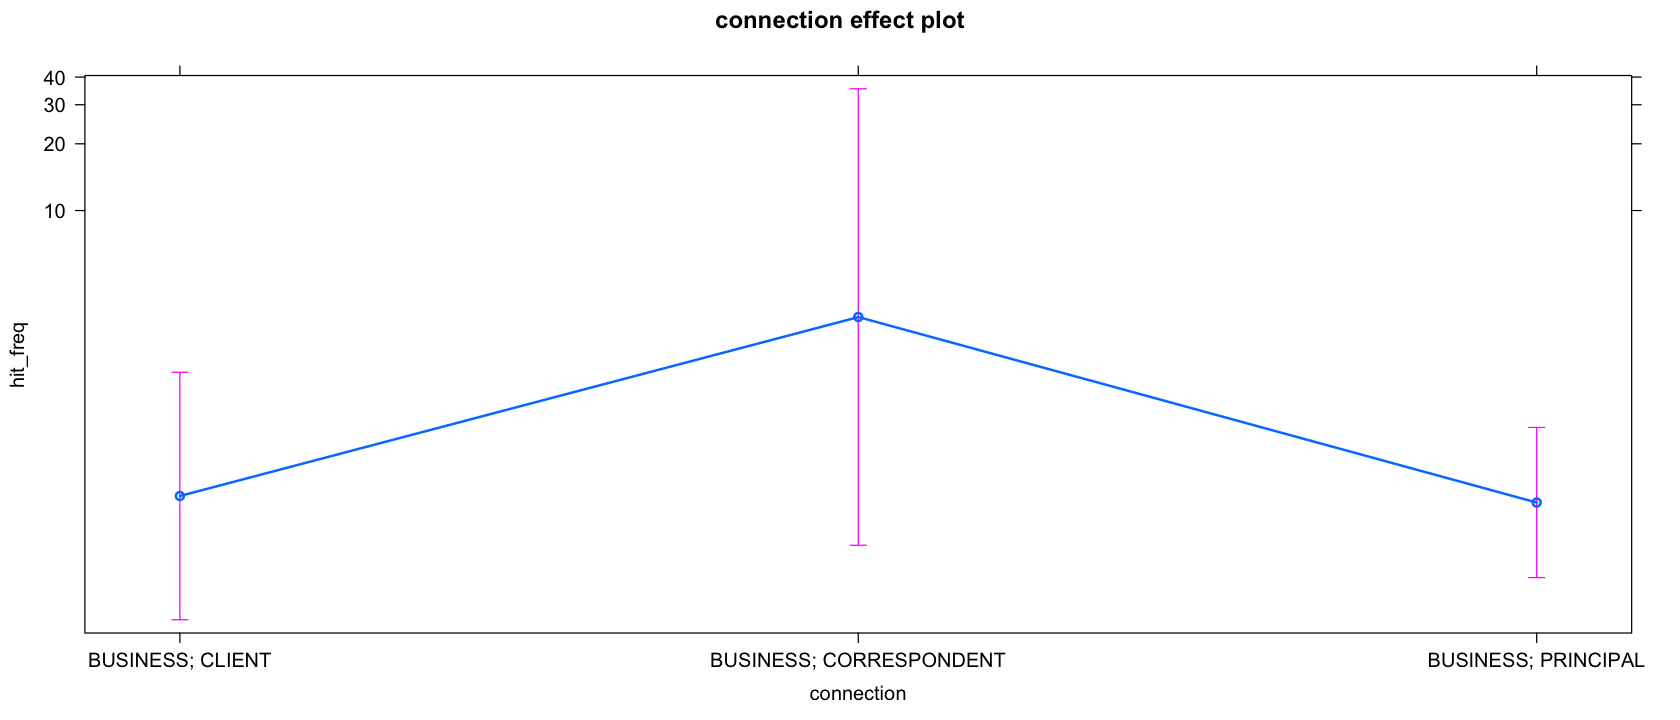

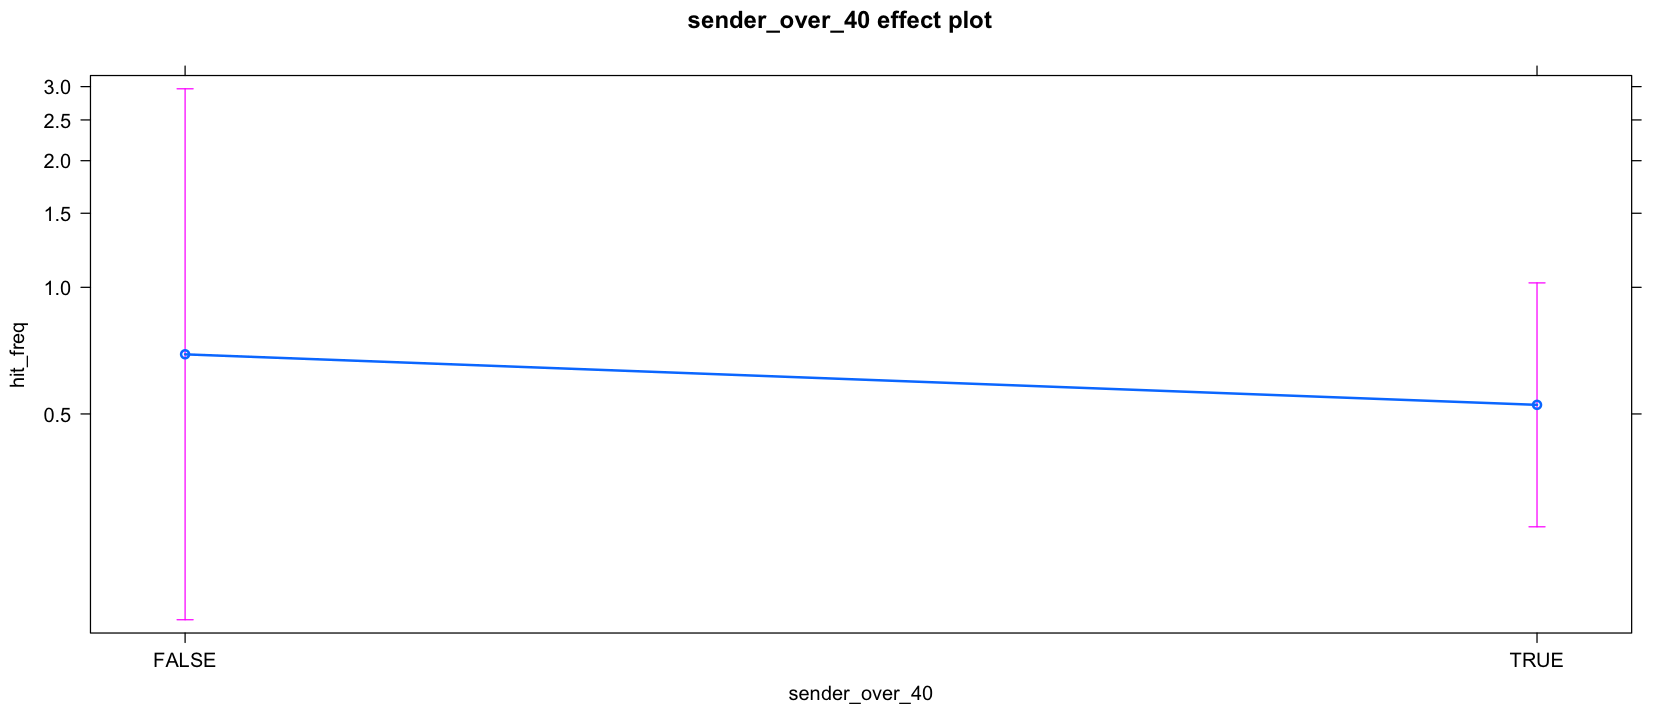

In [31]:
m_glmer5 <- glmer(hit_freq ~ connection + sender_over_40 + (1|sender),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5)

"------------------------------drop1------------------------------"
drop1(m_glmer5, test = "Chisq")

effect("connection", m_glmer5)
effect("sender_over_40", m_glmer5)

plot(effect("connection", m_glmer5))
plot(effect("sender_over_40", m_glmer5))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"sender_over_40" is not a significant predictor.

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_over_40 + (1 | pair)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   269.7    286.6   -128.8    257.7      119 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8990 -0.5479 -0.4417 -0.3769  4.1358 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.6919   0.8318  
Number of obs: 125, groups:  pair, 28

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -0.3838     0.8568  -0.448    0.654
connectionBUSINESS; CORRESPONDENT   1.8216     1.2660   1.439    0.150
connectionBUSINESS; PRINCIPAL      -0.3810     0.5729  -0.665    0.506
sender_over_40TRUE                 -0.2474     0.8698  -0.284    0.776

Correlation of Fixed Effects:
            (Intr) cBUSIC cBUSIP
cB

[1] "------------------------------dispersion------------------------------"

[1] 0.9619469

[1] "------------------------------drop1------------------------------"

Df AIC     LRT        Pr(Chi)  
<none>         NA 269.663         NA        NA
connection      2 268.865 3.20199317 0.2016954
sender_over_40  1 267.752 0.08898794 0.7654677


 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.5490588               3.3942861               0.3750875 


 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.5716485 0.4463718 

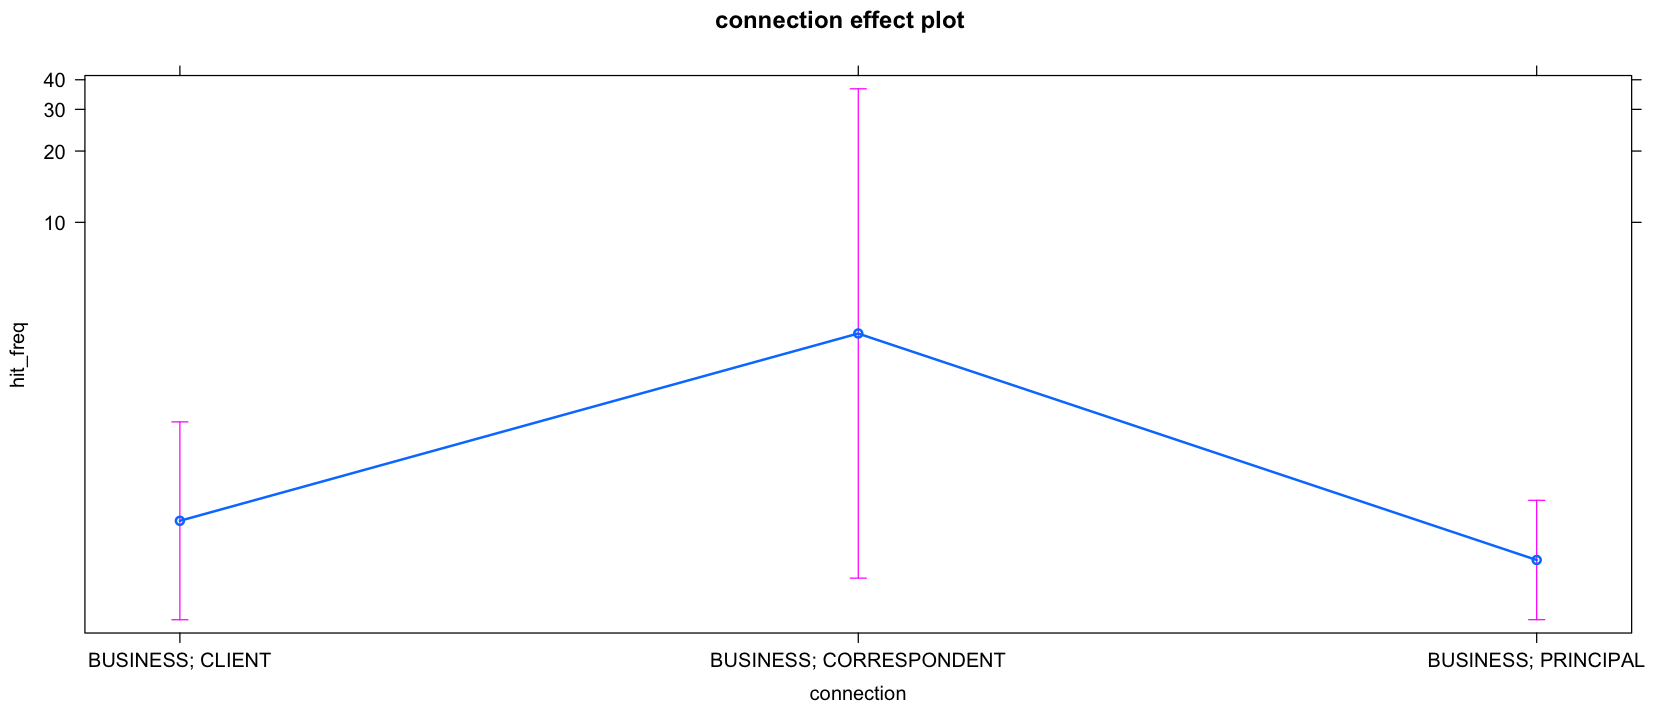

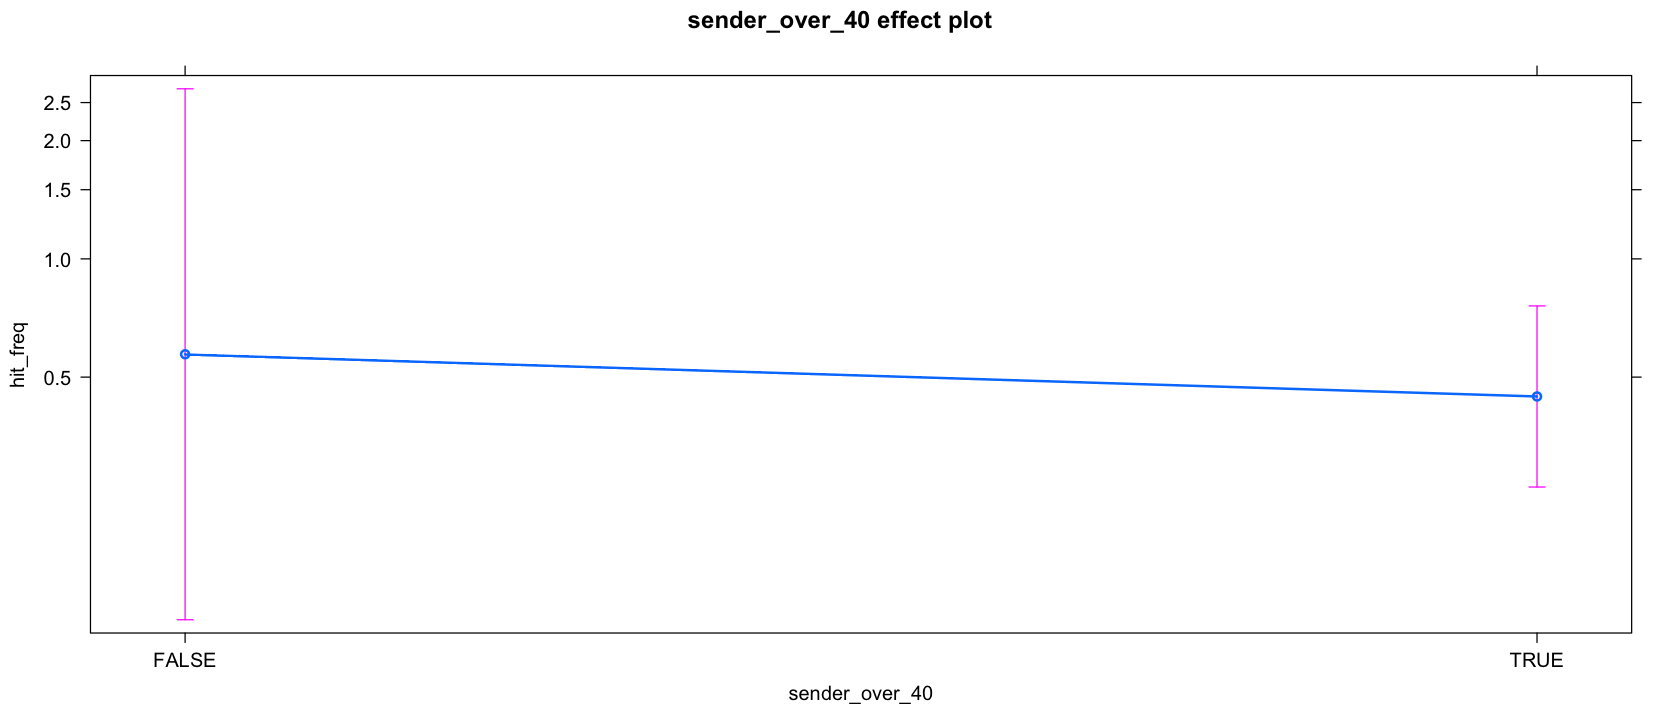

In [34]:
m_glmer5b <- glmer(hit_freq ~ connection + sender_over_40 + (1|pair),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5b)

"------------------------------drop1------------------------------"
drop1(m_glmer5b, test = "Chisq")

effect("connection", m_glmer5b)
effect("sender_over_40", m_glmer5b)

plot(effect("connection", m_glmer5b))
plot(effect("sender_over_40", m_glmer5b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 6.3 Generalised linear mixed-effects model using "sender_is_over_40" as a fixed effect and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + sender_over_40 + (1 | sender) + (1 |  
    quinquennial)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   270.3    290.1   -128.1    256.3      118 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9024 -0.5398 -0.4646 -0.3712  4.0281 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 0.80538  0.8974  
 quinquennial (Intercept) 0.02773  0.1665  
Number of obs: 125, groups:  sender, 12; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                       -0.39396    0.84318  -0.467    0.640
connectionBUSINESS; CORRESPONDENT  1.81486    1.29836   1.398    0.162
connectionBUSINESS; PRINCIPAL     -0.09325    0.77412  -0.120    0.904
sender_over_40TRUE               

[1] "------------------------------dispersion------------------------------"

[1] 0.9652778

[1] "------------------------------drop1------------------------------"

Df AIC      LRT       Pr(Chi)  
<none>         NA 270.2585        NA        NA
connection      2 268.5381 2.2796358 0.3198773
sender_over_40  1 268.3909 0.1324894 0.7158648


 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.6975287 0.5226524 

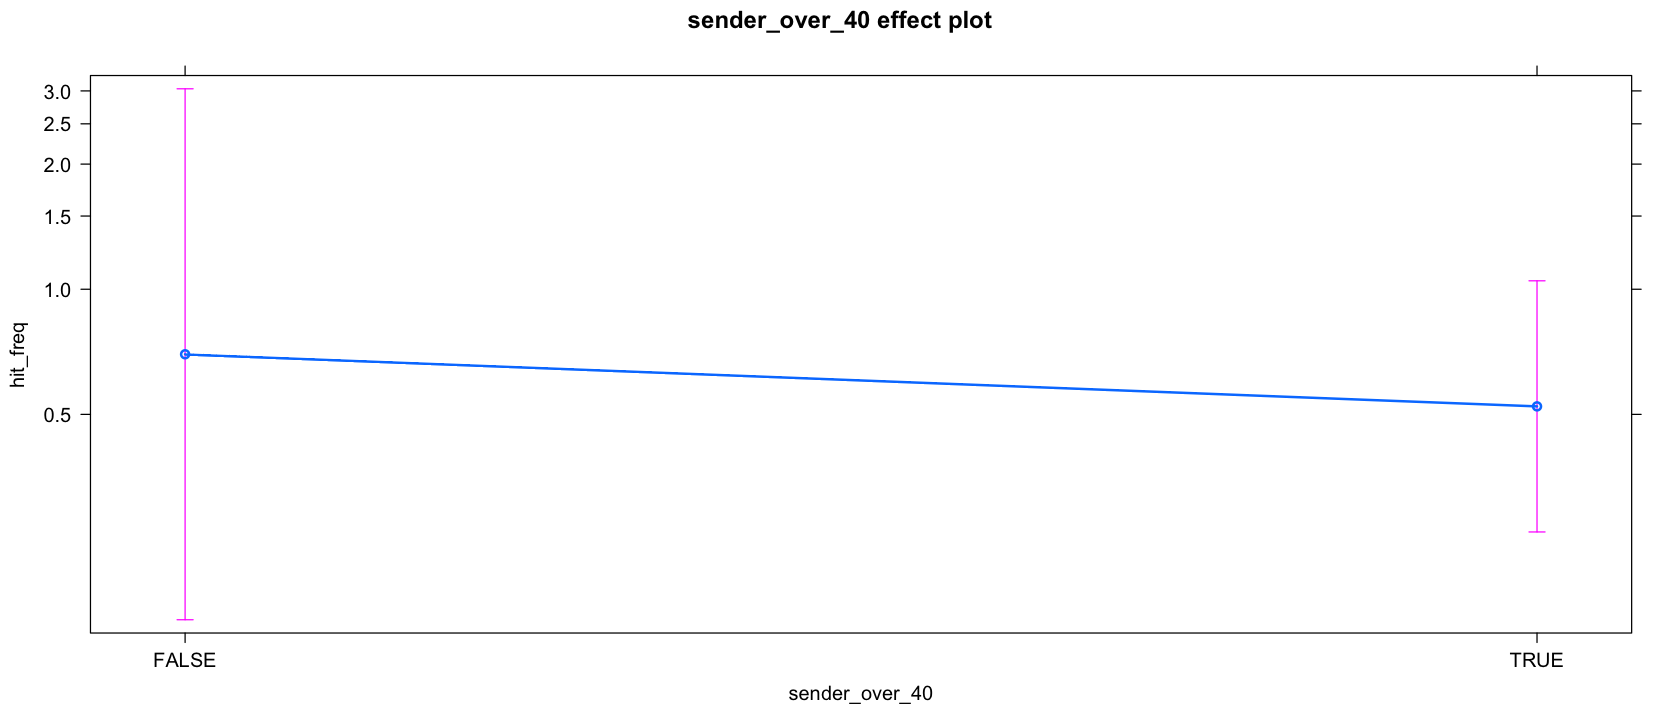

In [35]:
m_glmer5c <- glmer(hit_freq ~ connection + sender_over_40 + (1|sender) + (1|quinquennial),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5c)

"------------------------------drop1------------------------------"
drop1(m_glmer5c, test = "Chisq")

effect("sender_over_40", m_glmer5c)

plot(effect("sender_over_40", m_glmer5c))

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: 
hit_freq ~ connection + sender_over_40 + (1 | pair) + (1 | quinquennial)
   Data: m_conn_se40

     AIC      BIC   logLik deviance df.resid 
   278.6    298.5   -132.3    264.6      120 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8997 -0.5579 -0.4782 -0.1857  3.8982 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 0.5240   0.7239  
 quinquennial (Intercept) 0.2374   0.4872  
Number of obs: 127, groups:  pair, 29; quinquennial, 4

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)                       -2.25048    1.15124  -1.955   0.0506 .
connectionBUSINESS; CORRESPONDENT  3.39414    1.39856   2.427   0.0152 *
connectionBUSINESS; PRINCIPAL     -0.05804    0.57606  -0.101   0.9198  
sender_over_40TRUE                

[1] "------------------------------dispersion------------------------------"

[1] 0.9510557

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)   
<none>         NA 278.6284       NA         NA
connection      2 282.5938 7.965453 0.01863476
sender_over_40  1 280.2292 3.600834 0.05775059


 sender_over_40 effect
sender_over_40
    FALSE      TRUE 
0.1215136 0.6191858 

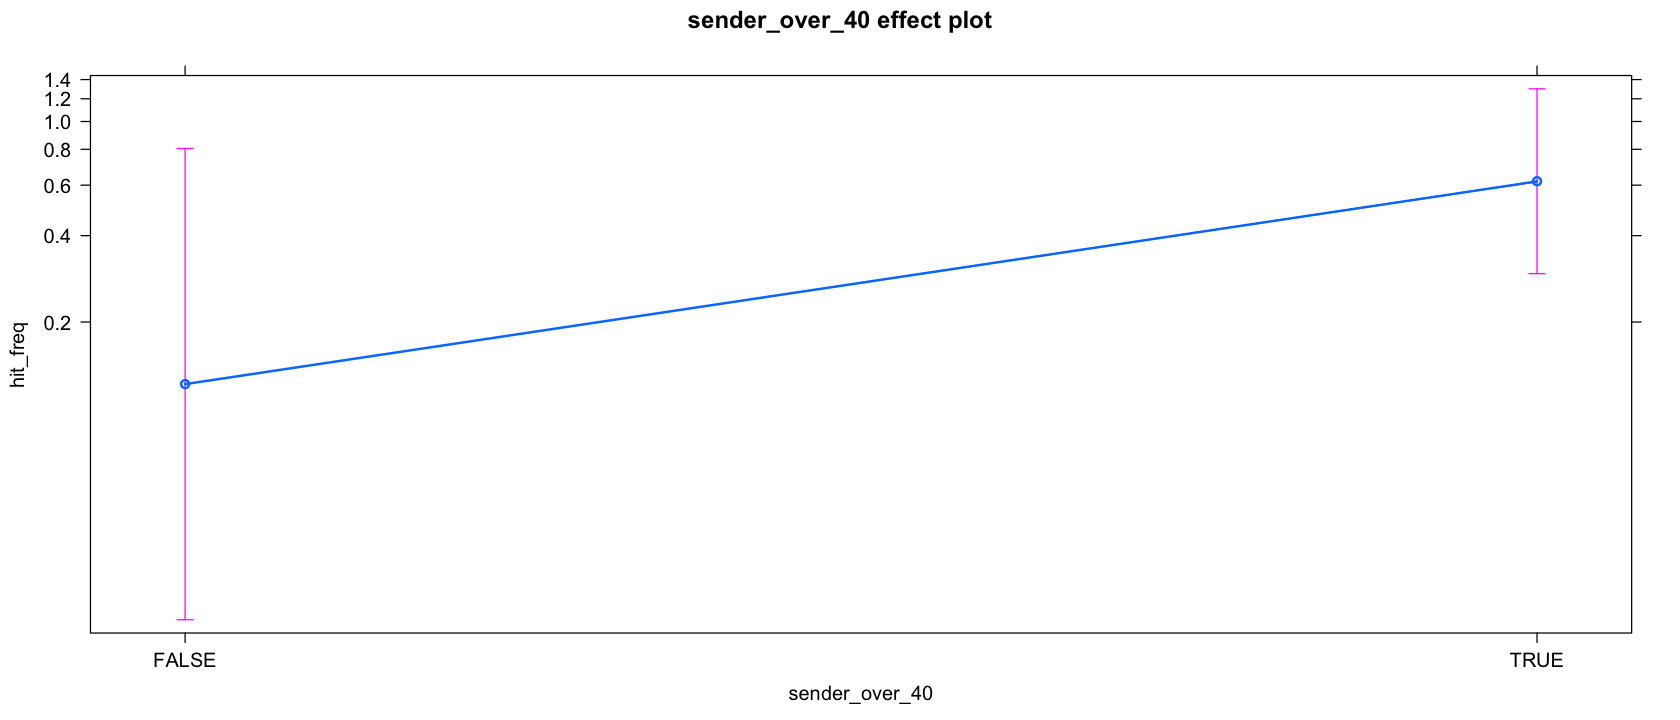

In [48]:
m_glmer5d <- glmer(hit_freq ~ connection + sender_over_40 + (1|pair) + (1|quinquennial),
                  data=m_conn_se40,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer5d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer5d)

"------------------------------drop1------------------------------"
drop1(m_glmer5d, test = "Chisq")

effect("sender_over_40", m_glmer5d)

plot(effect("sender_over_40", m_glmer5d))

"sender_is_over_40" is not a significant predictor. "BUSINESS; CONNECTION" becomes a significant variable in this model, with a much higher effect rating than the remaining connections. Models 6.1 and 6.2 are almost tied in fit. 

### 6.1 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "sender" as a random effect, negative binomial (BEST FIT)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | sender)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   763.8    796.6   -372.9    745.8      275 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5944 -0.4839  0.2386  3.8802 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.7002   0.8368  
Number of obs: 284, groups:  sender, 30

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.47250    0.34007  -1.389  0.16471   
connectionBUSINESS; CLIENT        -0.06908    0.49279  -0.140  0.88852   
connectionBUSINESS; CORRESPONDENT  1.95275    0.68532   2.849  0.00438 **
connectionBUSINESS; PRINCIPAL     -0.01709    0.46493  -0.037  0.97069   
connectionFAMILY                   2.65855

[1] "------------------------------dispersion------------------------------"

[1] 1.026593

[1] "------------------------------drop1------------------------------"

Df AIC      LRT          Pr(Chi)     
<none>            NA 763.7667           NA           NA
connection         5 777.7161 23.949376615 0.0002220304
addressee_over_40  1 761.7736  0.006878823 0.9339003043


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6228639               0.5812900               4.3899932 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6123123               8.8917760              10.2545156 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.7547255 0.6914819 

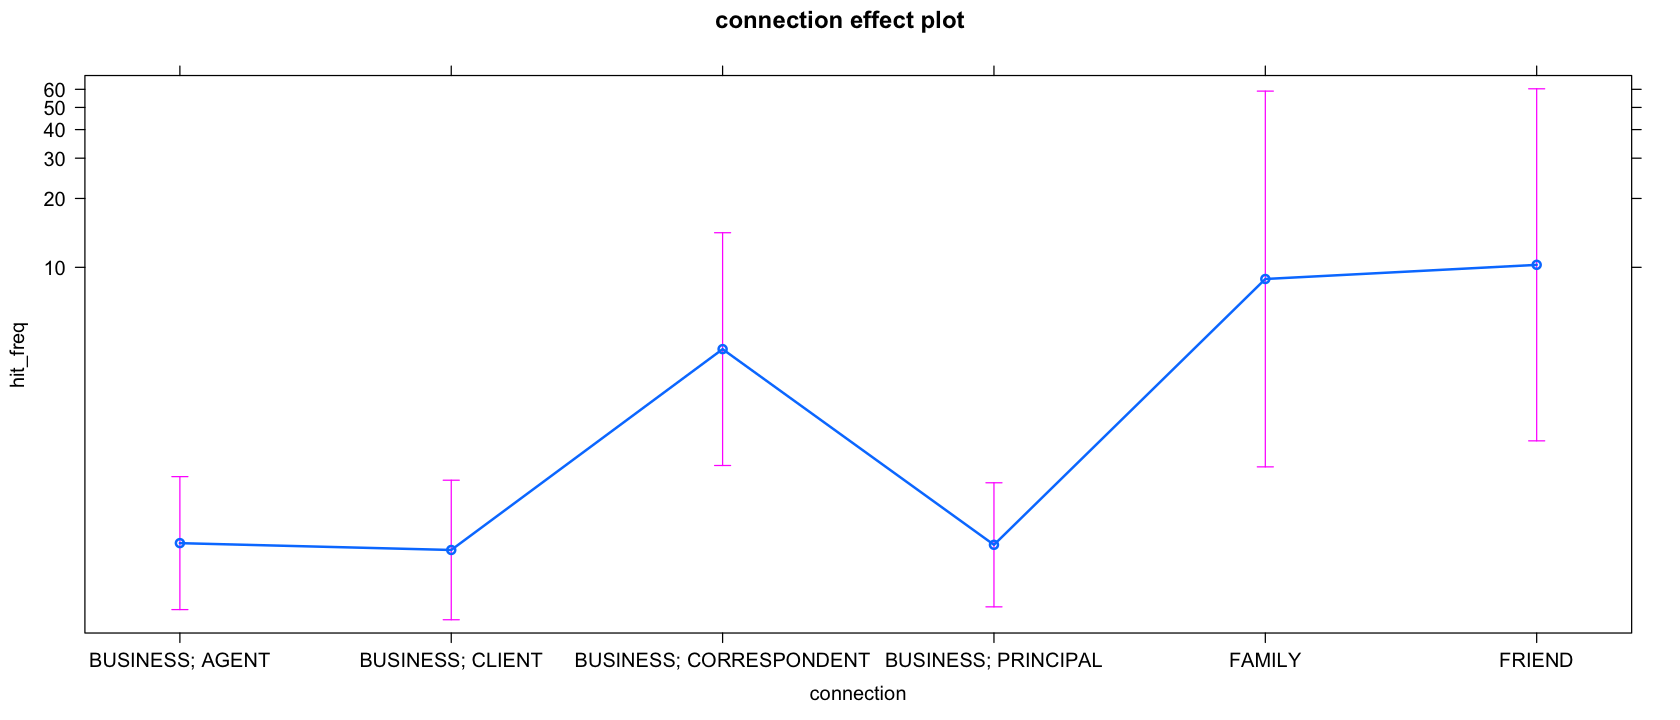

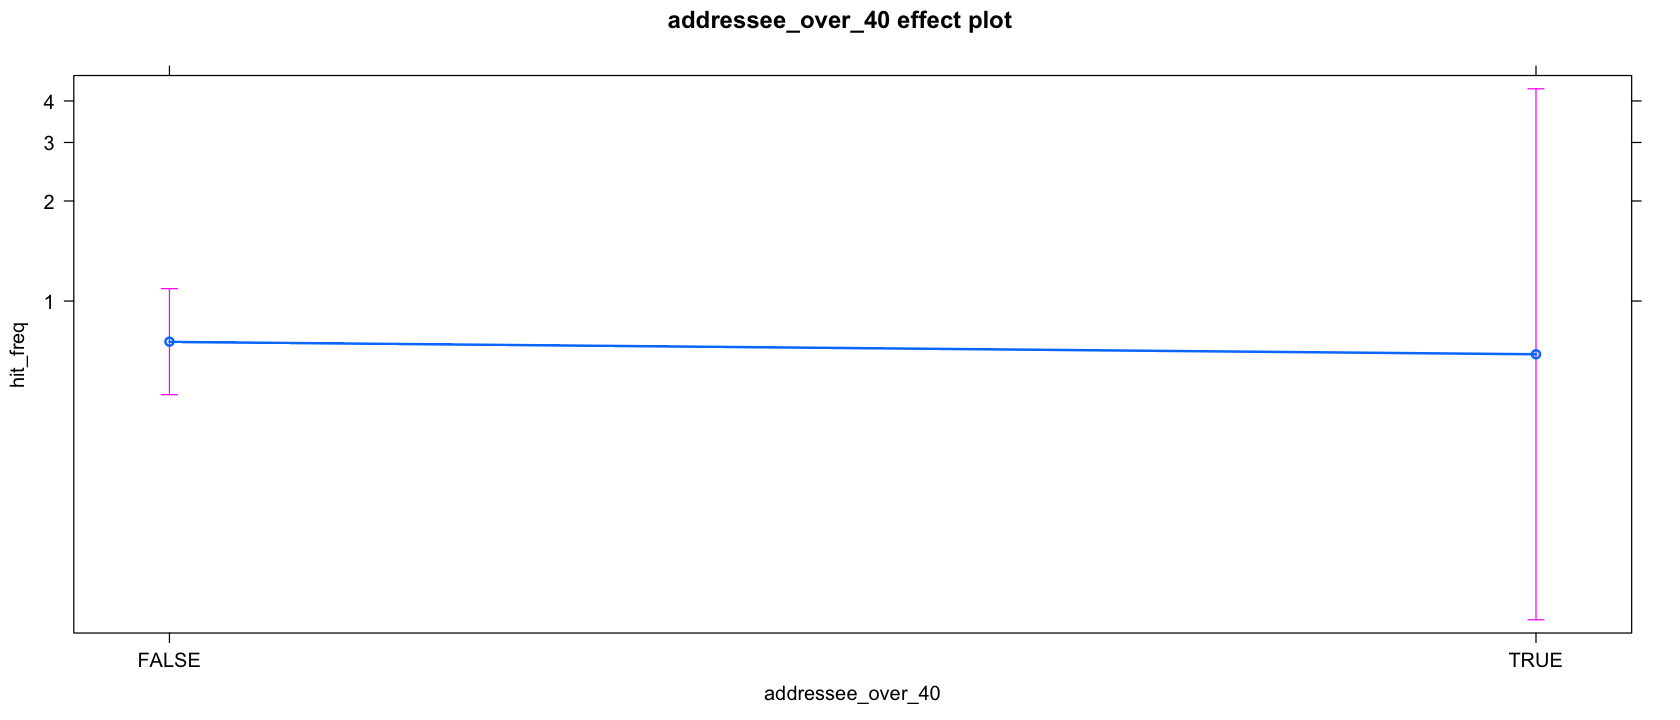

In [30]:
m_glmer6 <- glmer(hit_freq ~ connection + addressee_over_40 + (1|sender),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6)

"------------------------------drop1------------------------------"
drop1(m_glmer6, test = "Chisq")

effect("connection", m_glmer6)
effect("addressee_over_40", m_glmer6)

plot(effect("connection", m_glmer6))
plot(effect("addressee_over_40", m_glmer6))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

"addressee_over_40" is not a significant predictor.

### 6.2 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | sender) + (1 |  
    quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   765.8    802.3   -372.9    745.8      274 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5944 -0.4839  0.2386  3.8801 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 0.7002   0.8368  
 quinquennial (Intercept) 0.0000   0.0000  
Number of obs: 284, groups:  sender, 30; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.47249    0.34008  -1.389  0.16472   
connectionBUSINESS; CLIENT        -0.06909    0.49279  -0.140  0.88850   
connectionBUSINESS; CORRESPONDENT  1.95277    0.68533   2.849  0.00438 **
connectionBUSINE

[1] "------------------------------dispersion------------------------------"

[1] 1.026593

[1] "------------------------------drop1------------------------------"

Df AIC      LRT          Pr(Chi)     
<none>            NA 765.7664           NA           NA
connection         5 779.7161 23.949707915 0.0002219979
addressee_over_40  1 763.7733  0.006881635 0.9338868256


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6228643               0.5812843               4.3900569 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6123168               8.8916921              10.2544189 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.7547332 0.6908722 

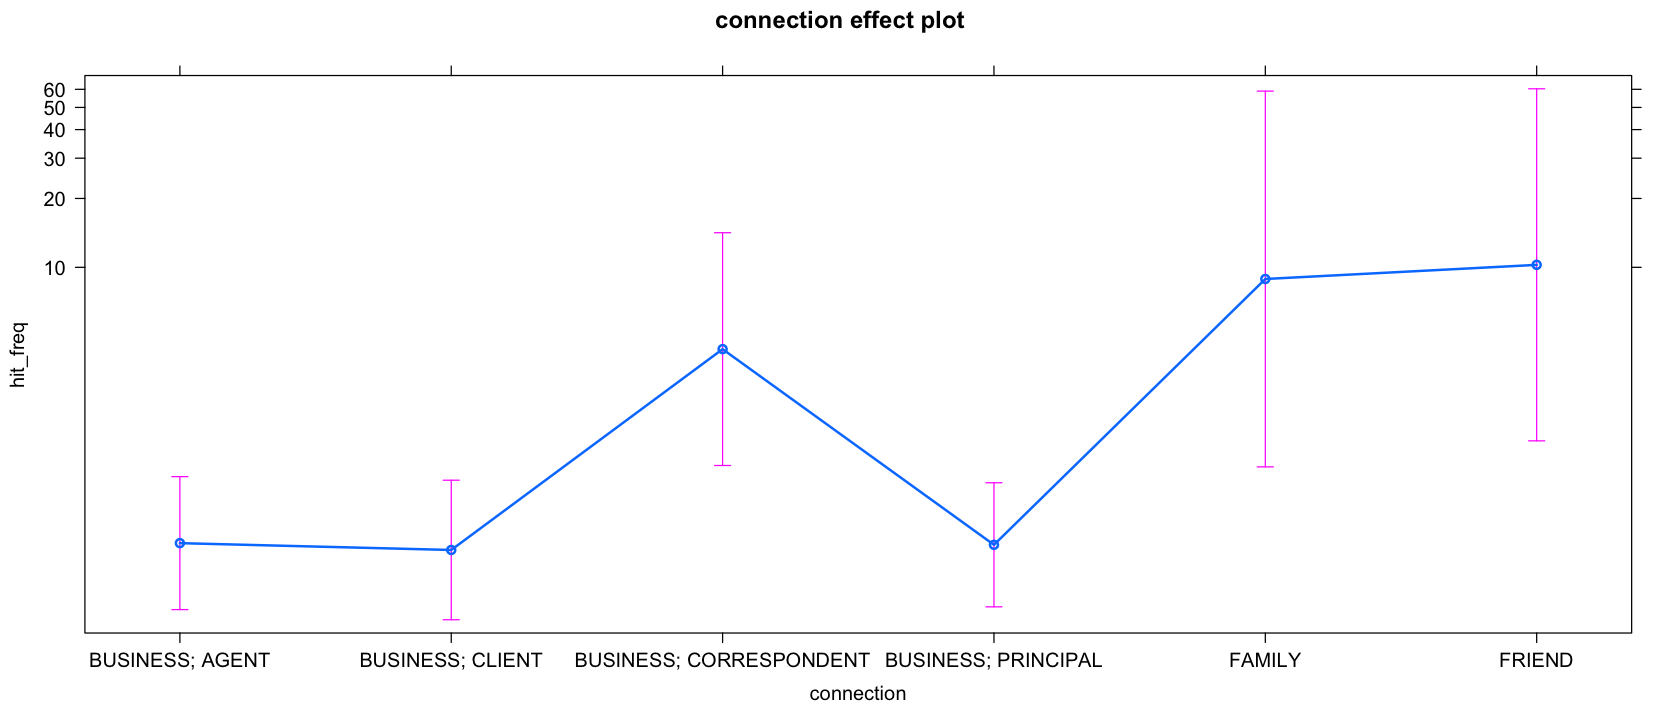

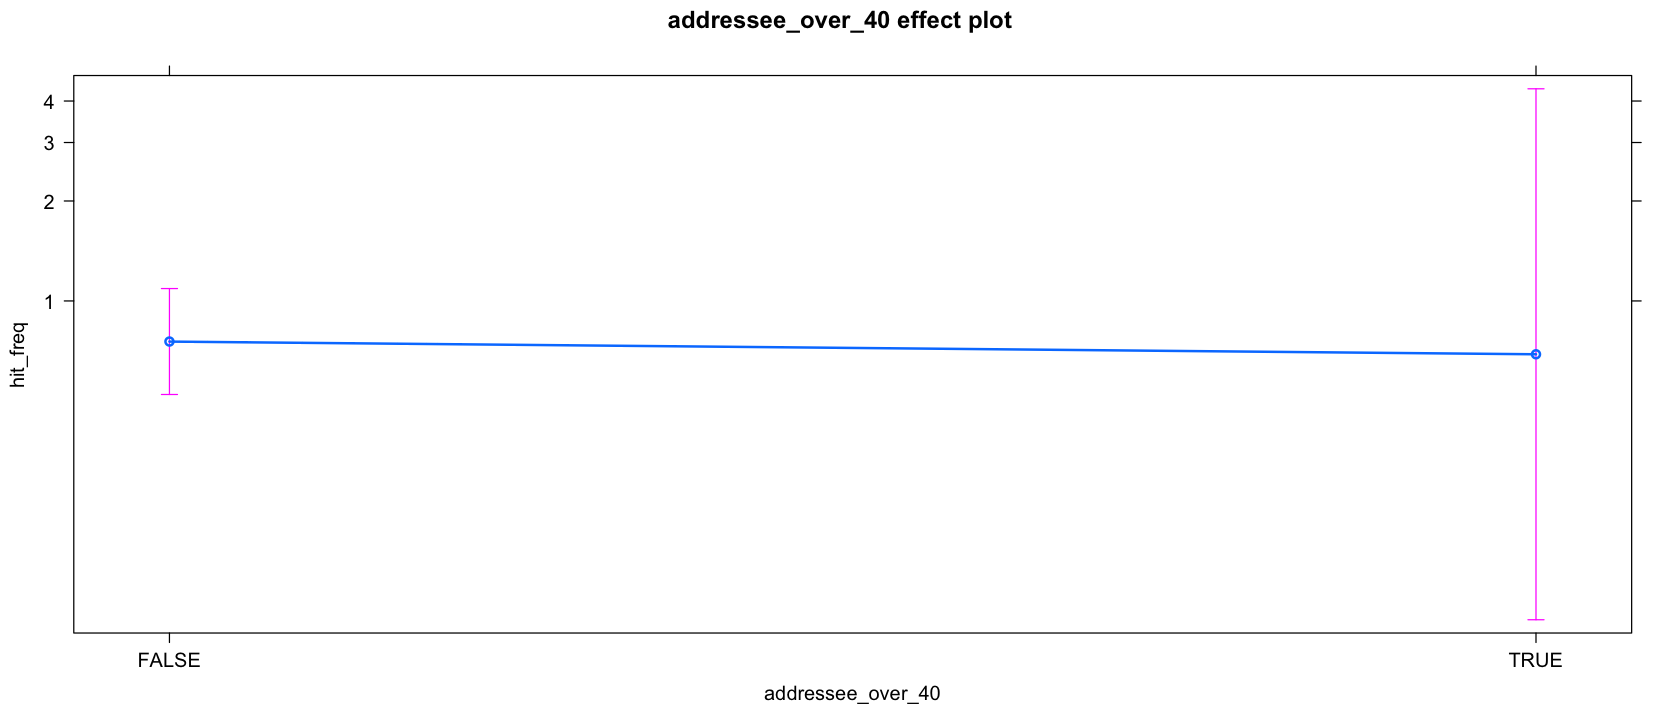

In [37]:
m_glmer6b <- glmer(hit_freq ~ connection + addressee_over_40 + (1|sender) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6b)

"------------------------------drop1------------------------------"
drop1(m_glmer6b, test = "Chisq")

effect("connection", m_glmer6b)
effect("addressee_over_40", m_glmer6b)

plot(effect("connection", m_glmer6b))
plot(effect("addressee_over_40", m_glmer6b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 6.3 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "pair" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | pair)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   770.5    803.3   -376.3    752.5      275 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5614 -0.4765  0.2494  3.6928 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.7953   0.8918  
Number of obs: 284, groups:  pair, 69

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -0.5462     0.2990  -1.826  0.06778 . 
connectionBUSINESS; CLIENT         -0.1261     0.4320  -0.292  0.77042   
connectionBUSINESS; CORRESPONDENT   2.3746     0.7869   3.018  0.00255 **
connectionBUSINESS; PRINCIPAL      -0.1373     0.3932  -0.349  0.72705   
connectionFAMILY                    2.4471    

[1] "------------------------------dispersion------------------------------"

[1] 1.014517

[1] "------------------------------drop1------------------------------"

Df AIC      LRT         Pr(Chi)     
<none>            NA 770.5034          NA           NA
connection         5 783.4127 22.90928892 0.0003513142
addressee_over_40  1 768.5137  0.01030187 0.9191550244


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5797142               0.5110469               6.2297065 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5053651               6.6983455              10.2739467 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.6685639 0.7327670 

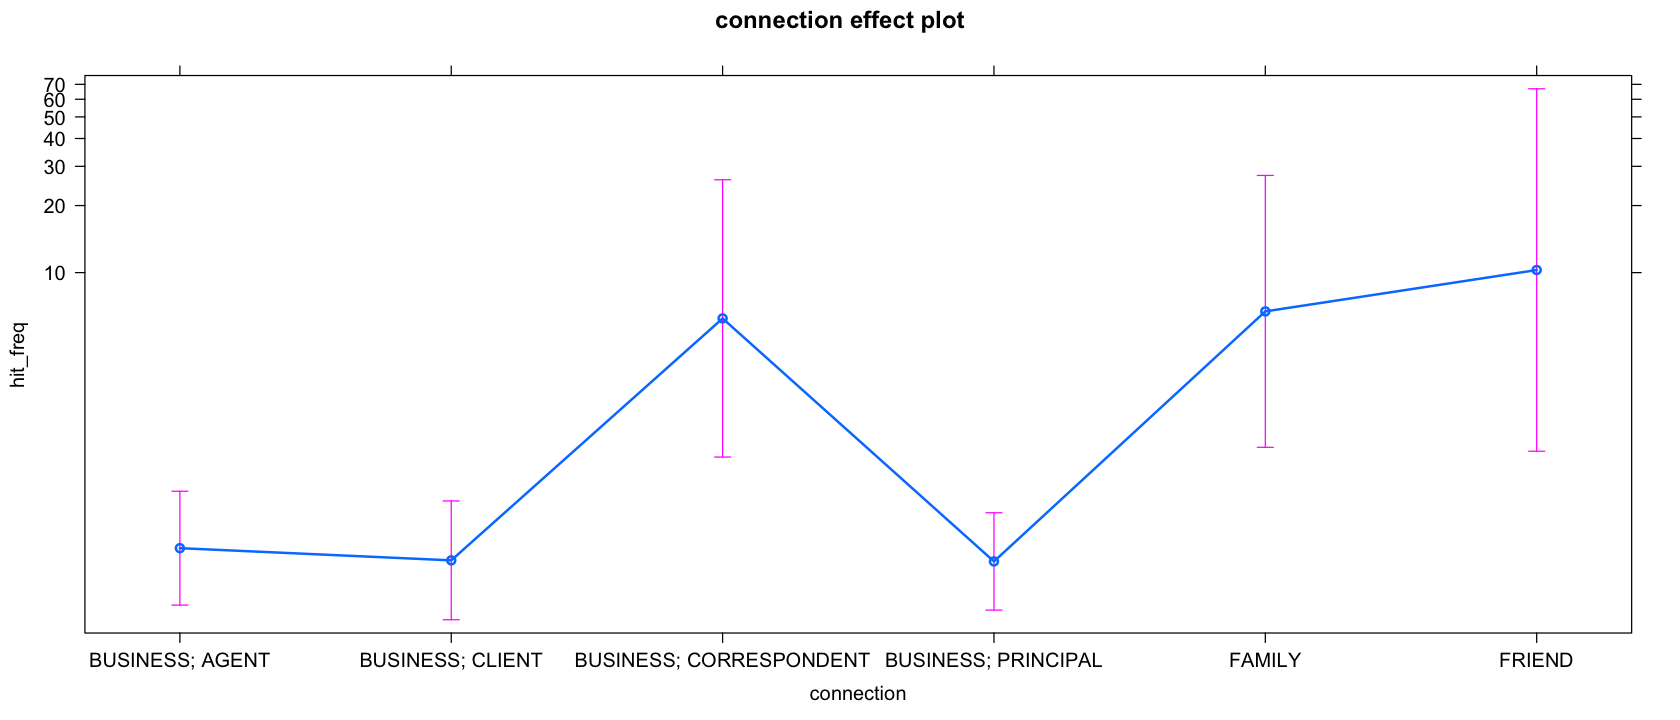

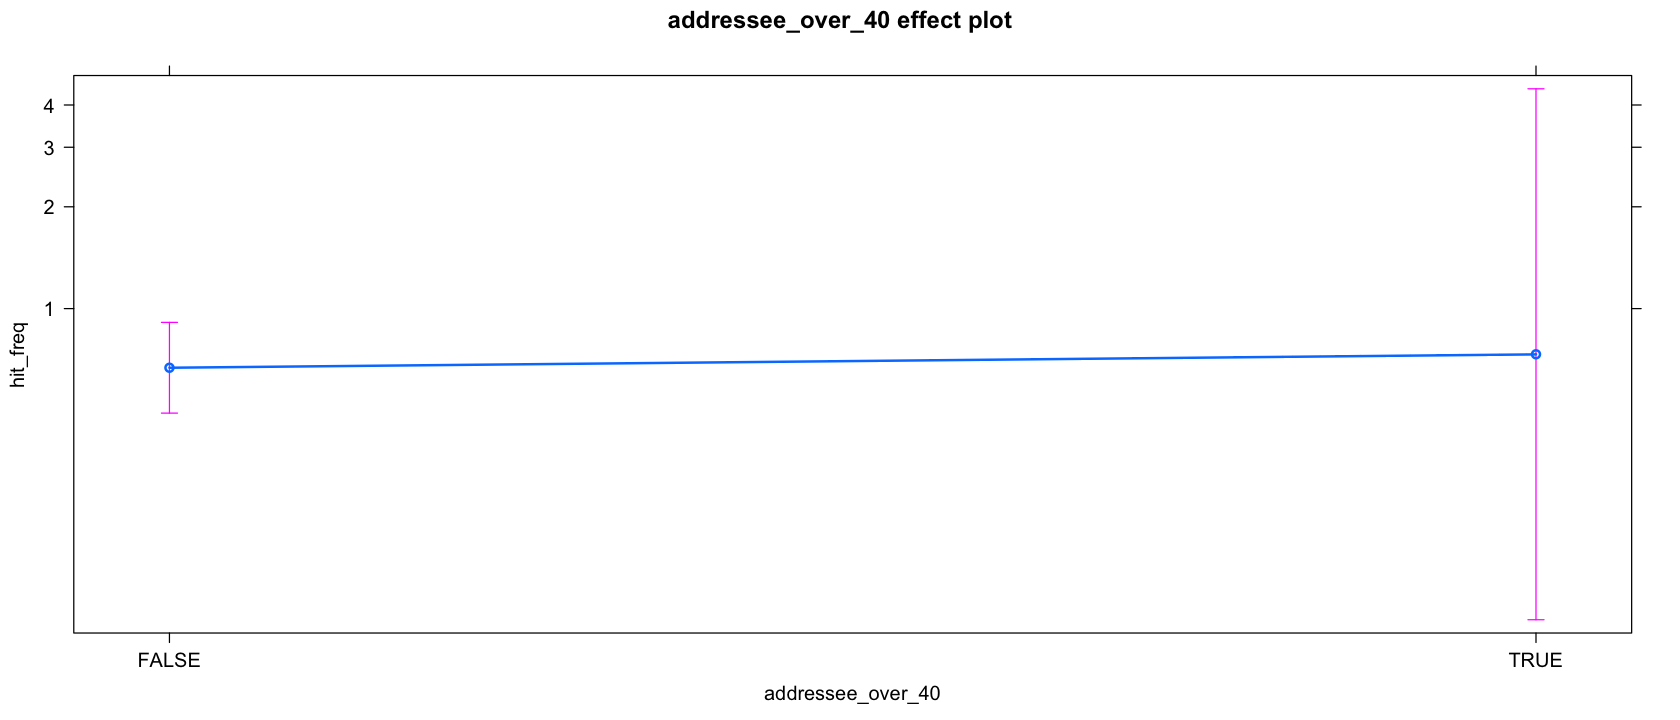

In [38]:
m_glmer6c <- glmer(hit_freq ~ connection + addressee_over_40 + (1|pair),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6c)

"------------------------------drop1------------------------------"
drop1(m_glmer6c, test = "Chisq")

effect("connection", m_glmer6c)
effect("addressee_over_40", m_glmer6c)

plot(effect("connection", m_glmer6c))
plot(effect("addressee_over_40", m_glmer6c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

### 6.4 Generalised linear mixed-effects model using "connection" and "addressee_over_40" as fixed effects, and "pair" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + addressee_over_40 + (1 | pair) + (1 |  
    quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   772.5    809.0   -376.3    752.5      274 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5614 -0.4765  0.2494  3.6928 

Random effects:
 Groups       Name        Variance Std.Dev.
 pair         (Intercept) 0.7953   0.8918  
 quinquennial (Intercept) 0.0000   0.0000  
Number of obs: 284, groups:  pair, 69; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.54619    0.29904  -1.826  0.06777 . 
connectionBUSINESS; CLIENT        -0.12608    0.43201  -0.292  0.77041   
connectionBUSINESS; CORRESPONDENT  2.37455    0.78687   3.018  0.00255 **
connectionBUSINESS; 

[1] "------------------------------dispersion------------------------------"

[1] 1.014518

[1] "------------------------------drop1------------------------------"

Df AIC      LRT         Pr(Chi)     
<none>            NA 772.5033          NA           NA
connection         5 785.4124 22.90912056 0.0003513403
addressee_over_40  1 770.5136  0.01026435 0.9193018927


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5797130               0.5110439               6.2296856 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5053731               6.6983554              10.2739200 


 addressee_over_40 effect
addressee_over_40
    FALSE      TRUE 
0.6685684 0.7325917 

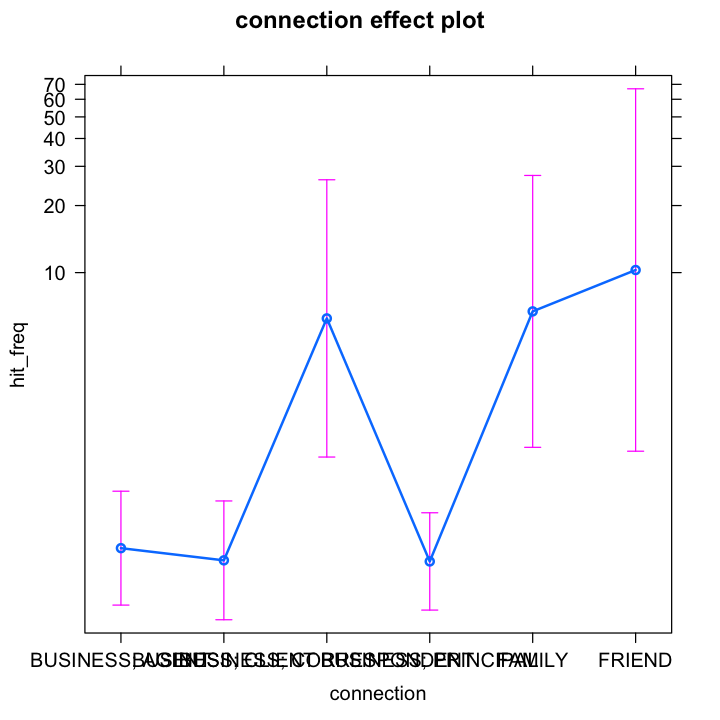

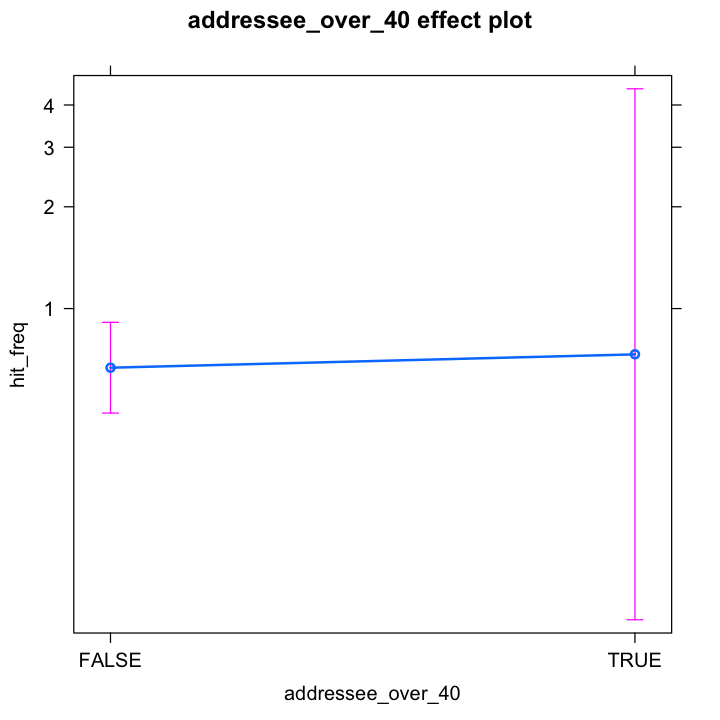

In [29]:
m_glmer6d <- glmer(hit_freq ~ connection + addressee_over_40 + (1|pair) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer6d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer6d)

"------------------------------drop1------------------------------"
drop1(m_glmer6d, test = "Chisq")

effect("connection", m_glmer6d)
effect("addressee_over_40", m_glmer6d)

plot(effect("connection", m_glmer6d))
plot(effect("addressee_over_40", m_glmer6d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The model using only "sender" as a random effect is the best fit. "addressee_over_40" is not a significant predictor. There were no "MULT or "UNK" values left in the filtered model, so full range was used, and the model shows that "BUSINESS; CORRESPONDENT", "FAMILY", and "FRIEND" are significant variables.

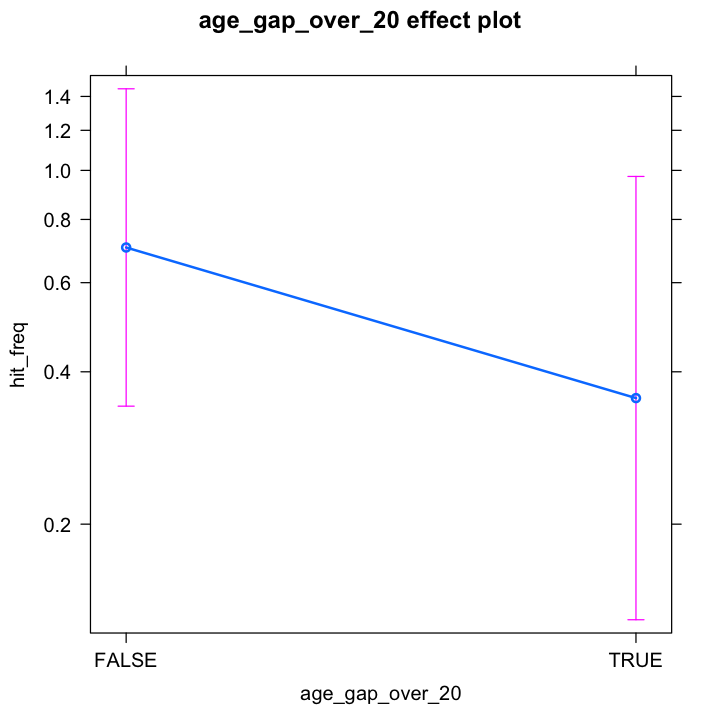

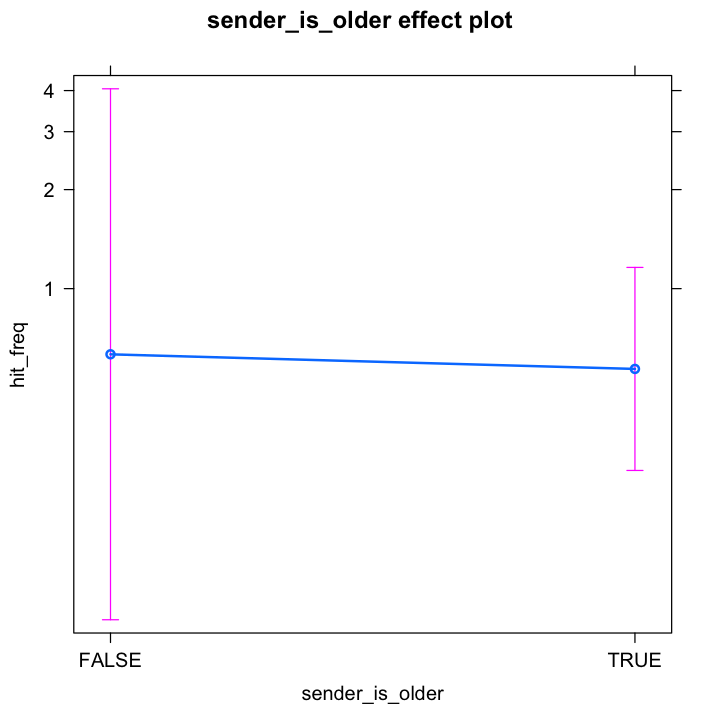

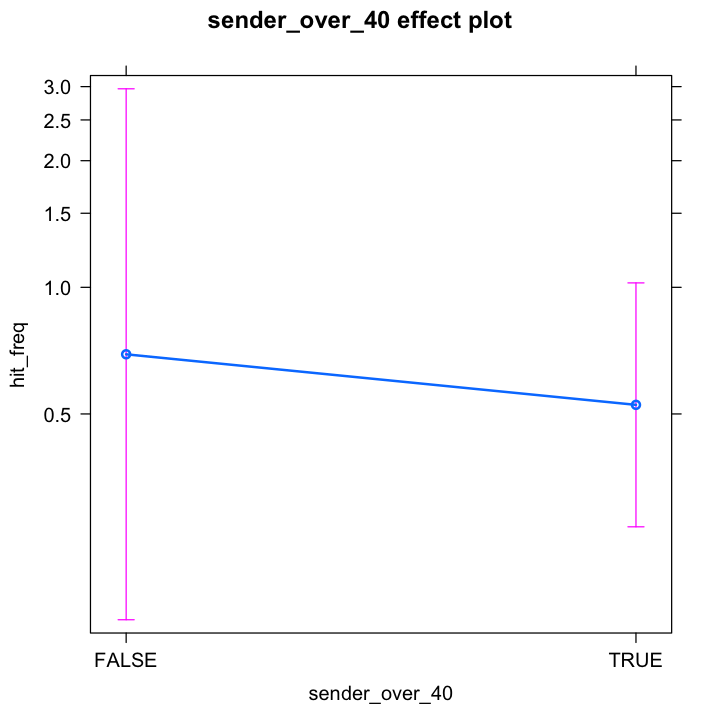

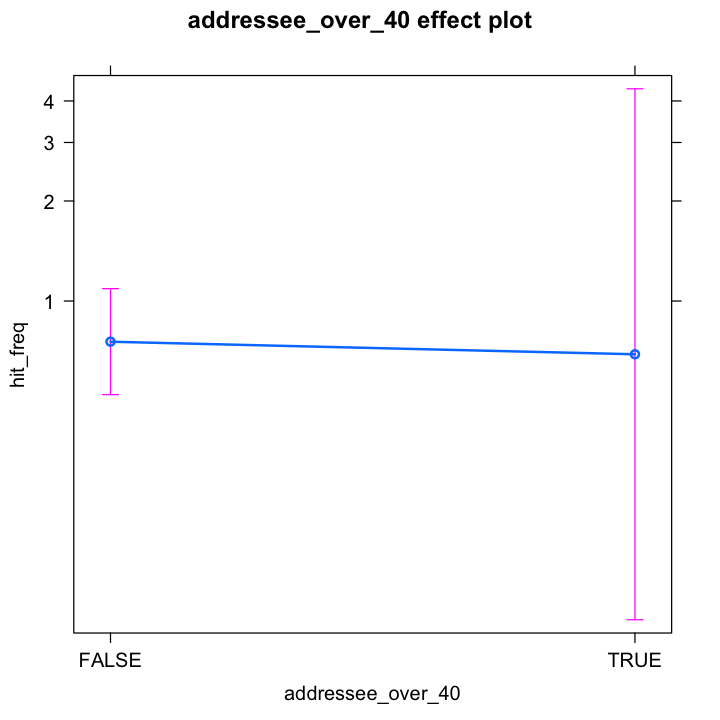

In [35]:
plot(effect("age_gap_over_20", m_glmer3))
plot(effect("sender_is_older", m_glmer4))
plot(effect("sender_over_40", m_glmer5))
plot(effect("addressee_over_40", m_glmer6))











par(cex.axis = 0.8)

options(repr.plot.width = 6, repr.plot.height = 6)

### 7.1 Generalised linear model using "connection" and "gender_pair" as fixed effects, and "sender" as a random effect

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + gender_pair + (1 | sender)
   Data: m_conn_gender

     AIC      BIC   logLik deviance df.resid 
   664.5    702.4   -321.3    642.5      220 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.6128 -0.4727  0.2656  3.6521 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.7583   0.8708  
Number of obs: 231, groups:  sender, 29

Fixed effects:
                                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        -16.99161 2686.19255  -0.006  0.99495   
connectionBUSINESS; CLIENT           0.14244    0.53805   0.265  0.79121   
connectionBUSINESS; CORRESPONDENT    1.90045    0.72833   2.609  0.00907 **
connectionBUSINESS; PRINCIPAL       -0.07821    0.49203  -0.159  0.87371   
connectionFAMILY                     2

[1] "------------------------------dispersion------------------------------"

[1] 1.03149

[1] "------------------------------drop1------------------------------"

Df AIC      LRT       Pr(Chi)    
<none>      NA 664.5379        NA          NA
connection   5 672.0989 17.561000 0.003550031
gender_pair  3 660.1992  1.661285 0.645575027


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.5900831               0.6804165               3.9470126 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5456937               7.5832523               9.8723373 


 gender_pair effect
gender_pair
FEMALE-FEMALE   FEMALE-MALE   MALE-FEMALE     MALE-MALE 
 5.435084e-08  7.933577e-01  1.037130e+00  7.986881e-01 

ERROR: Error in grid::grid.pretty(range.labels): infinite axis extents [GEPretty(2.22045e-16,inf,5)]


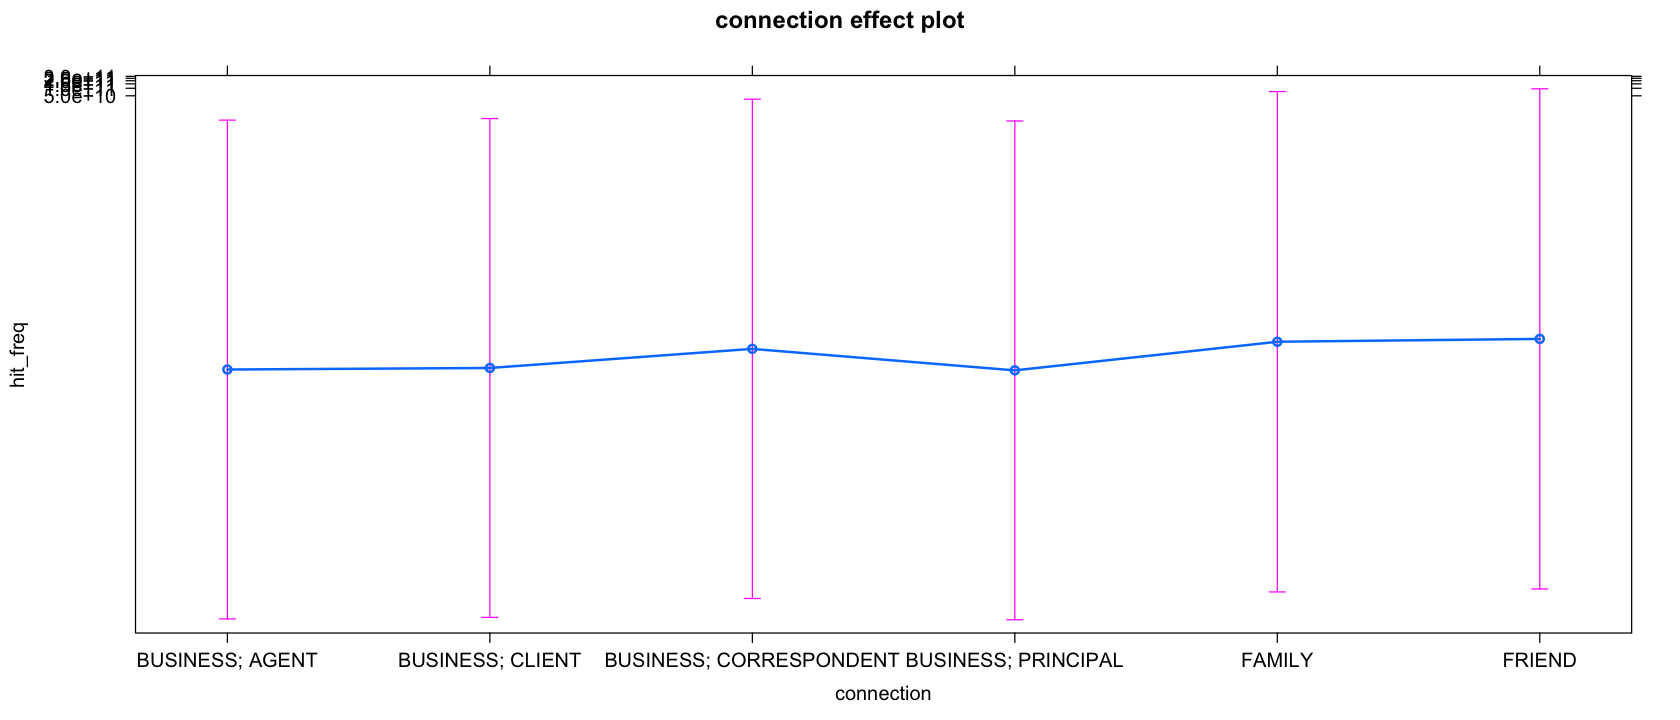

In [40]:
m_glmer7 <- glmer(hit_freq ~ connection + gender_pair + (1|sender),
                  data=m_conn_gender,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7)

"------------------------------drop1------------------------------"
drop1(m_glmer7, test = "Chisq")

effect("connection", m_glmer7)
effect("gender_pair", m_glmer7)

plot(effect("connection", m_glmer7))
plot(effect("gender_pair", m_glmer7))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The model is too complex for the little amount of data.

### 7.2 Generalised linear model using "connection" as a fixed effect, and "gender_pair" and "sender" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + (1 | gender_pair) + (1 | sender)
   Data: m_conn_gender

     AIC      BIC   logLik deviance df.resid 
   662.2    693.2   -322.1    644.2      222 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.6208 -0.4828  0.2589  3.6395 

Random effects:
 Groups      Name        Variance Std.Dev.
 sender      (Intercept) 0.7385   0.8593  
 gender_pair (Intercept) 0.0000   0.0000  
Number of obs: 231, groups:  sender, 29; gender_pair, 4

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.45377    0.35033  -1.295  0.19523   
connectionBUSINESS; CLIENT         0.07942    0.52137   0.152  0.87892   
connectionBUSINESS; CORRESPONDENT  2.02311    0.69865   2.896  0.00378 **
connectionBUSINESS; PRINCIPAL     -0.06289    0

[1] "------------------------------dispersion------------------------------"

[1] 1.035888

[1] "------------------------------drop1------------------------------"

Df AIC      LRT      Pr(Chi)     
<none>     NA 662.1995       NA           NA
connection  5 673.1007 20.90117 0.0008456357


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6352313               0.6877421               4.8035097 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5965114               8.9000000              10.2640000 

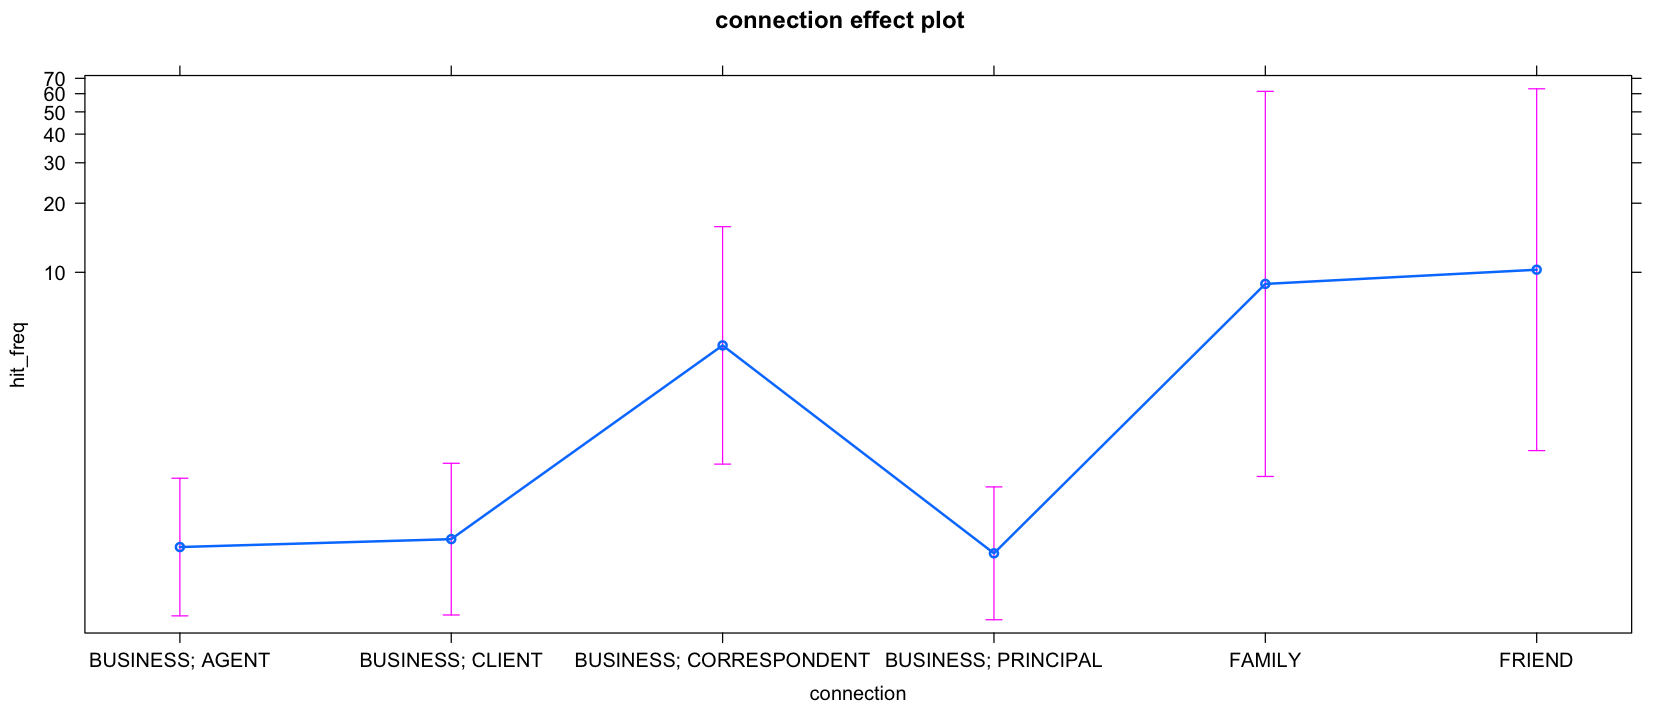

In [41]:
m_glmer7b <- glmer(hit_freq ~ connection + (1|gender_pair) + (1|sender),
                  data=m_conn_gender,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7b)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7b)

"------------------------------drop1------------------------------"
drop1(m_glmer7b, test = "Chisq")

effect("connection", m_glmer7b)

plot(effect("connection", m_glmer7b))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The alternative on making the mixed effects model work shows that zero variance and standard deviation for gender_pair, making it unreliable.

### 7.3 Generalised linear model using "connection" and "gender_sender" as fixed effects, and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + gender_sender + (1 | sender)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   763.6    796.4   -372.8    745.6      275 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5689 -0.4840  0.2386  3.8809 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.6984   0.8357  
Number of obs: 284, groups:  sender, 30

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.80715    0.81113  -0.995  0.31969   
connectionBUSINESS; CLIENT        -0.02695    0.50079  -0.054  0.95708   
connectionBUSINESS; CORRESPONDENT  1.97718    0.68515   2.886  0.00390 **
connectionBUSINESS; PRINCIPAL     -0.01740    0.46446  -0.037  0.97012   
connectionFAMILY                   2.65871    

[1] "------------------------------dispersion------------------------------"

[1] 1.026355

[1] "------------------------------drop1------------------------------"

Df AIC      LRT       Pr(Chi)     
<none>        NA 763.5867        NA           NA
connection     5 777.4921 23.905374 0.0002263941
gender_sender  1 761.7736  0.186862 0.6655412572


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6124280               0.5961415               4.4231590 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6018637               8.7441437              10.0842574 


 gender_sender effect
gender_sender
   FEMALE      MALE 
0.5458717 0.7627122 

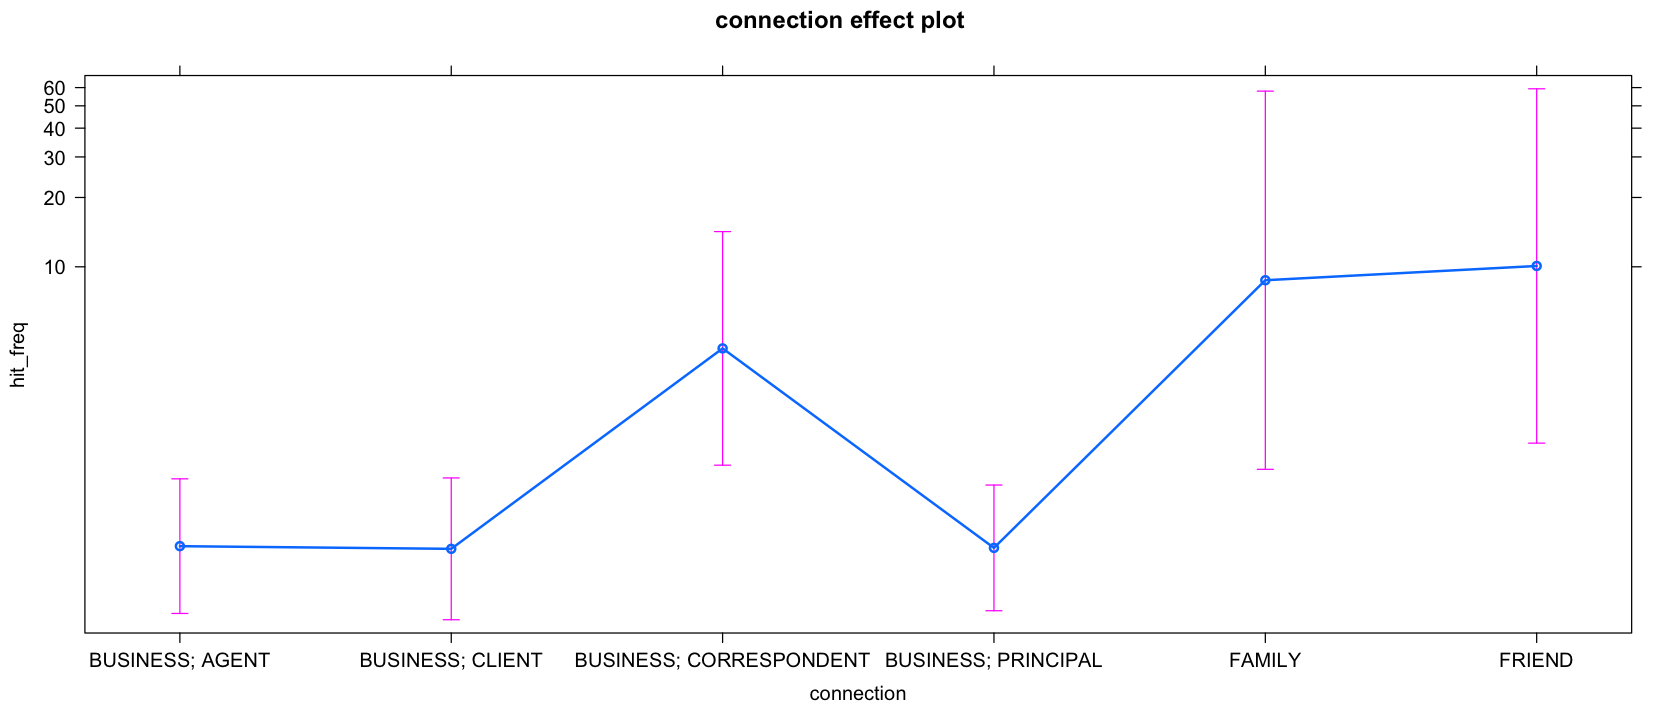

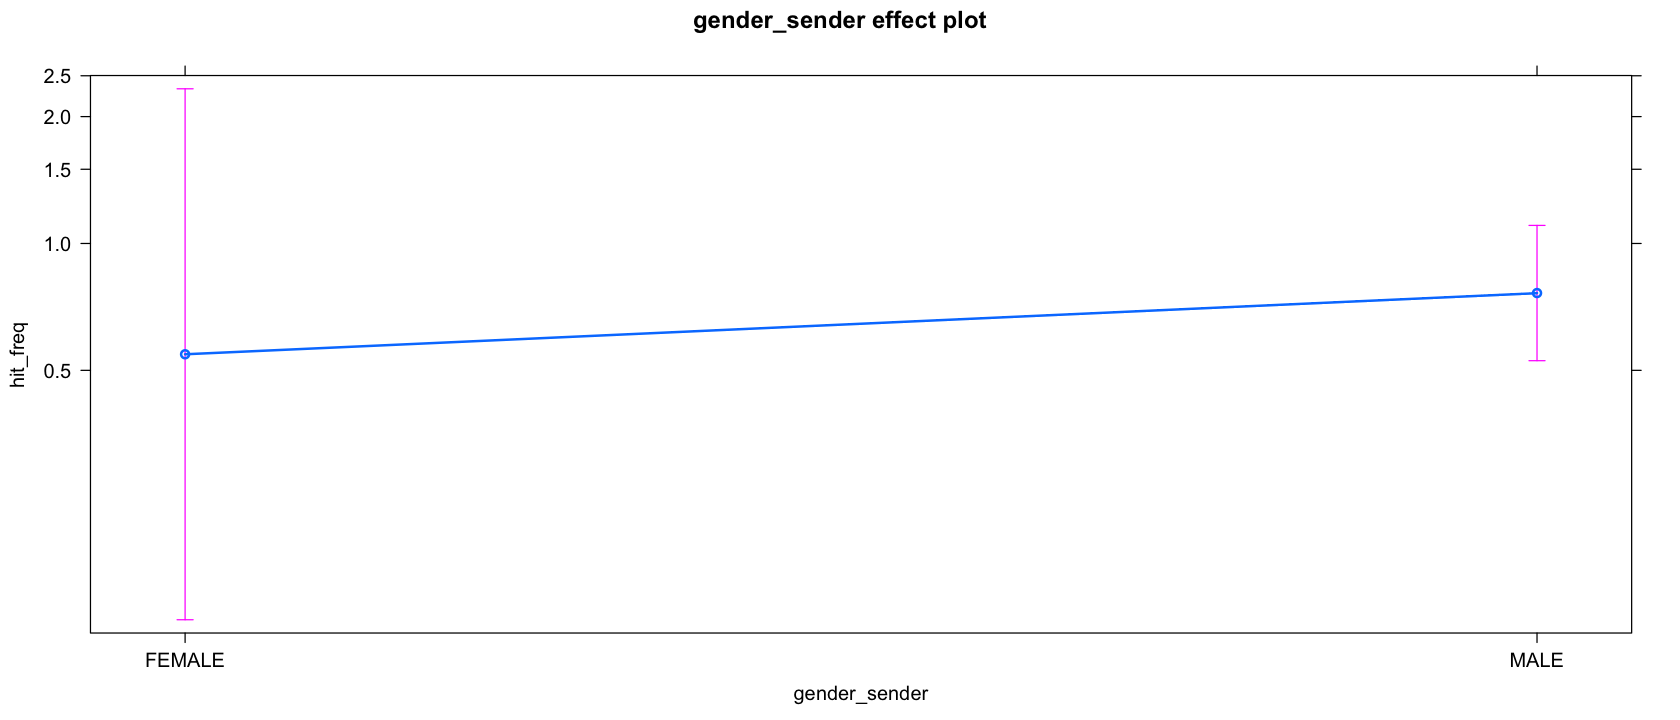

In [13]:
m_glmer7c <- glmer(hit_freq ~ connection + gender_sender + (1|sender),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7c)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7c)

"------------------------------drop1------------------------------"
drop1(m_glmer7c, test = "Chisq")

effect("connection", m_glmer7c)
effect("gender_sender", m_glmer7c)

plot(effect("connection", m_glmer7c))
plot(effect("gender_sender", m_glmer7c))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The gender of the sender is not a significant predictor for the frequency of divine appeals.

### 7.4 Generalised linear model using "connection" and "gender_addressee" as fixed effects, and "sender" as a random effect, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: hit_freq ~ connection + gender_addressee + (1 | sender)
   Data: m_conn_gender

     AIC      BIC   logLik deviance df.resid 
   661.9    692.8   -321.9    643.9      222 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.6164 -0.4749  0.2663  3.6507 

Random effects:
 Groups Name        Variance Std.Dev.
 sender (Intercept) 0.7529   0.8677  
Number of obs: 231, groups:  sender, 29

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.27500    0.46562  -0.591  0.55478   
connectionBUSINESS; CLIENT         0.11160    0.52734   0.212  0.83240   
connectionBUSINESS; CORRESPONDENT  1.91679    0.72430   2.646  0.00814 **
connectionBUSINESS; PRINCIPAL     -0.07477    0.49070  -0.152  0.87889   
connectionFAMILY                   2.57035 

[1] "------------------------------dispersion------------------------------"

[1] 1.034442

[1] "------------------------------drop1------------------------------"

Df AIC      LRT        Pr(Chi)    
<none>           NA 661.8601         NA          NA
connection        5 670.0132 18.1531417 0.002760474
gender_addressee  1 660.1992  0.3390908 0.560354506


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6349224               0.7098845               4.3169115 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.5891798               8.2986552              10.5423145 


 gender_addressee effect
gender_addressee
   FEMALE      MALE 
0.9839555 0.8007679 

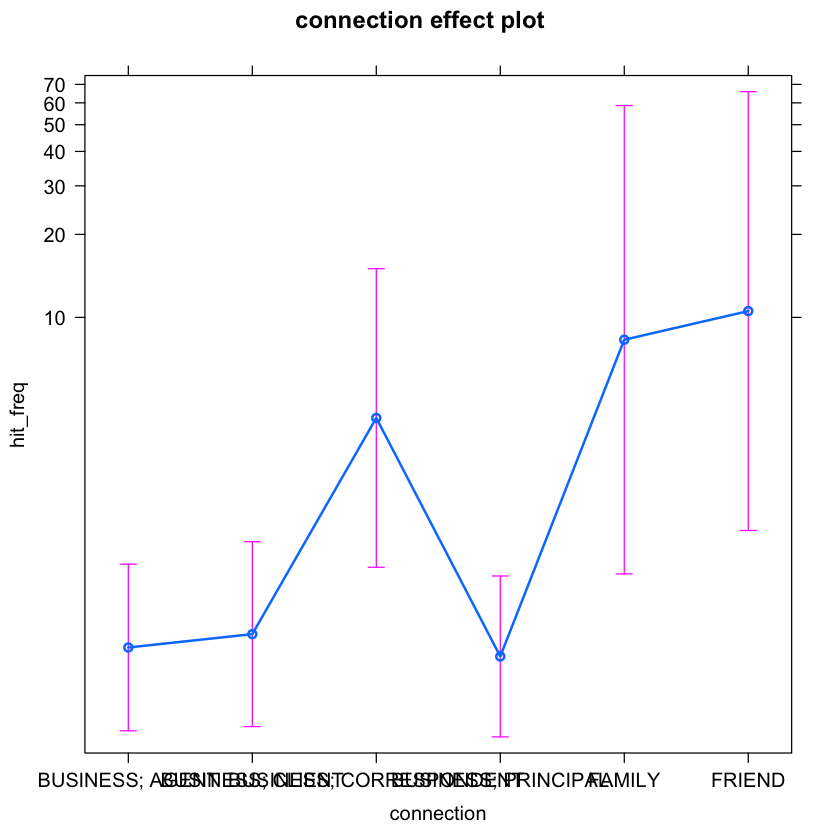

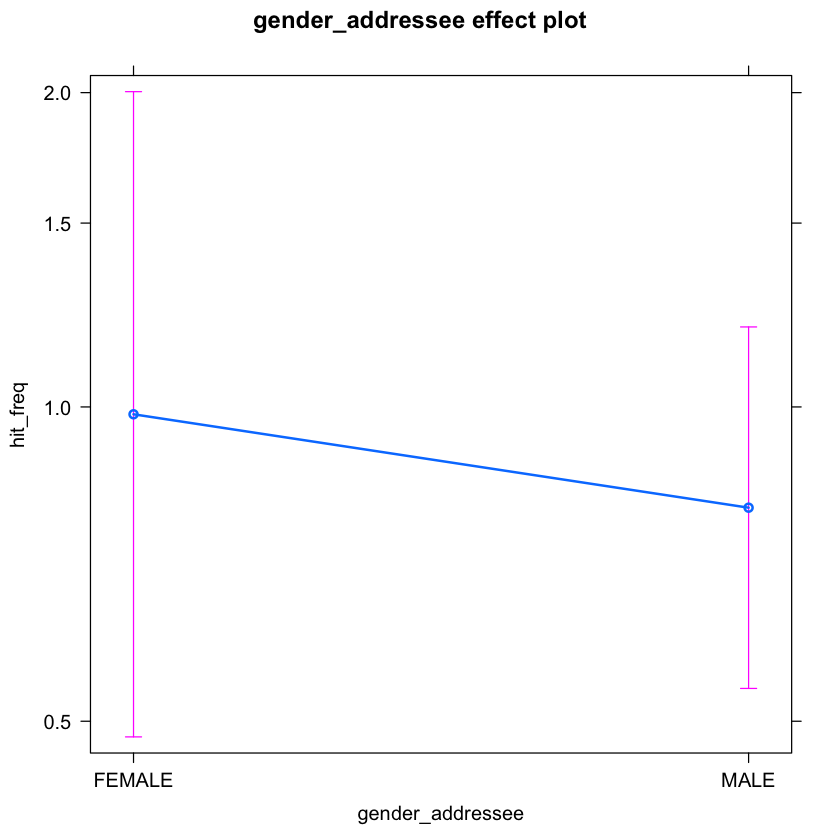

In [12]:
m_glmer7d <- glmer(hit_freq ~ connection + gender_addressee + (1|sender),
                  data=m_conn_gender,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7d)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7d)

"------------------------------drop1------------------------------"
drop1(m_glmer7d, test = "Chisq")

effect("connection", m_glmer7d)
effect("gender_addressee", m_glmer7d)

plot(effect("connection", m_glmer7d))
plot(effect("gender_addressee", m_glmer7d))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

The addressee's gender is not a significant predictor for the frequency of divine appeals.

### 7.5 Generalised linear model using "connection" and "gender_sender" as fixed effects, and "sender" and "quinquennial" as random effects, negative binomial

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: Negative Binomial(1)  ( log )
Formula: 
hit_freq ~ connection + gender_sender + (1 | sender) + (1 | quinquennial)
   Data: marescoe_conn

     AIC      BIC   logLik deviance df.resid 
   765.6    802.1   -372.8    745.6      274 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5689 -0.4840  0.2386  3.8809 

Random effects:
 Groups       Name        Variance Std.Dev.
 sender       (Intercept) 0.6984   0.8357  
 quinquennial (Intercept) 0.0000   0.0000  
Number of obs: 284, groups:  sender, 30; quinquennial, 5

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -0.80714    0.81113  -0.995  0.31970   
connectionBUSINESS; CLIENT        -0.02696    0.50080  -0.054  0.95707   
connectionBUSINESS; CORRESPONDENT  1.97716    0.68515   2.886  0.00391 **
connectionBUSINESS; PRINC

[1] "------------------------------dispersion------------------------------"

[1] 1.026355

[1] "------------------------------drop1------------------------------"

Df AIC      LRT        Pr(Chi)     
<none>        NA 765.5864         NA           NA
connection     5 779.4918 23.9053882 0.0002263927
gender_sender  1 763.7733  0.1868587 0.6655440401


 connection effect
connection
        BUSINESS; AGENT        BUSINESS; CLIENT BUSINESS; CORRESPONDENT 
              0.6124381               0.5961479               4.4231660 
    BUSINESS; PRINCIPAL                  FAMILY                  FRIEND 
              0.6018628               8.7441424              10.0842559 


 gender_sender effect
gender_sender
   FEMALE      MALE 
0.5458738 0.7627174 

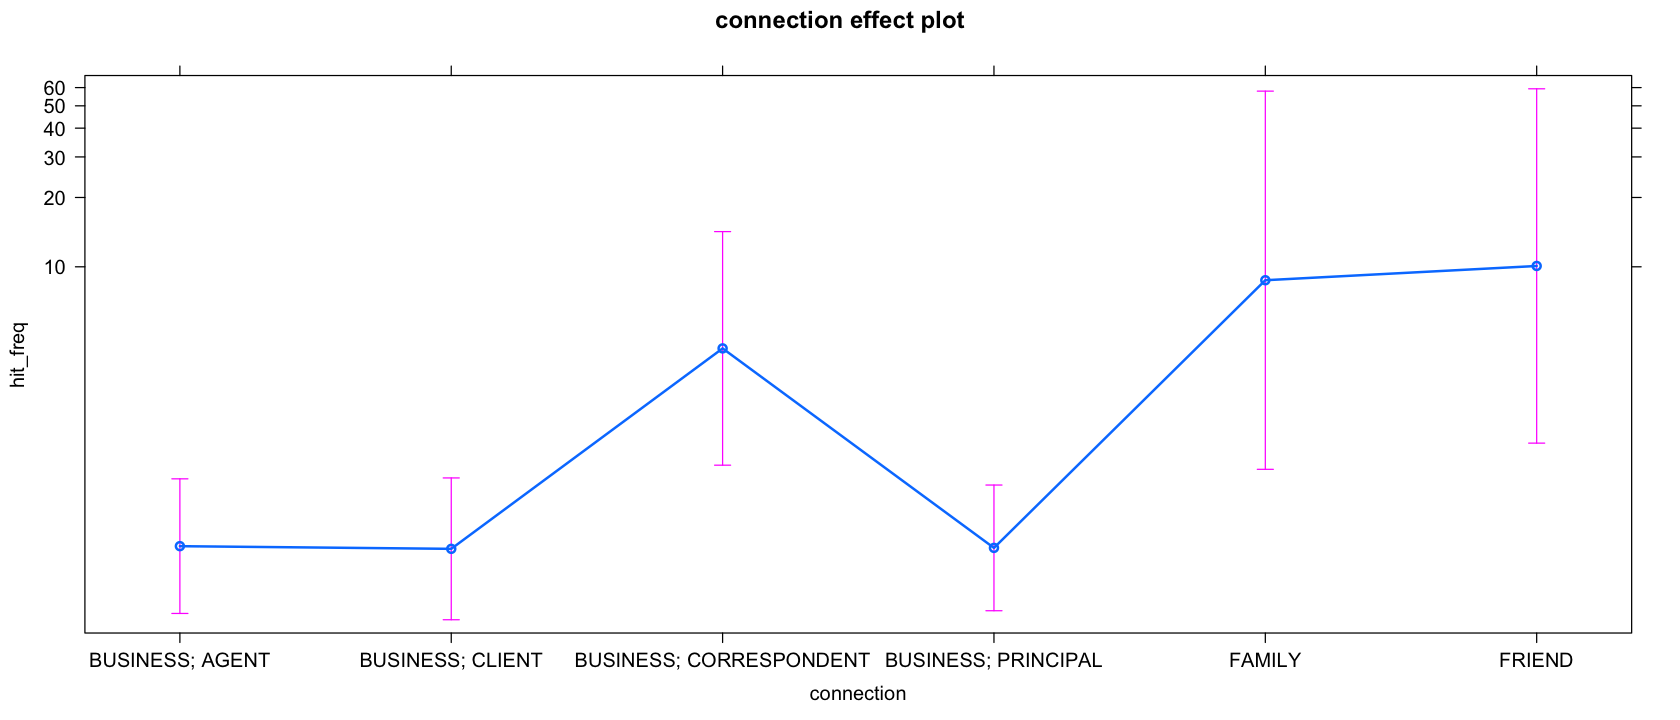

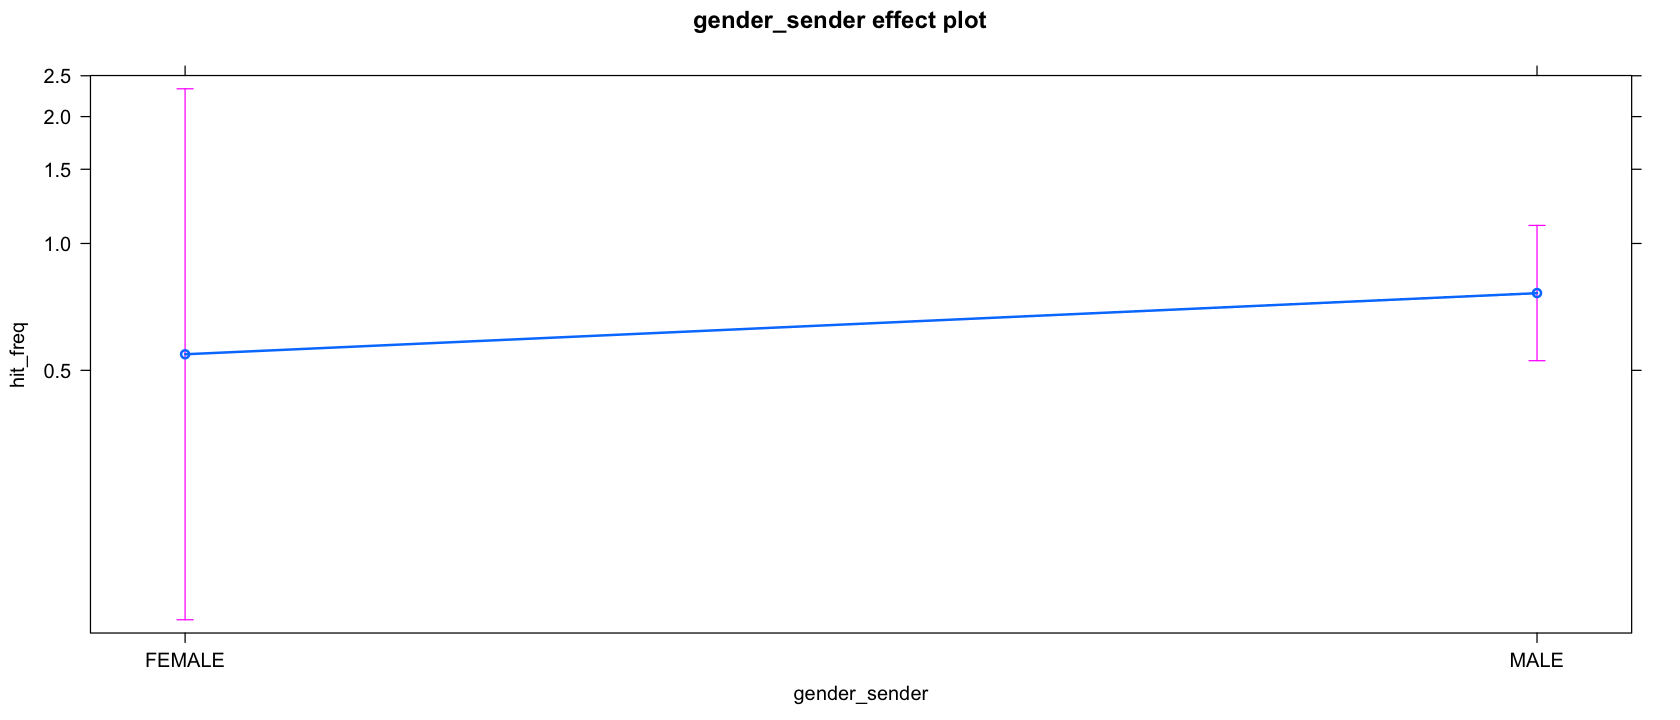

In [44]:
m_glmer7e <- glmer(hit_freq ~ connection + gender_sender + (1|sender) + (1|quinquennial),
                  data=marescoe_conn,
                  family=negative.binomial(theta = 1),
                  nAGQ=0L)
summary(m_glmer7e)

"------------------------------dispersion------------------------------"
dispersion_glmer(m_glmer7e)

"------------------------------drop1------------------------------"
drop1(m_glmer7e, test = "Chisq")

effect("connection", m_glmer7e)
effect("gender_sender", m_glmer7e)

plot(effect("connection", m_glmer7e))
plot(effect("gender_sender", m_glmer7e))

par(cex.axis = 0.8)

options(repr.plot.width = 14, repr.plot.height = 6)

Adding "quinquennial" as a random effect makes the model unreliable (zero variance and standard deviation).

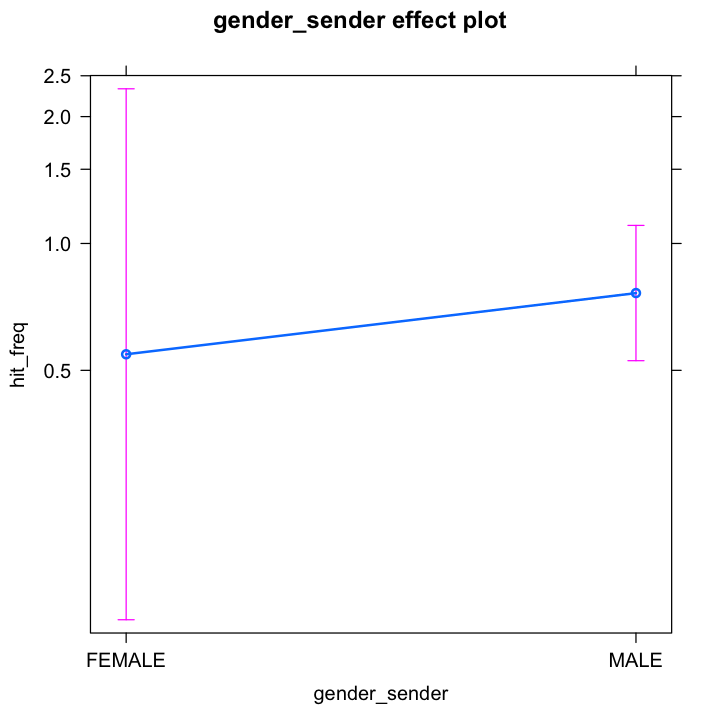

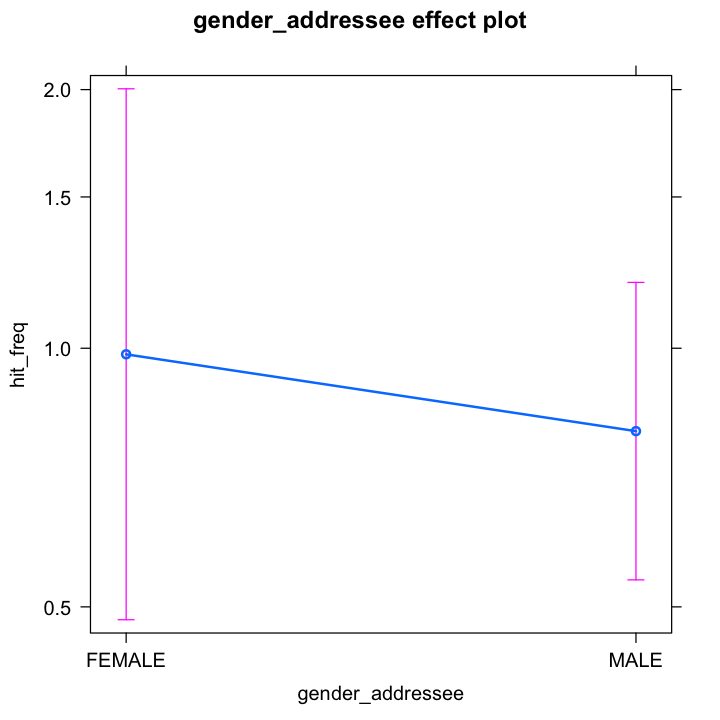

In [27]:
plot(effect("gender_sender", m_glmer7c))
plot(effect("gender_addressee", m_glmer7d))

par(cex.axis = 0.8)

options(repr.plot.width = 6, repr.plot.height = 6)


Call:
lm(formula = hit_freq ~ connection + age_gap, data = marescoe_conn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2114 -0.6537 -0.5409  0.6986 10.7803 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)                        1.02159    0.67865   1.505  0.13613   
connectionBUSINESS; CORRESPONDENT  3.20253    0.97854   3.273  0.00157 **
connectionBUSINESS; PRINCIPAL     -0.26501    0.55322  -0.479  0.63320   
age_gap                           -0.01268    0.01836  -0.691  0.49153   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.898 on 81 degrees of freedom
  (199 observations deleted due to missingness)
Multiple R-squared:  0.2313,	Adjusted R-squared:  0.2028 
F-statistic: 8.123 on 3 and 81 DF,  p-value: 8.563e-05



 connection effect
connection
       BUSINESS; CLIENT BUSINESS; CORRESPONDENT     BUSINESS; PRINCIPAL 
              0.7890943               3.9916195               0.5240831 


 age_gap effect
age_gap
        1        10        20        30        40 
1.0793385 0.9651810 0.8383394 0.7114978 0.5846562 

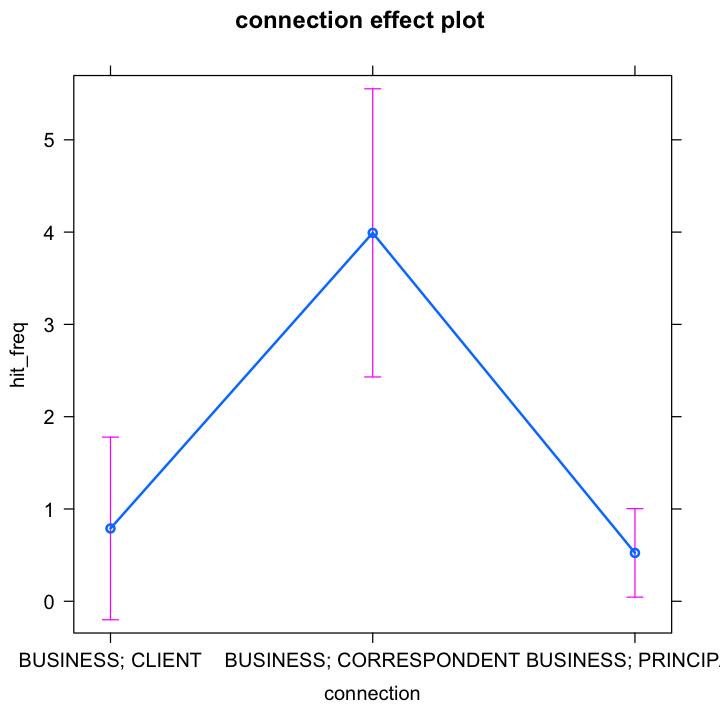

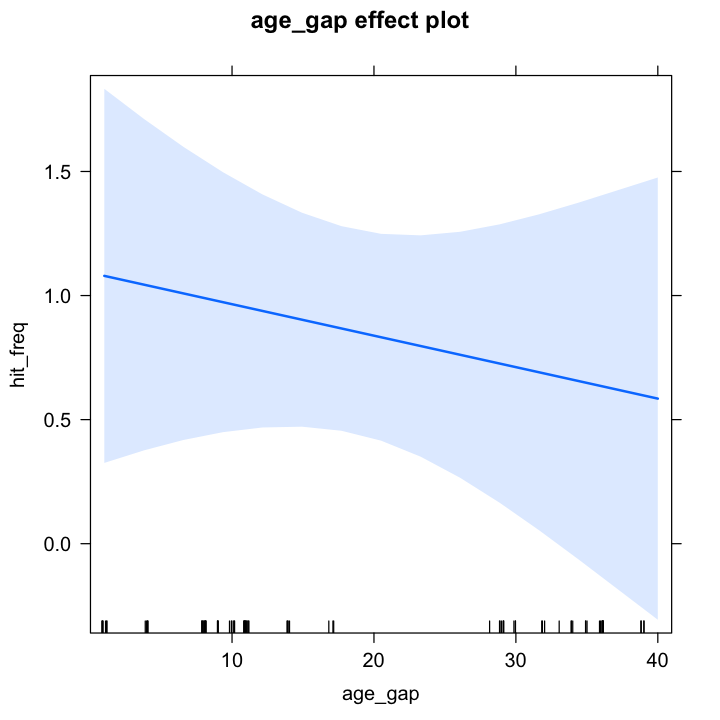

In [25]:
m_lm <- lm(hit_freq ~ connection + age_gap,
            data=marescoe_conn)
summary(m_lm)

effect("connection", m_lm)
effect("age_gap", m_lm)
plot(effect("connection", m_lm))
plot(effect("age_gap", m_lm))
 
par(cex.axis = 0.8)

# Increase the resolution of the plot (in inches)
options(repr.plot.width = 10, repr.plot.height = 6)